**Youtube Trending Section Analysis - Canada**

In [95]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import warnings
from collections import Counter
import datetime
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import json
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')

In [2]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [3]:
df = pd.read_csv("/home/sleepynav/Documents/Social Web/Youtube-Trending/Data/CAvideos.csv", index_col='video_id')

with open("/home/sleepynav/Documents/Social Web/Youtube-Trending/Data/CA_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
counts_titles = {}

for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

In [4]:
df.head(5)

trending_date                                              title  \
video_id                                                                       
n1WpP7iowLc      17.14.11         Eminem - Walk On Water (Audio) ft. Beyoncé   
0dBIkQ4Mz1M      17.14.11                      PLUSH - Bad Unboxing Fan Mail   
5qpjK5DgCt4      17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
d380meD0W0M      17.14.11                           I Dare You: GOING BALD!?   
2Vv-BfVoq4g      17.14.11        Ed Sheeran - Perfect (Official Music Video)   

            channel_title  category_id              publish_time  \
video_id                                                           
n1WpP7iowLc    EminemVEVO           10  2017-11-10T17:00:03.000Z   
0dBIkQ4Mz1M     iDubbbzTV           23  2017-11-13T17:00:00.000Z   
5qpjK5DgCt4  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
d380meD0W0M      nigahiga           24  2017-11-12T18:01:41.000Z   
2Vv-BfVoq4g    Ed Sheeran           10  2017-11-09T11:04:14.000Z   

                                                          tags     views  \
video_id                                                                   
n1WpP7iowLc  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   
0dBIkQ4Mz1M  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   
5qpjK5DgCt4  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   
d380meD0W0M  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   
2Vv-BfVoq4g  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622   

               likes  dislikes  comment_count  \
video_id                                        
n1WpP7iowLc   787425     43420         125882   
0dBIkQ4Mz1M   127794      1688          13030   
5qpjK5DgCt4   146035      5339           8181   
d380meD0W0M   132239      1989          17518   
2Vv-BfVoq4g  1634130     21082          85067   

                                             thumbnail_link  \
video_id                                                      
n1WpP7iowLc  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
0dBIkQ4Mz1M  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
5qpjK5DgCt4  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
d380meD0W0M  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
2Vv-BfVoq4g  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
n1WpP7iowLc              False             False                   False   
0dBIkQ4Mz1M              False             False                   False   
5qpjK5DgCt4              False             False                   False   
d380meD0W0M              False             False                   False   
2Vv-BfVoq4g              False             False                   False   

                                                   description  category_name  
video_id                                                                       
n1WpP7iowLc  Eminem's new track Walk on Water ft. Beyoncé i...          Music  
0dBIkQ4Mz1M  STill got a lot of packages. Probably will las...         Comedy  
5qpjK5DgCt4  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...         Comedy  
d380meD0W0M  I know it's been a while since we did this sho...  Entertainment  
2Vv-BfVoq4g  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...          Music

In [5]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [6]:
df[['category_id', 'category_name']].head()

category_id  category_name
video_id                               
n1WpP7iowLc           10          Music
0dBIkQ4Mz1M           23         Comedy
5qpjK5DgCt4           23         Comedy
d380meD0W0M           24  Entertainment
2Vv-BfVoq4g           10          Music

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40881 entries, n1WpP7iowLc to POTgw38-m58
Data columns (total 16 columns):
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
category_name             40807 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.5+ MB


In [8]:
category_count = df['category_name'].value_counts()
category_count

Entertainment           13451
News & Politics          4159
People & Blogs           4105
Comedy                   3773
Music                    3731
Sports                   2787
Film & Animation         2060
Howto & Style            2007
Gaming                   1344
Science & Technology     1155
Education                 991
Travel & Events           392
Pets & Animals            369
Autos & Vehicles          353
Shows                     124
Movies                      6
Name: category_name, dtype: int64

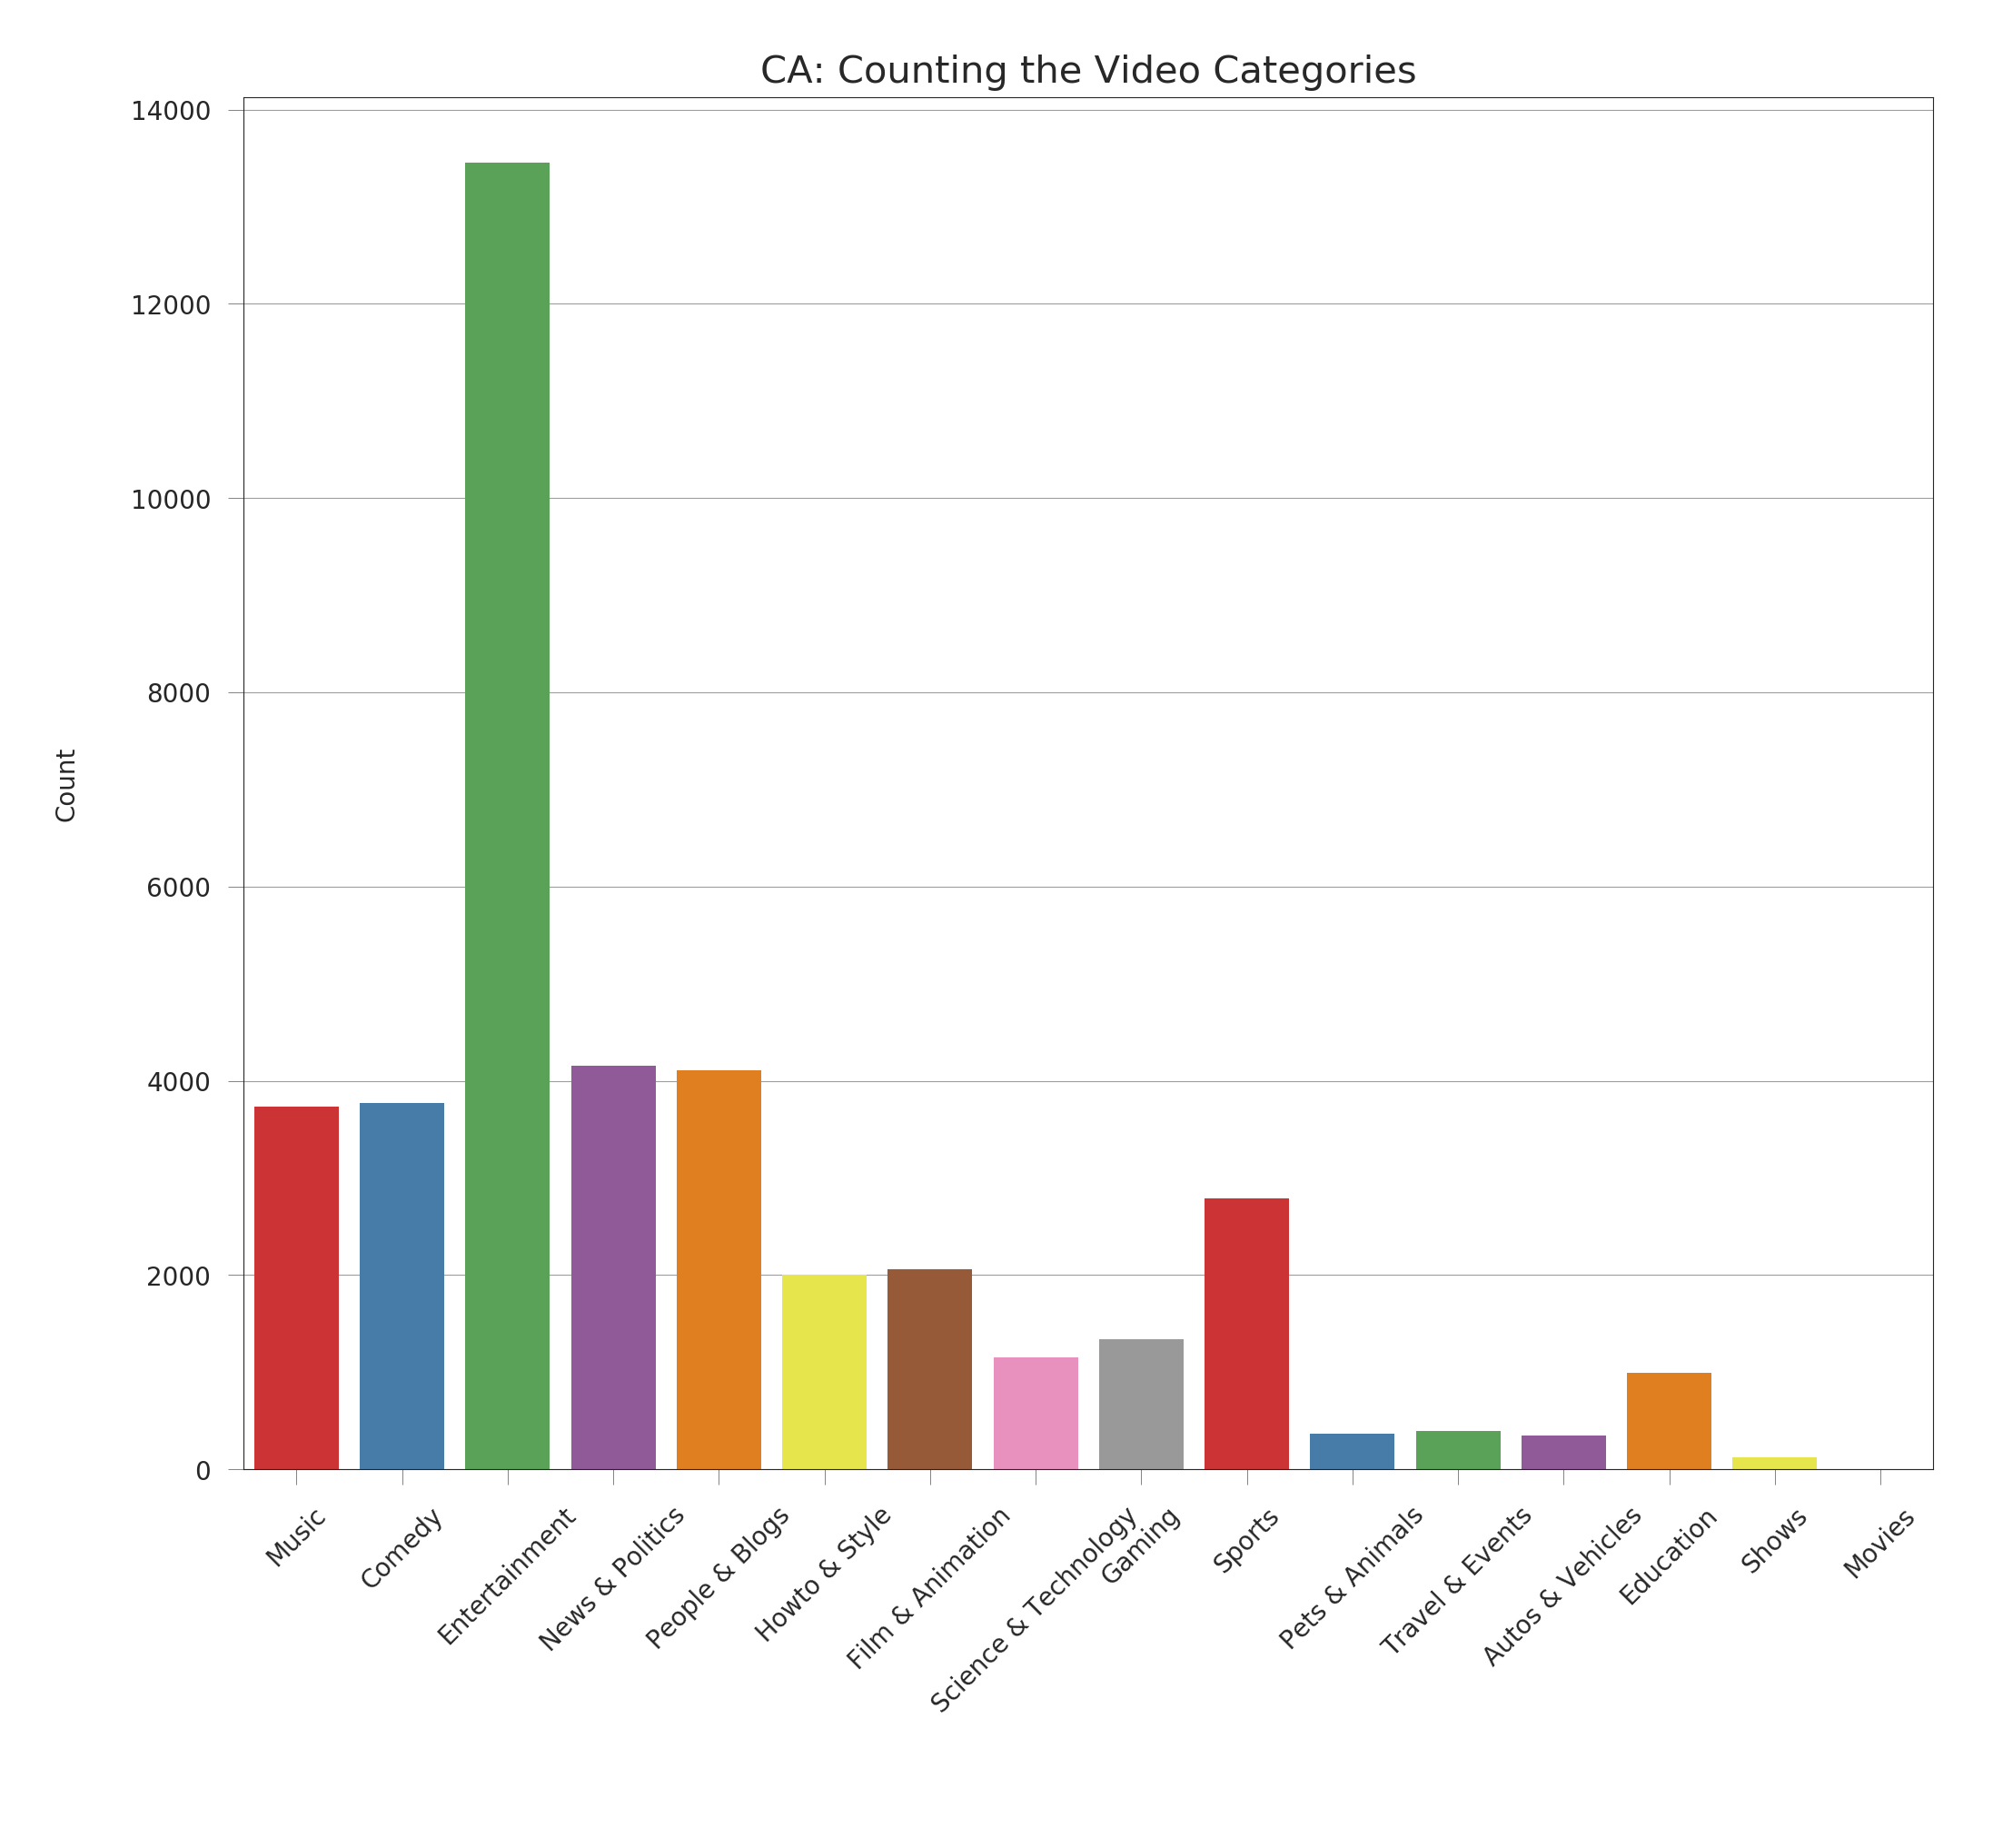

In [9]:
plt.figure(figsize = (12,10))
g = sns.countplot('category_name', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("CA: Counting the Video Categories", fontsize=15)
g.set_xlabel(" ", fontsize=10)
g.set_ylabel("Count", fontsize=10);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40881 entries, n1WpP7iowLc to POTgw38-m58
Data columns (total 16 columns):
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
category_name             40807 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 5.7+ MB


In [11]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])

In [12]:
df["publishing_day"].value_counts()

Fri    7012
Thu    5956
Mon    5876
Tue    5865
Wed    5517
Sun    5406
Sat    5249
Name: publishing_day, dtype: int64

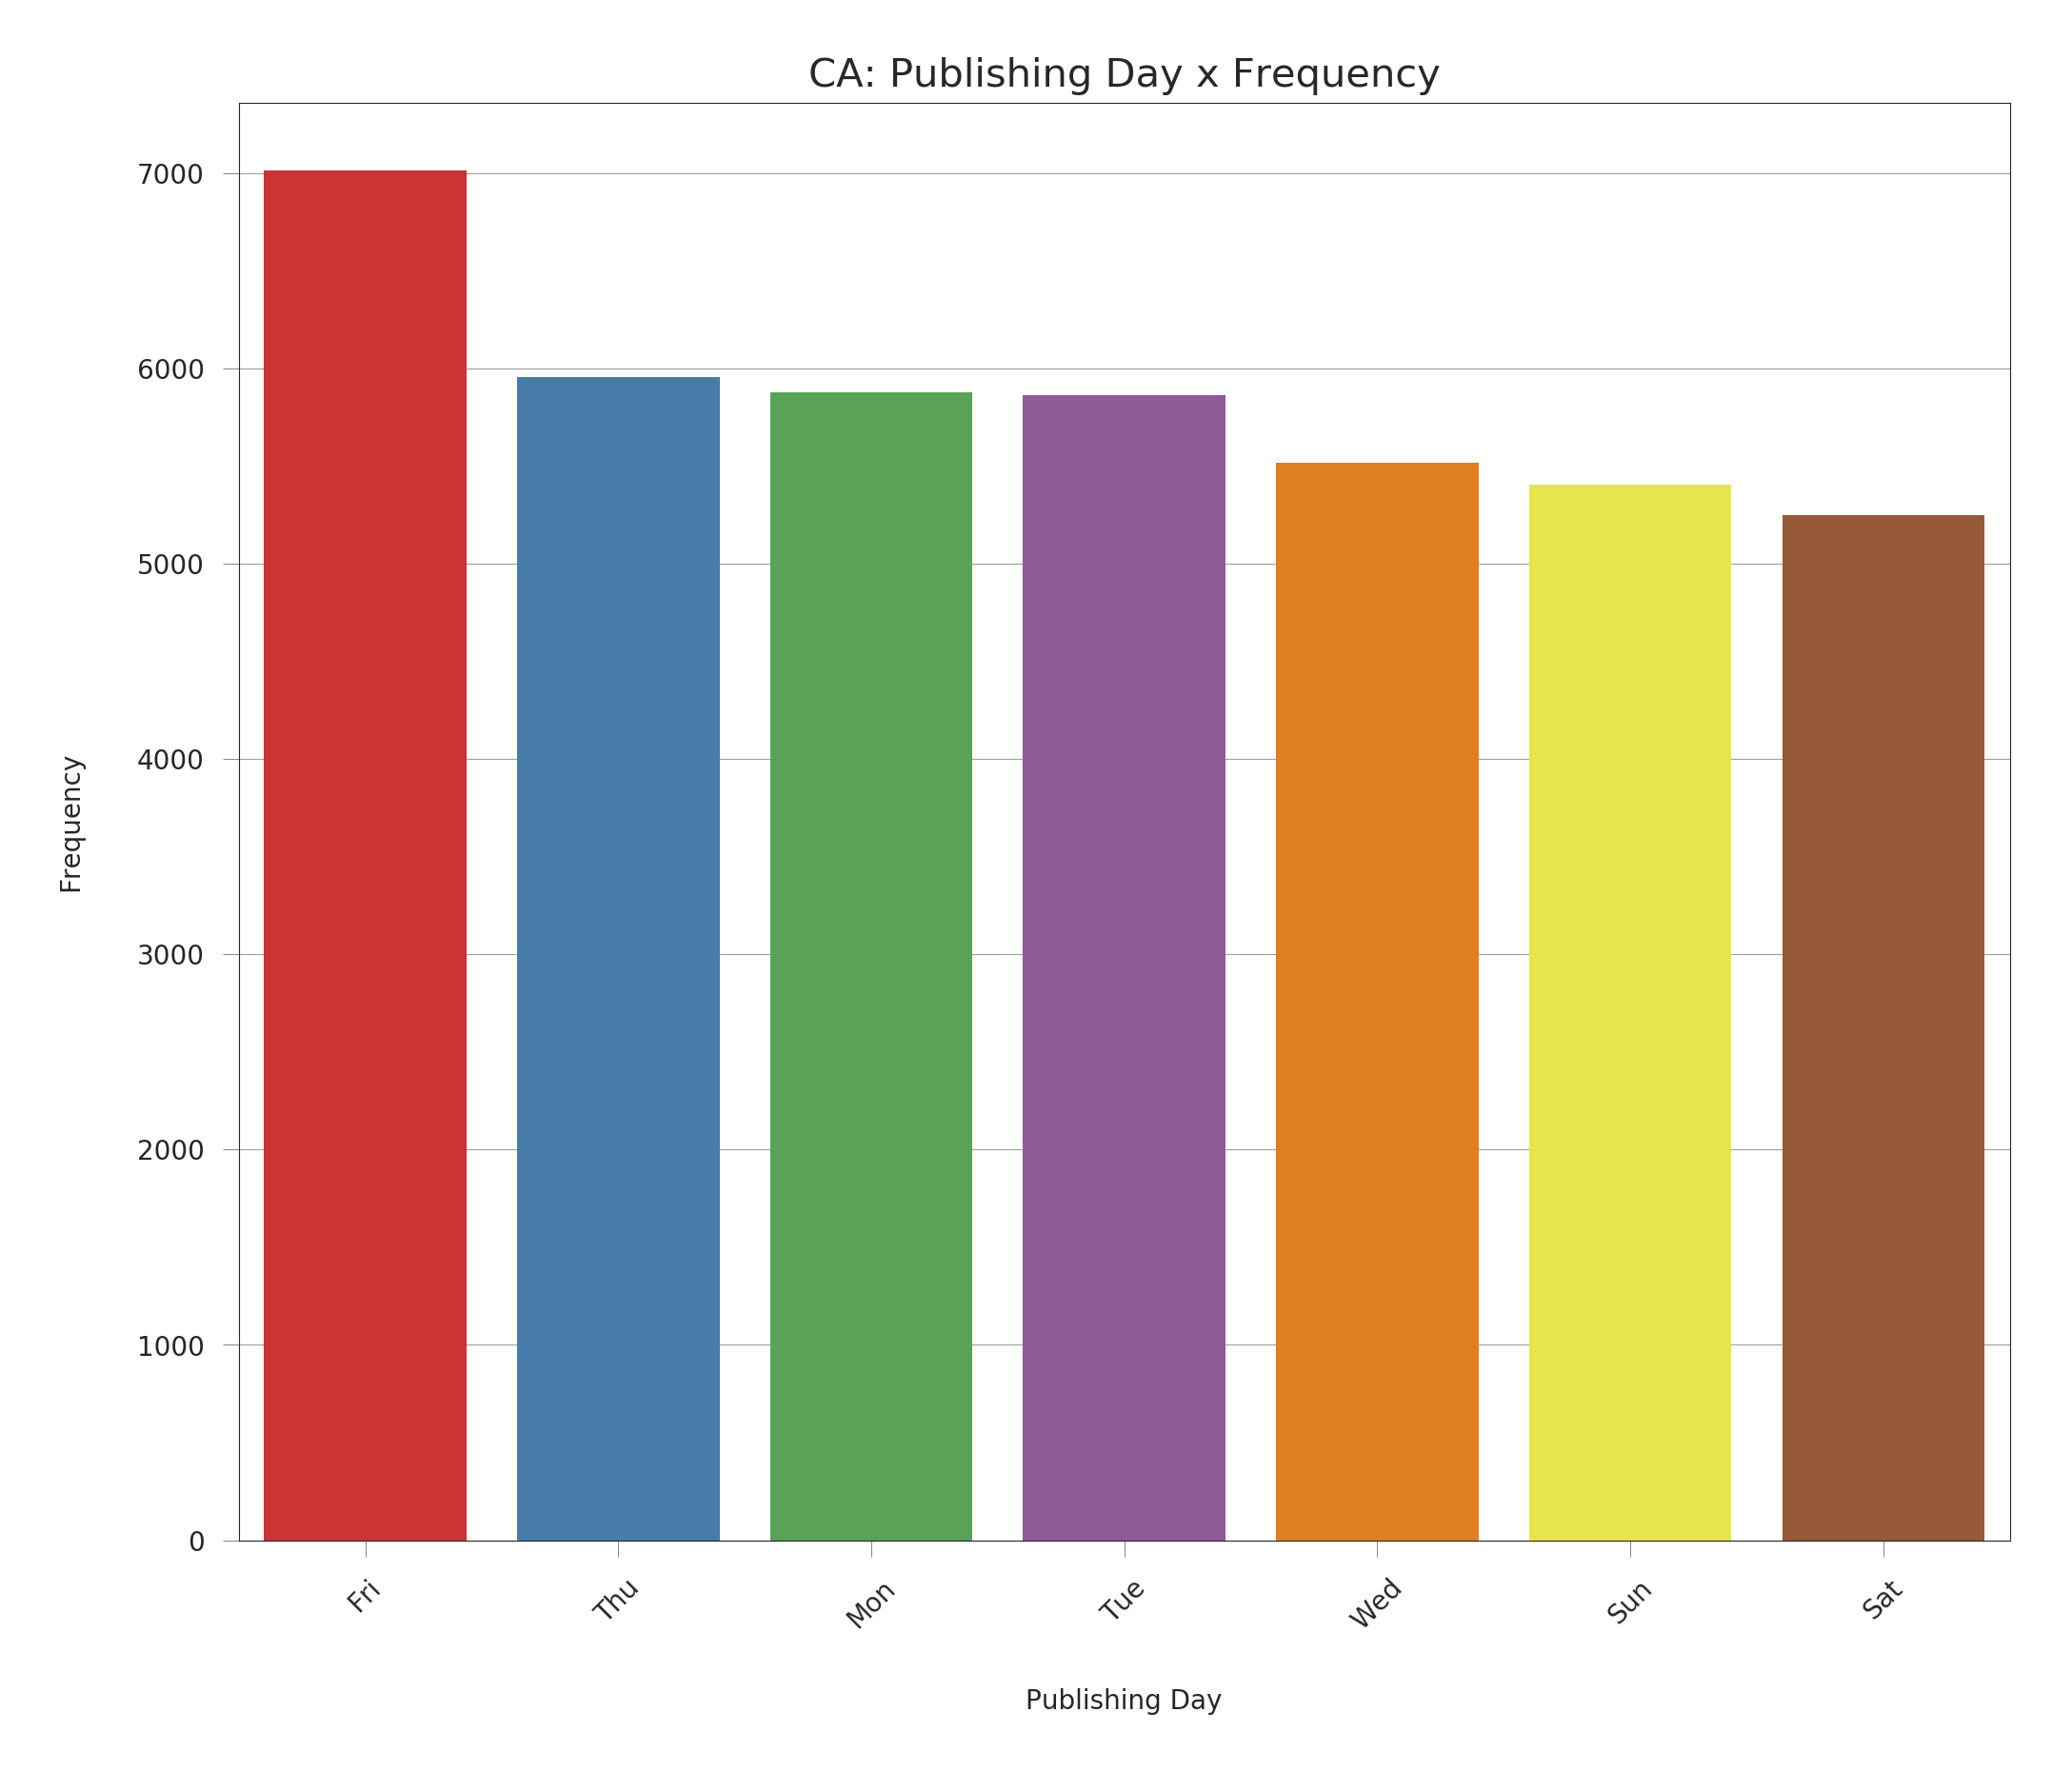

In [13]:
publishD_df= df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})

plt.figure(figsize = (12,10))
g = sns.barplot(x="publishing_day", y="No_of_videos", data=publishD_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("CA: Publishing Day x Frequency", fontsize=15)
g.set_xlabel("Publishing Day", fontsize=10)
g.set_ylabel("Frequency", fontsize=10);

In [14]:
df["publishing_hour"].value_counts()

16    3989
17    3208
15    2679
19    2596
20    2596
18    2347
21    2330
22    2284
14    2195
13    1730
23    1698
01    1441
12    1362
04    1325
03    1324
02    1314
00    1266
05    1062
11    1023
08     690
10     660
07     631
06     619
09     512
Name: publishing_hour, dtype: int64

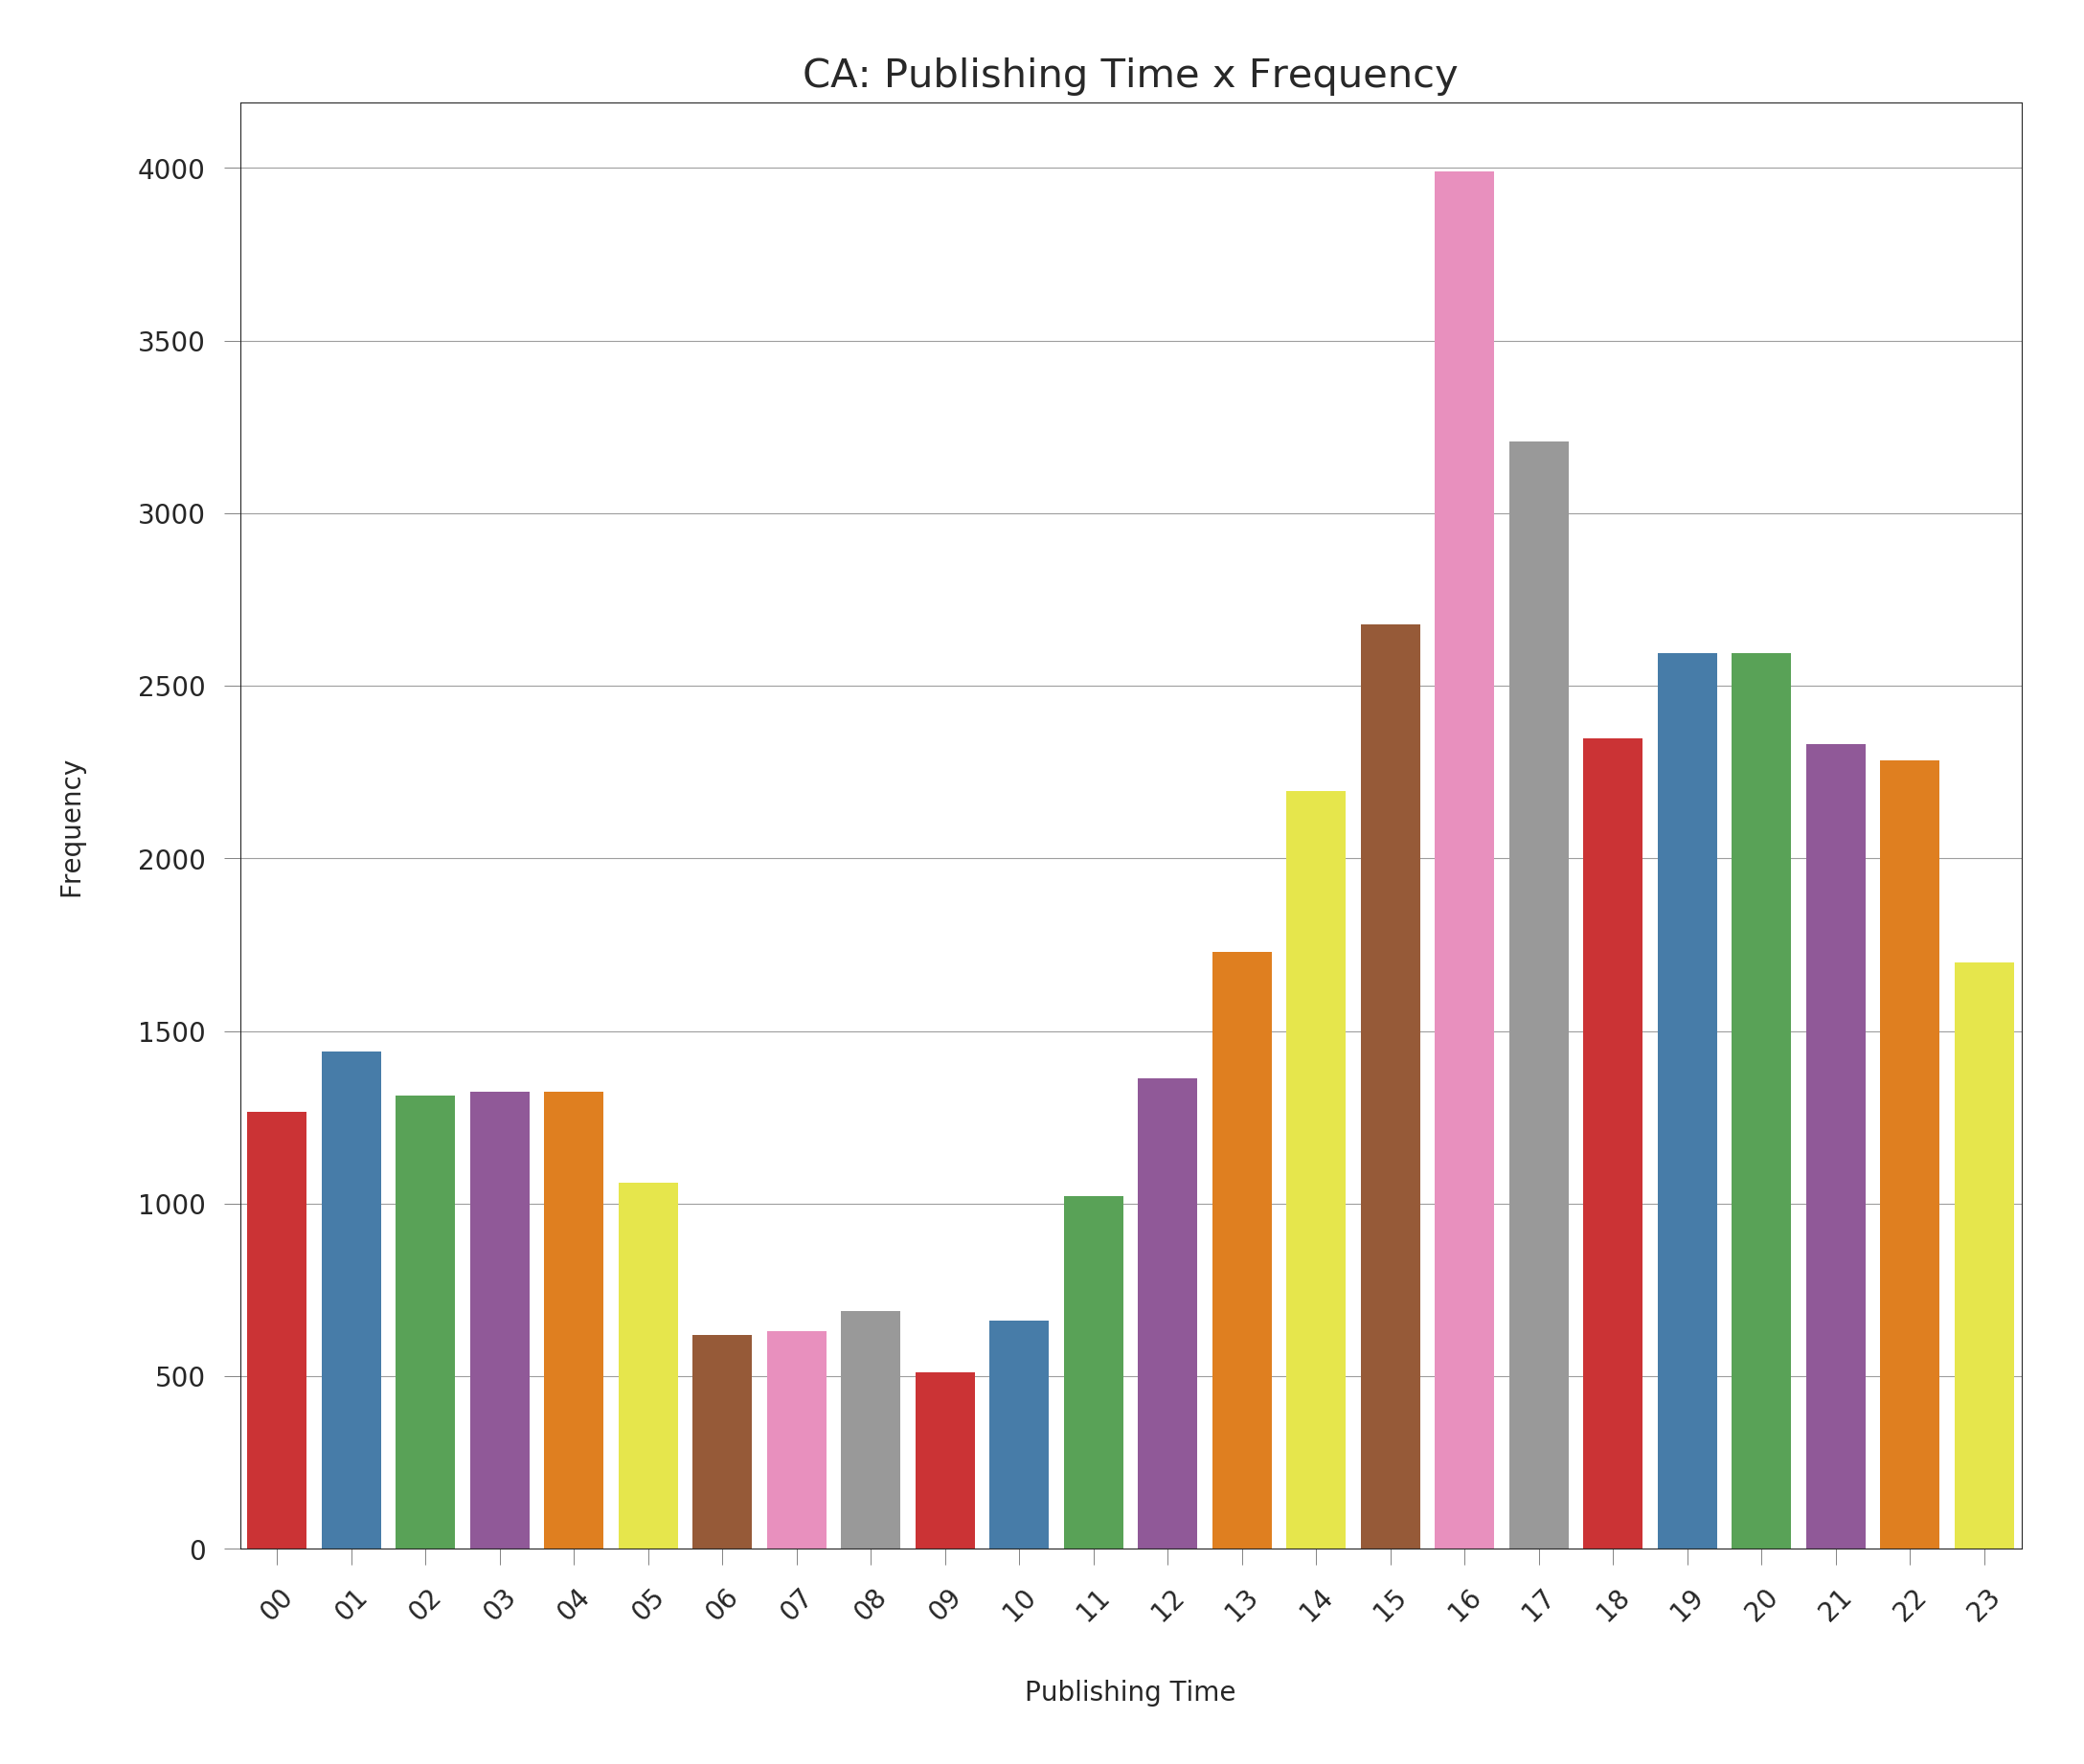

In [15]:
publishT_df= df["publishing_hour"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})

plt.figure(figsize = (12,10))
g = sns.barplot(x="publishing_hour", y="No_of_videos", data=publishT_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("CA: Publishing Time x Frequency", fontsize=15)
g.set_xlabel("Publishing Time", fontsize=10)
g.set_ylabel("Frequency", fontsize=10);

In [16]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts()

2018    31289
2017     9592
Name: trending_date, dtype: int64

In [17]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.77
2017   0.23
Name: trending_date, dtype: float64

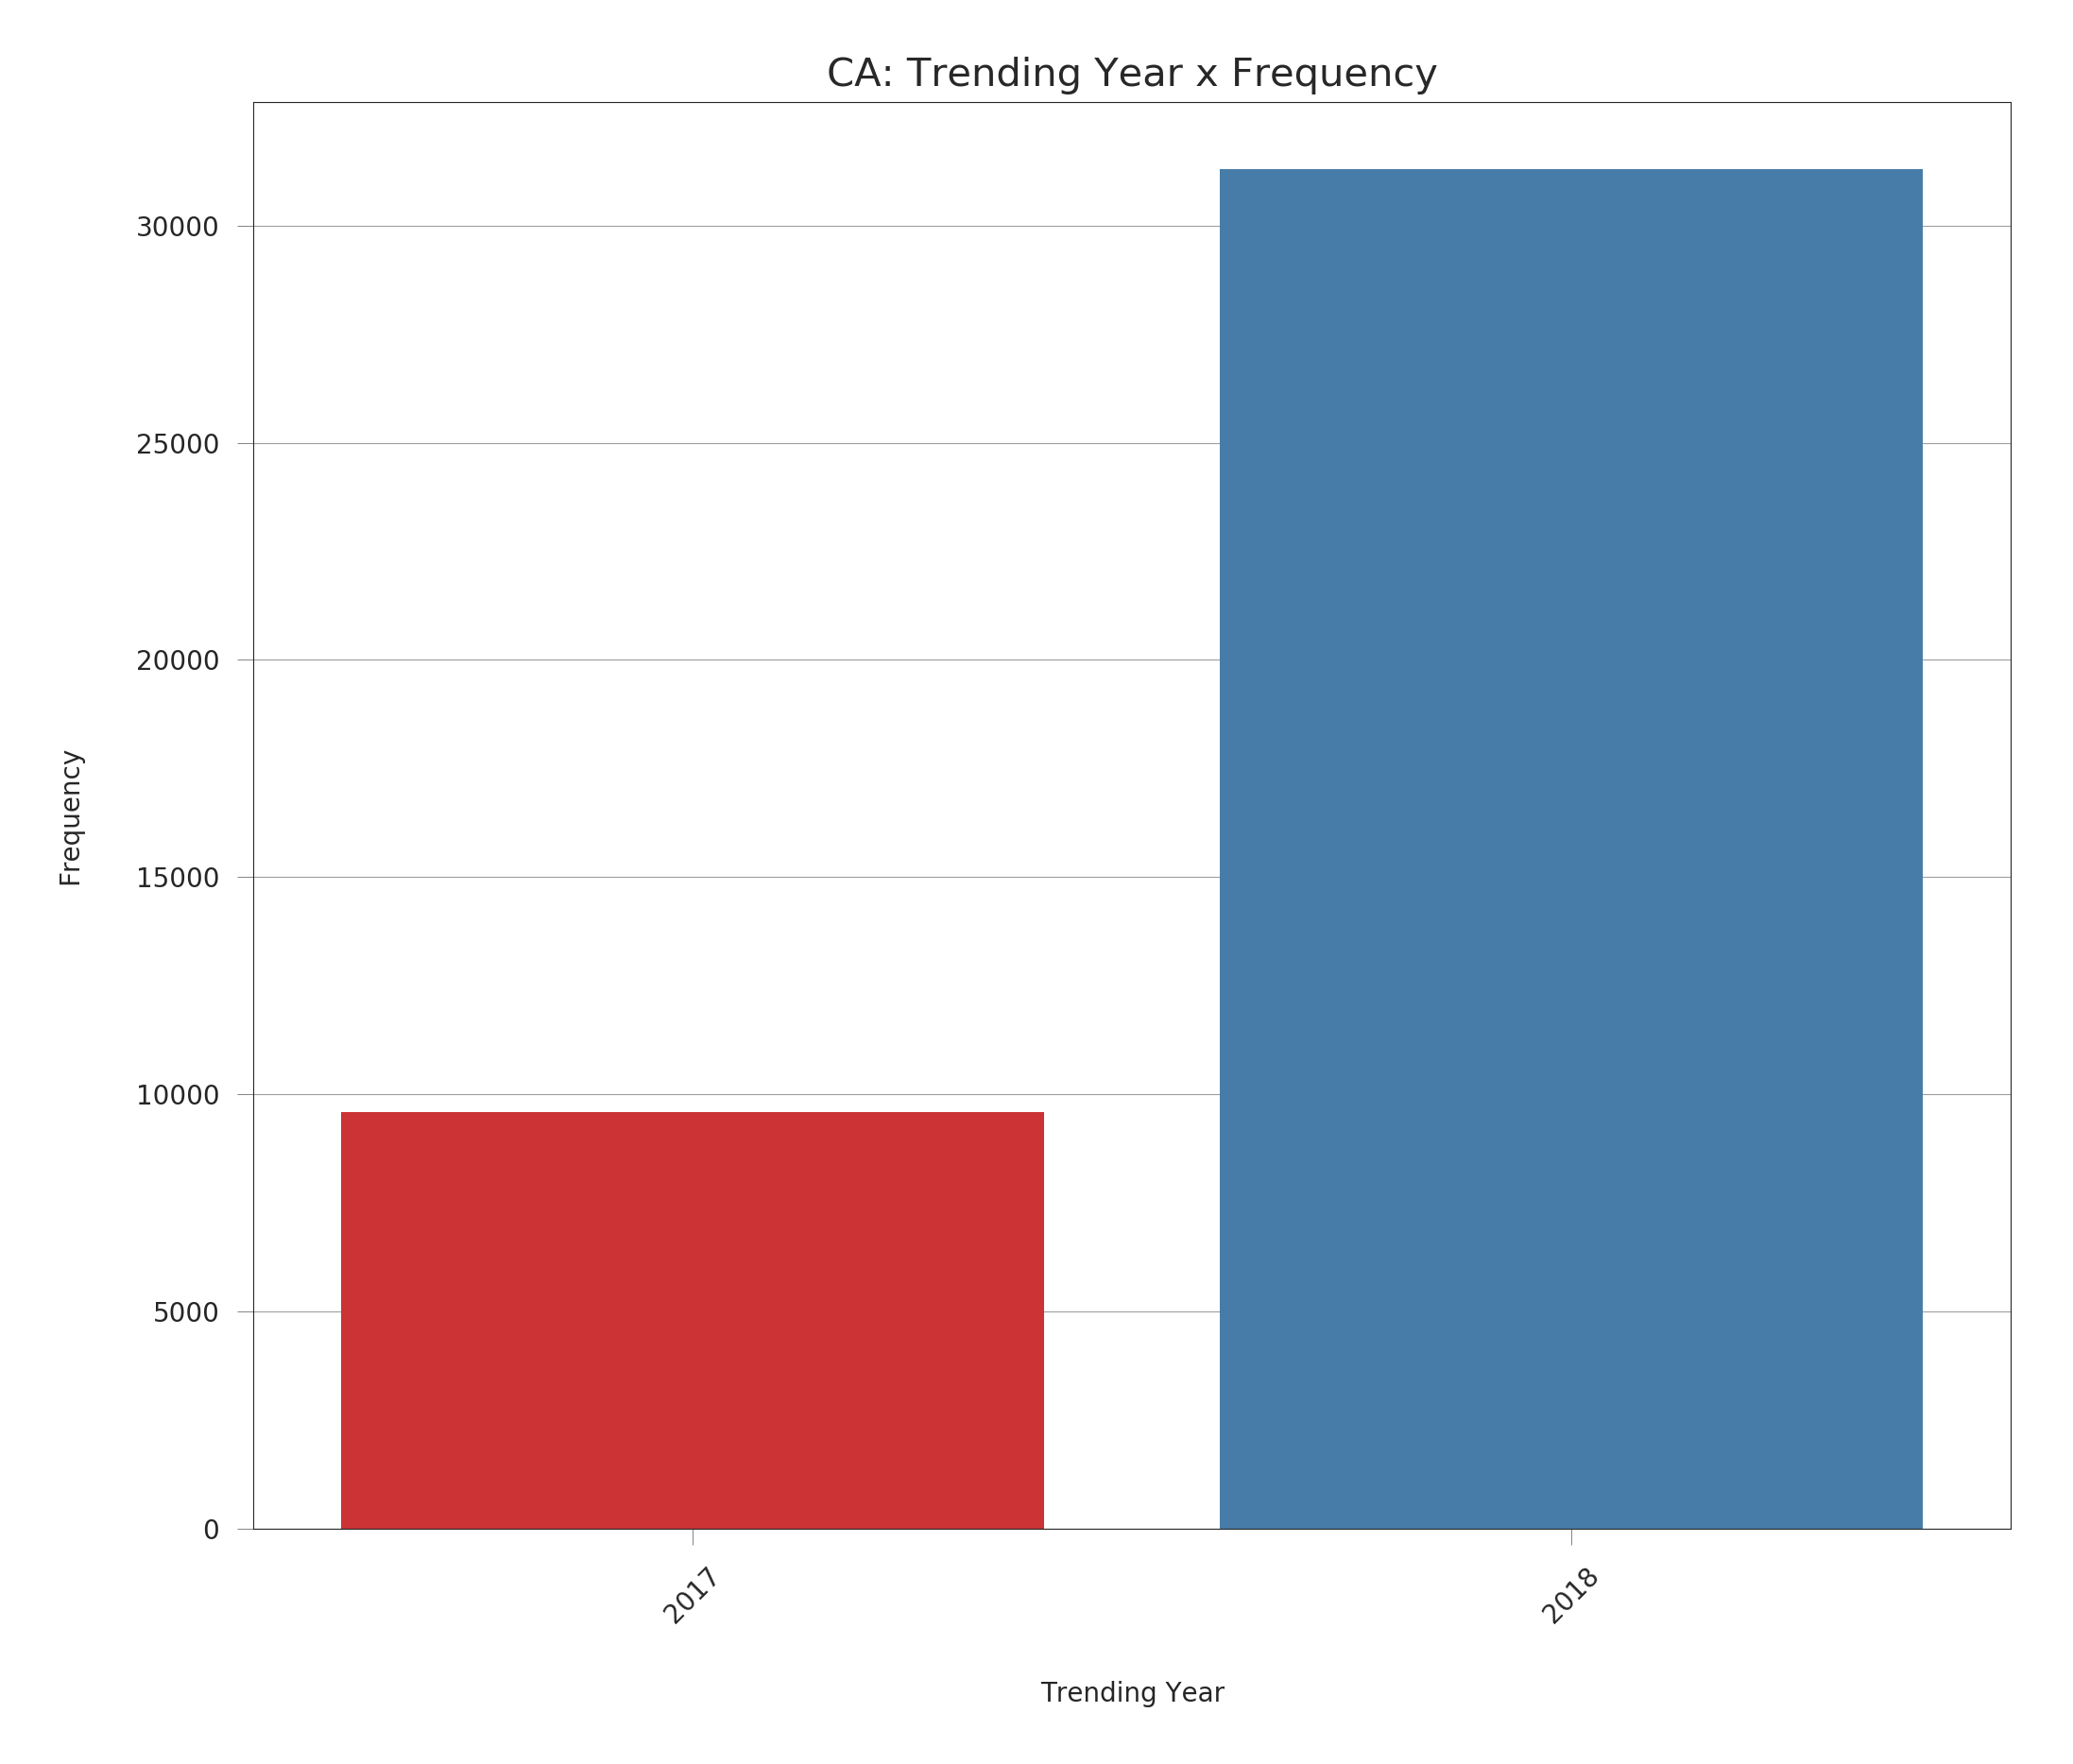

In [18]:
trendingY_df = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

plt.figure(figsize = (12,10))
g = sns.barplot(x="year", y="No_of_videos", data=trendingY_df , palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("CA: Trending Year x Frequency", fontsize=15)
g.set_xlabel("Trending Year", fontsize=10)
g.set_ylabel("Frequency", fontsize=10);

In [19]:
df.describe()

category_id        views      likes   dislikes  comment_count
count     40881.00     40881.00   40881.00   40881.00       40881.00
mean         20.80   1147035.91   39582.69    2009.20        5042.97
std           6.78   3390913.02  132689.53   19008.37       21579.02
min           1.00       733.00       0.00       0.00           0.00
25%          20.00    143902.00    2191.00      99.00         417.00
50%          24.00    371204.00    8780.00     303.00        1301.00
75%          24.00    963302.00   28717.00     950.00        3713.00
max          43.00 137843120.00 5053338.00 1602383.00     1114800.00

In [20]:
df.info()

type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    df[column] = df[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    df[column] = df[column].astype(str)

<class 'pandas.core.frame.DataFrame'>
Index: 40881 entries, n1WpP7iowLc to POTgw38-m58
Data columns (total 18 columns):
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
category_name             40807 non-null object
publishing_day            40881 non-null object
publishing_hour           40881 non-null object
dtypes: bool(3), int64(5), 

In [21]:
df[df["description"].apply(lambda x: pd.isnull(x))].head(5)

trending_date                                              title  \
video_id                                                                       
lHcXhBojpeQ      17.14.11                   三屆TVB視帝，拋棄10年青梅竹馬髮妻，為娶小三還不惜與母絕交！   
_QHEPUKBn9g      17.14.11  ‘Too Alabama for Alabama’: SNL brutally mocks ...   
JdHovvb0KD4      17.14.11  Pres. Trump: Putin's Denials Of Interference I...   
OA0vhAKUD0g      17.14.11            Outlander S03E09 i'm melting with you''   
psDauoxUj9A      17.14.11  شاهد انبهار الاعلام المصري  بتأهل المغرب لكأس ...   

            channel_title category_id              publish_time  \
video_id                                                          
lHcXhBojpeQ         明星百曉生          22  2017-11-12T12:49:50.000Z   
_QHEPUKBn9g    MAXI POWER          23  2017-11-12T05:01:18.000Z   
JdHovvb0KD4      The View          25  2017-11-13T16:10:21.000Z   
OA0vhAKUD0g     Ella bell           1  2017-11-12T22:33:48.000Z   
psDauoxUj9A    Info Press          17  2017-11-11T22:04:37.000Z   

                                                          tags   views  likes  \
video_id                                                                        
lHcXhBojpeQ                                             [none]   88061     47   
_QHEPUKBn9g                                             [none]   20163     44   
JdHovvb0KD4  donald trump|"vladimir putin"|"the view"|"hot ...   72253   1217   
OA0vhAKUD0g                                             [none]   32941    149   
psDauoxUj9A                                             [none]  624328   7100   

             dislikes  comment_count  \
video_id                               
lHcXhBojpeQ        58             17   
_QHEPUKBn9g        34              8   
JdHovvb0KD4       146            569   
OA0vhAKUD0g         2              5   
psDauoxUj9A       398            971   

                                             thumbnail_link  \
video_id                                                      
lHcXhBojpeQ  https://i.ytimg.com/vi/lHcXhBojpeQ/default.jpg   
_QHEPUKBn9g  https://i.ytimg.com/vi/_QHEPUKBn9g/default.jpg   
JdHovvb0KD4  https://i.ytimg.com/vi/JdHovvb0KD4/default.jpg   
OA0vhAKUD0g  https://i.ytimg.com/vi/OA0vhAKUD0g/default.jpg   
psDauoxUj9A  https://i.ytimg.com/vi/psDauoxUj9A/default.jpg   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
lHcXhBojpeQ              False             False                   False   
_QHEPUKBn9g              False             False                   False   
JdHovvb0KD4              False             False                   False   
OA0vhAKUD0g              False             False                   False   
psDauoxUj9A              False             False                   False   

            description     category_name publishing_day publishing_hour  
video_id                                                                  
lHcXhBojpeQ         NaN    People & Blogs            Sun              12  
_QHEPUKBn9g         NaN            Comedy            Sun              05  
JdHovvb0KD4         NaN   News & Politics            Mon              16  
OA0vhAKUD0g         NaN  Film & Animation            Sun              22  
psDauoxUj9A         NaN            Sports            Sat              22

In [22]:
df["description"] = df["description"].fillna(value="")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40881 entries, n1WpP7iowLc to POTgw38-m58
Data columns (total 18 columns):
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null object
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               40881 non-null object
category_name             40807 non-null object
publishing_day            40881 non-null object
publishing_hour           40881 non-null object
dtypes: bool(3), int64(4),

In [23]:
df["category_name"] = df["category_name"].fillna(value="")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40881 entries, n1WpP7iowLc to POTgw38-m58
Data columns (total 18 columns):
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null object
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               40881 non-null object
category_name             40881 non-null object
publishing_day            40881 non-null object
publishing_hour           40881 non-null object
dtypes: bool(3), int64(4),

In [24]:
df.describe()

views      likes   dislikes  comment_count
count     40881.00   40881.00   40881.00       40881.00
mean    1147035.91   39582.69    2009.20        5042.97
std     3390913.02  132689.53   19008.37       21579.02
min         733.00       0.00       0.00           0.00
25%      143902.00    2191.00      99.00         417.00
50%      371204.00    8780.00     303.00        1301.00
75%      963302.00   28717.00     950.00        3713.00
max   137843120.00 5053338.00 1602383.00     1114800.00

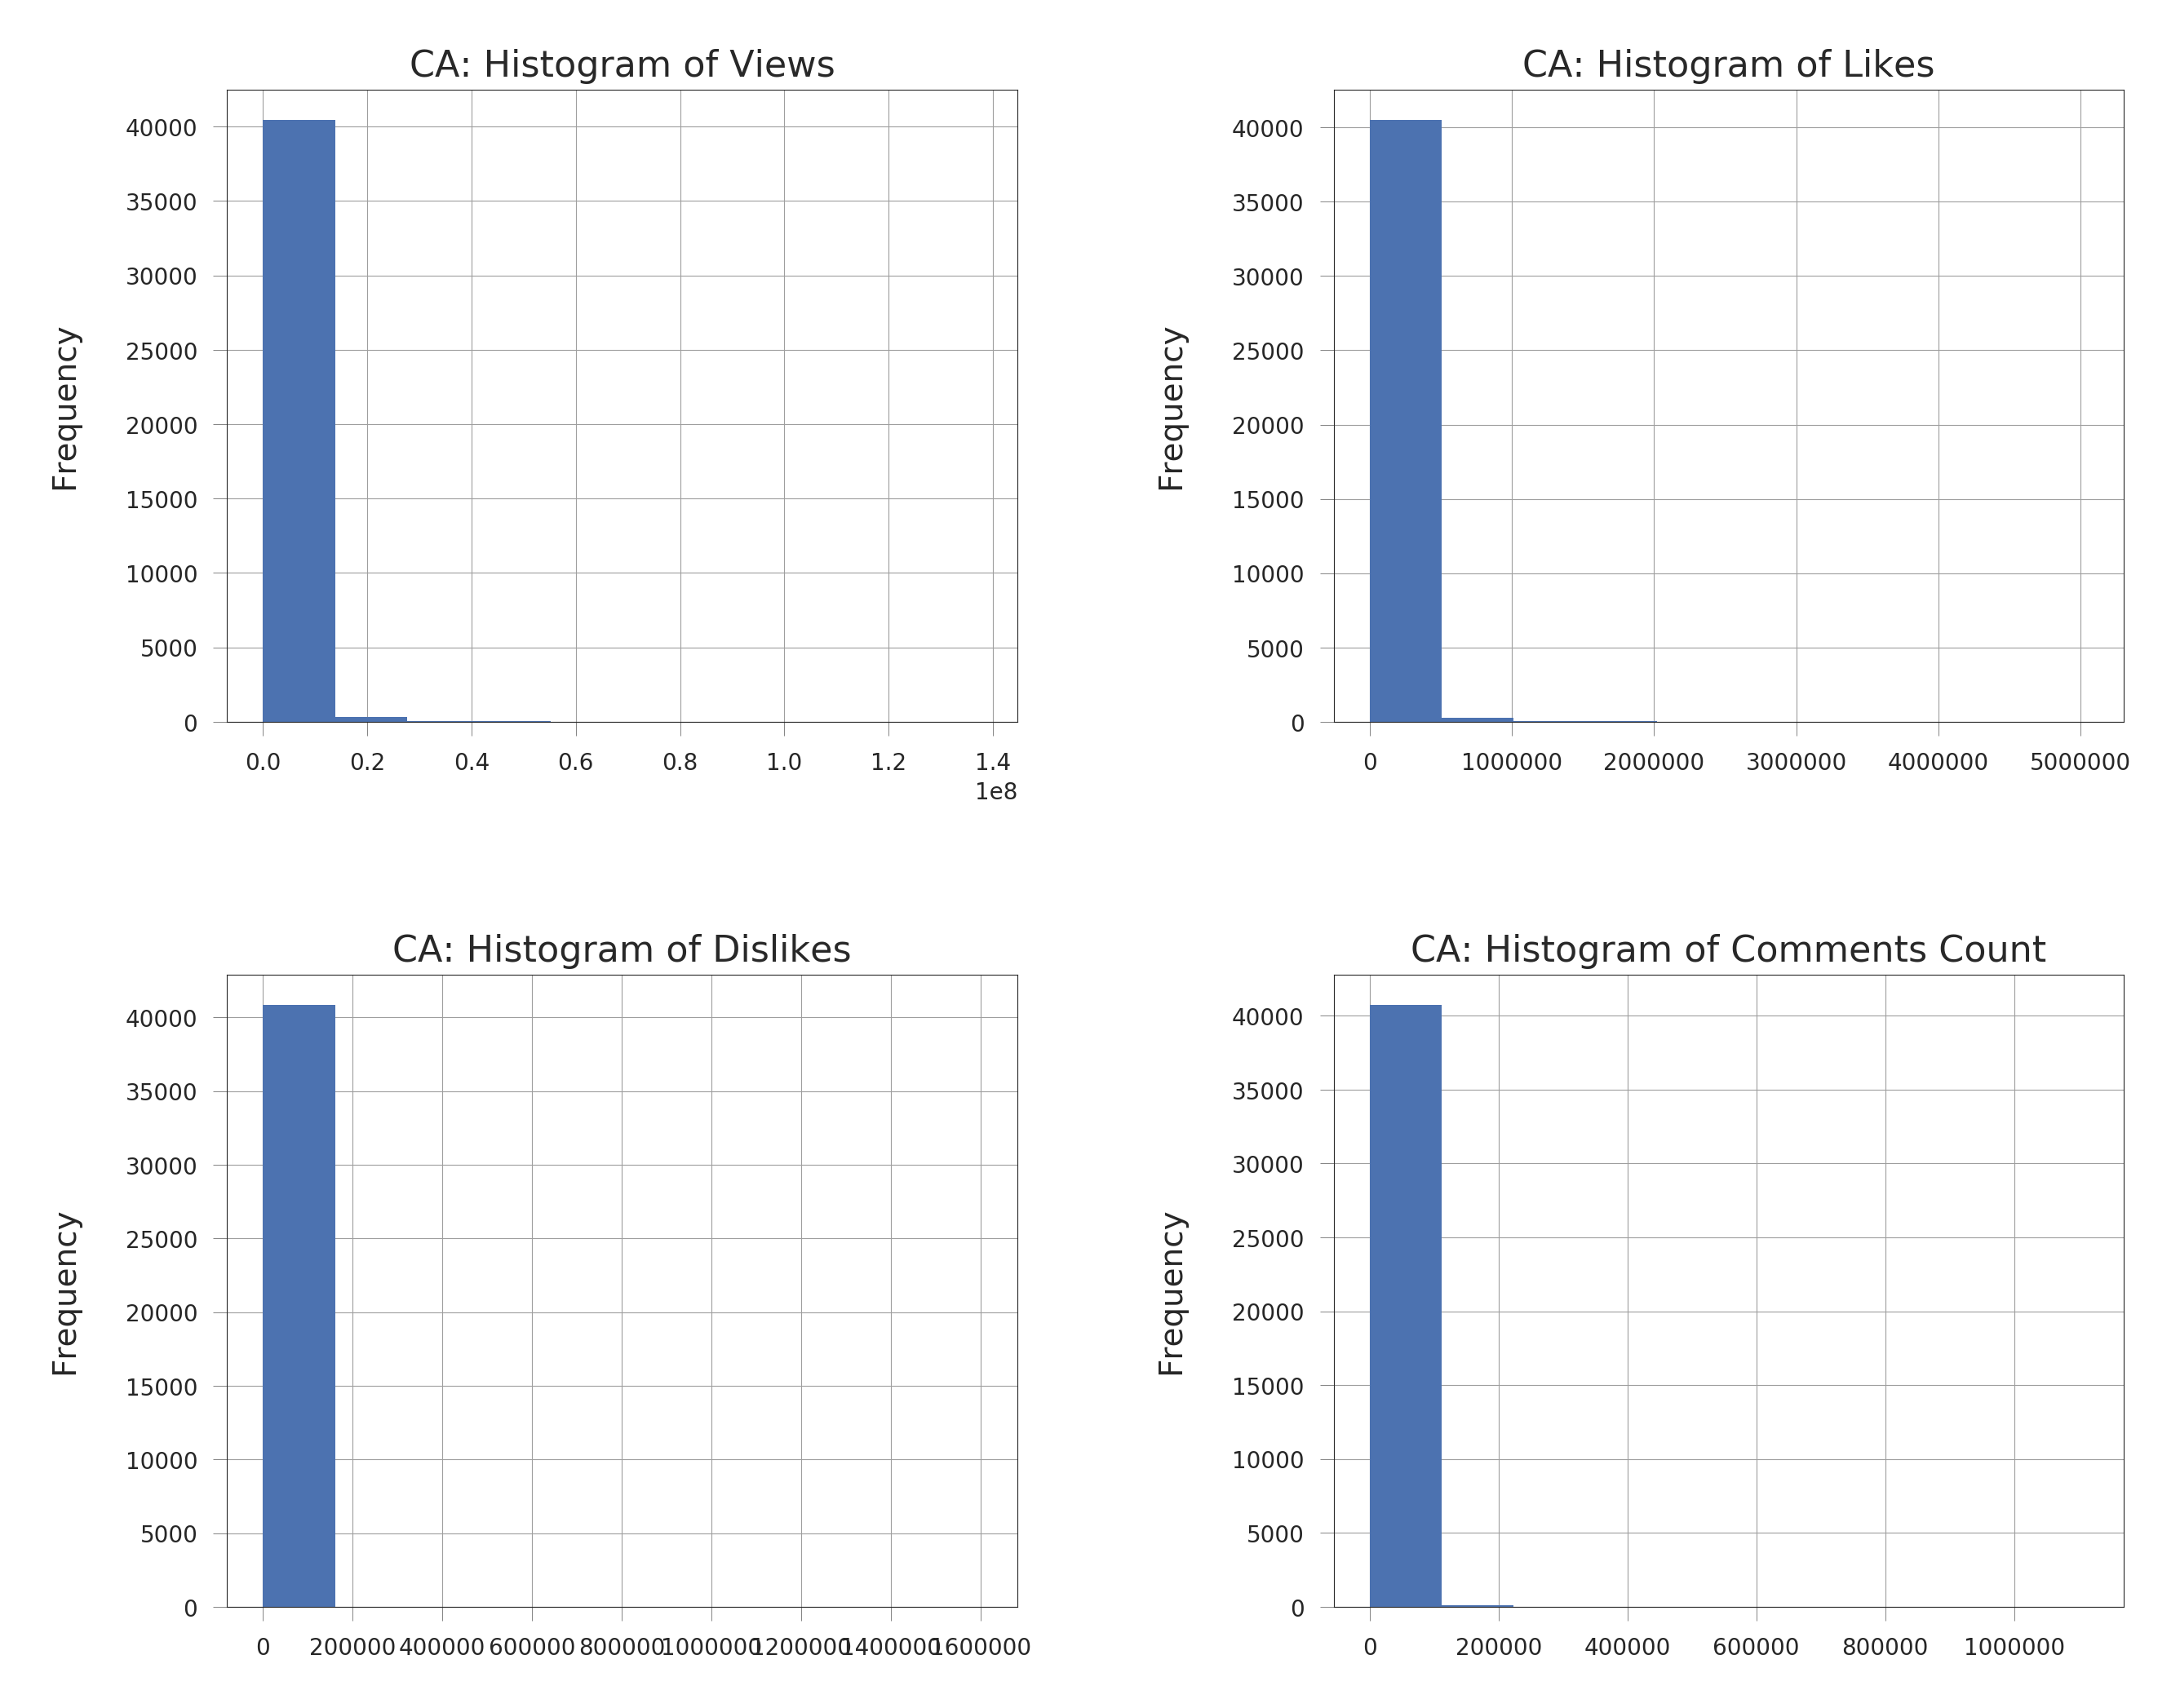

In [25]:
plt.figure(figsize = (15,12))

plt.subplot(221)
h1=df['views'].plot.hist()
h1.set_title("CA: Histogram of Views", fontsize=16)

plt.subplot(222)
h2=df['likes'].plot.hist()
h2.set_title("CA: Histogram of Likes", fontsize=16)

plt.subplot(223)
h3=df['dislikes'].plot.hist()
h3.set_title("CA: Histogram of Dislikes", fontsize=16)

plt.subplot(224)
h4=df['comment_count'].plot.hist()
h4.set_title("CA: Histogram of Comments Count", fontsize=16)


plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show();

In [26]:
keep_columns = ['views', 'likes', 'dislikes', 'comment_count'] 
corr_matrix = df[keep_columns].corr()
corr_matrix

views  likes  dislikes  comment_count
views           1.00   0.83      0.56           0.69
likes           0.83   1.00      0.46           0.84
dislikes        0.56   0.46      1.00           0.64
comment_count   0.69   0.84      0.64           1.00

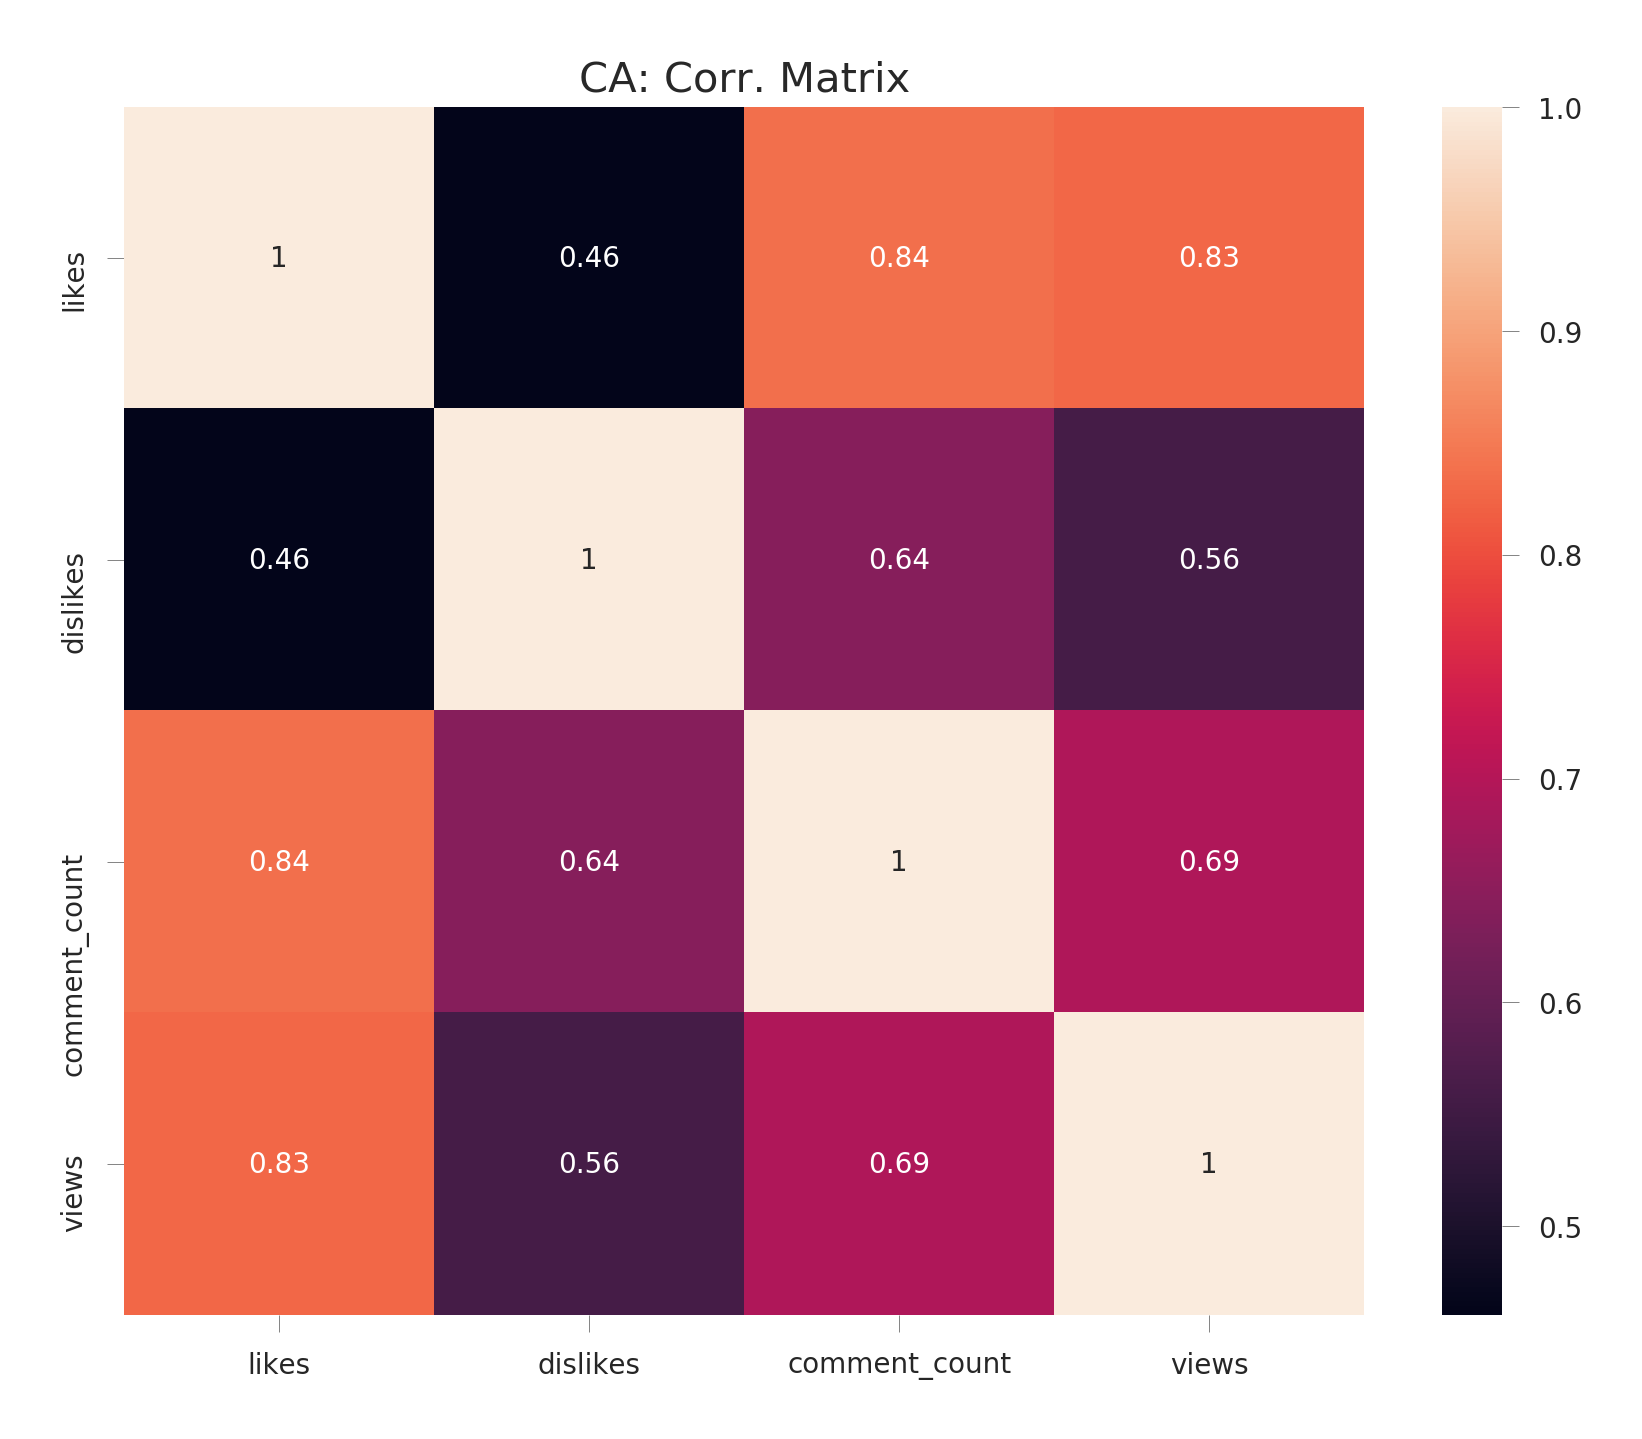

In [27]:
plt.figure(figsize = (10,8))
g = sns.heatmap(df[['likes', 'dislikes', 'comment_count', 'views']].corr(), annot=True)
g.set_title("CA: Corr. Matrix", fontsize=15)
plt.show();

In [28]:
df['title'].value_counts()

Drake - God's Plan (Official Audio)                                                                    15
Most Popular Violin Covers of Popular Songs 2018 || Best Instrumental Violin Covers 2018               15
Bruno Mars,Charlie Puth,Ed Sheeran Best Christmas Songs,Greatest Hits Pop Playlist Christmas 2018      13
Deleted video                                                                                          11
Merry Christmas 2018 - Top Christmas Songs Playlist 2018 - Best Christmas Songs Ever                   10
Nicki Minaj - Chun-Li                                                                                   9
Maroon 5 - Wait                                                                                         9
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                            9
Post Malone - rockstar ft. 21 Savage                                                                    8
G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi 

In [29]:
df['video_error_or_removed'].value_counts()

False    40854
True        27
Name: video_error_or_removed, dtype: int64

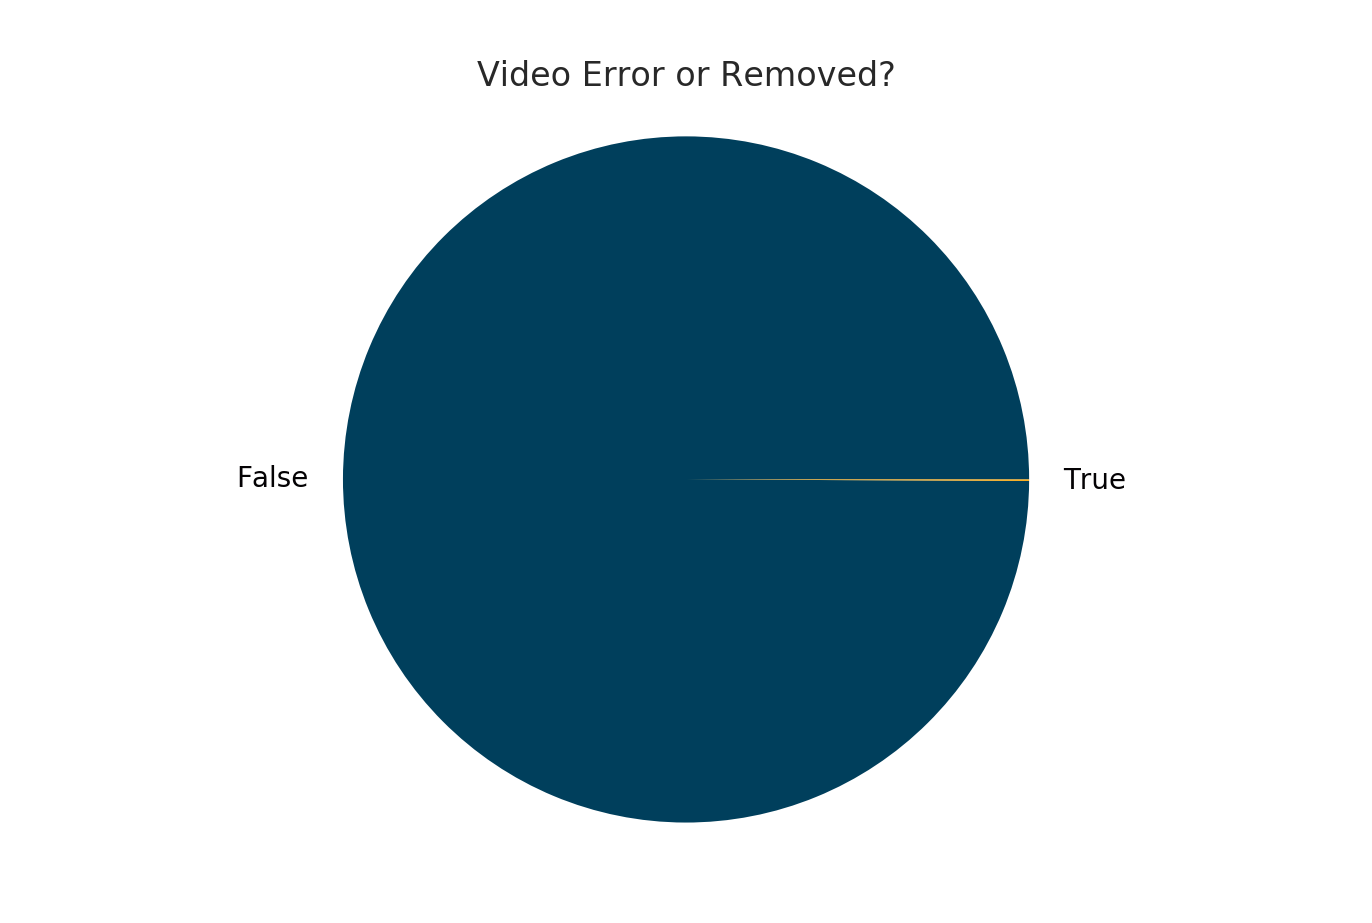

In [30]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['False', 'True'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Video Error or Removed?');

In [31]:
df['comments_disabled'].value_counts()

False    40298
True       583
Name: comments_disabled, dtype: int64

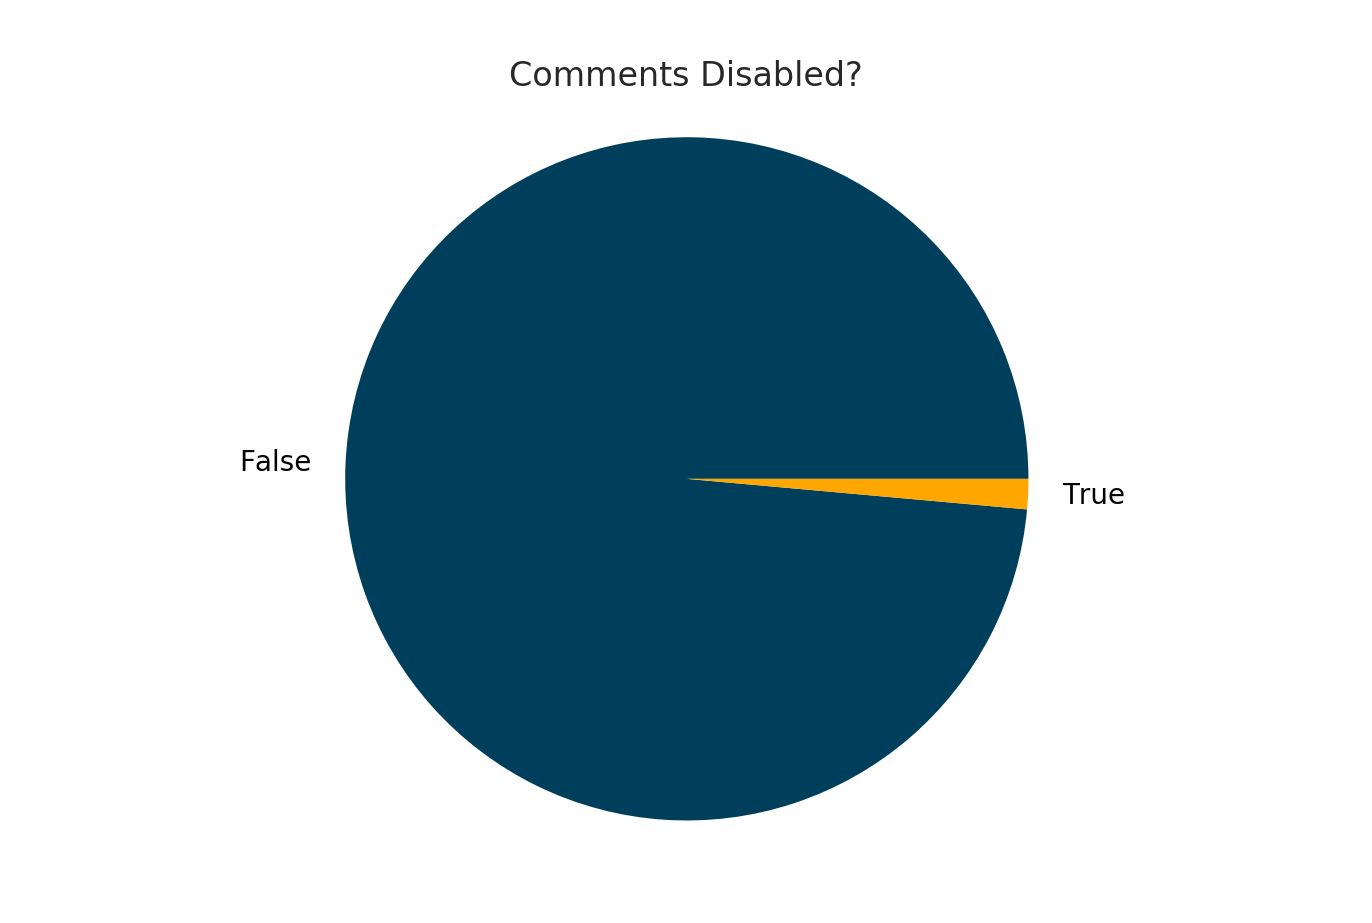

In [32]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[False], value_counts[True]], labels=['False', 'True'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Comments Disabled?');

In [33]:
df['ratings_disabled'].value_counts()

False    40602
True       279
Name: ratings_disabled, dtype: int64

In [34]:
keep_columns = ['views', 'likes', 'dislikes', 'comment_count'] 
corr_matrix = df[keep_columns].corr()
corr_matrix

views  likes  dislikes  comment_count
views           1.00   0.83      0.56           0.69
likes           0.83   1.00      0.46           0.84
dislikes        0.56   0.46      1.00           0.64
comment_count   0.69   0.84      0.64           1.00

In [35]:
df['title'].value_counts()

Drake - God's Plan (Official Audio)                                                                    15
Most Popular Violin Covers of Popular Songs 2018 || Best Instrumental Violin Covers 2018               15
Bruno Mars,Charlie Puth,Ed Sheeran Best Christmas Songs,Greatest Hits Pop Playlist Christmas 2018      13
Deleted video                                                                                          11
Merry Christmas 2018 - Top Christmas Songs Playlist 2018 - Best Christmas Songs Ever                   10
Nicki Minaj - Chun-Li                                                                                   9
Maroon 5 - Wait                                                                                         9
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                            9
Post Malone - rockstar ft. 21 Savage                                                                    8
G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi 

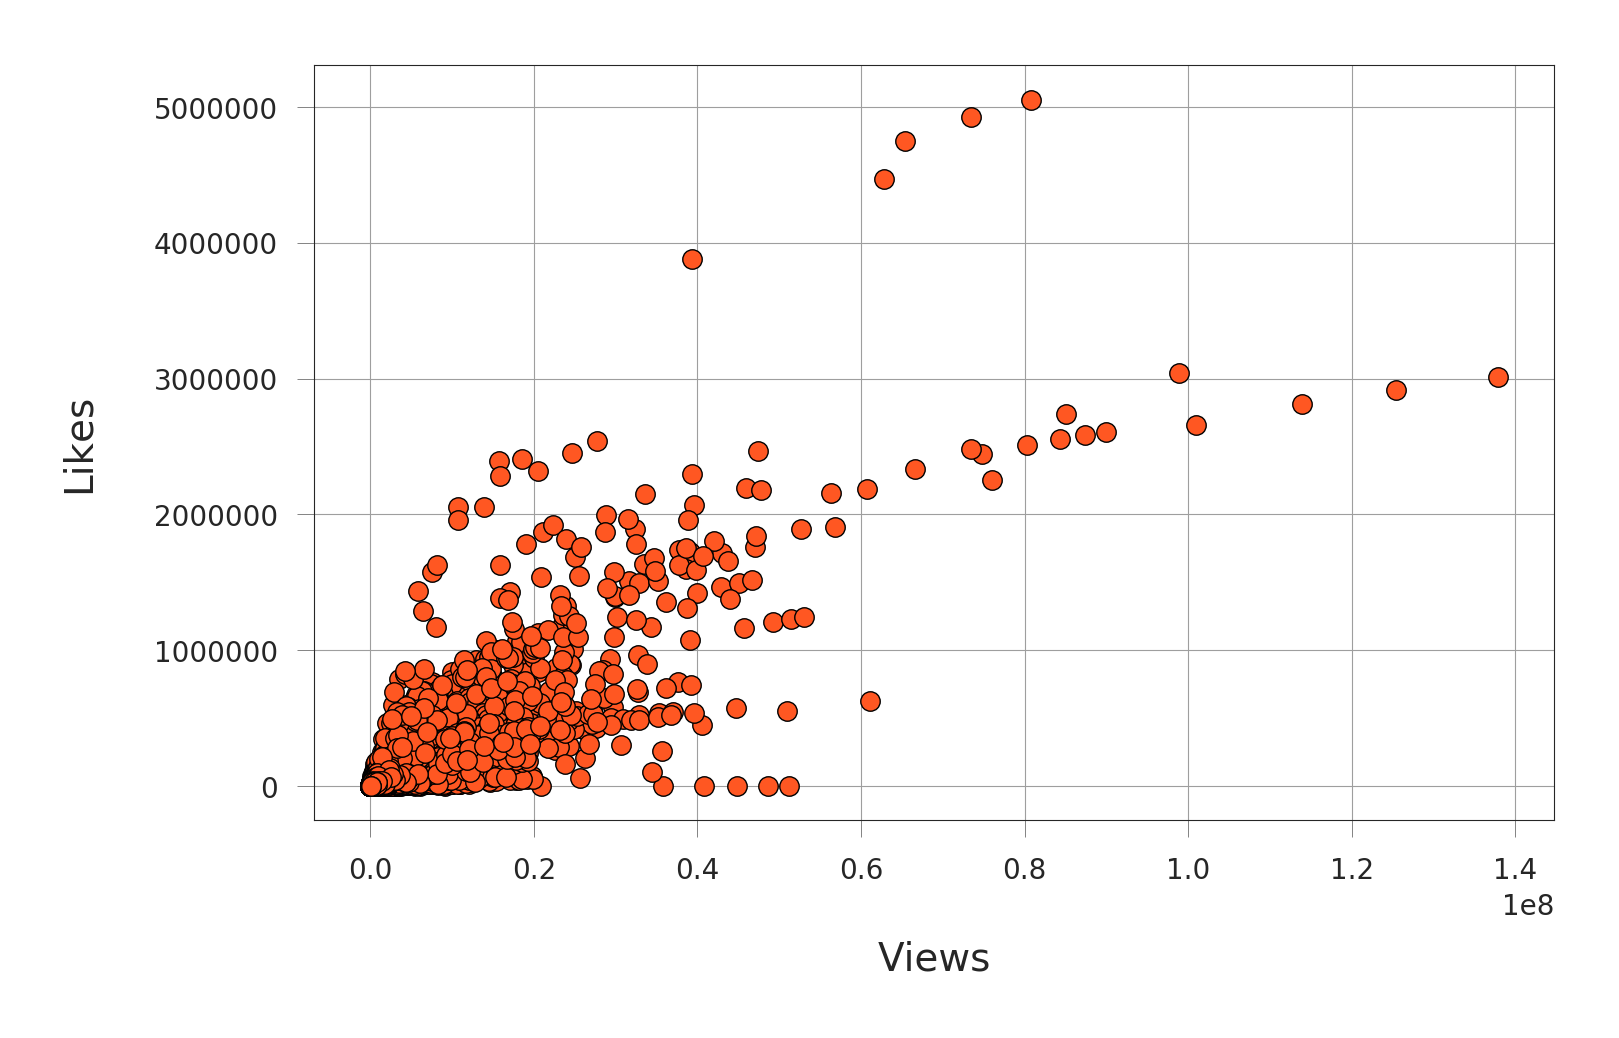

In [36]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Likes");

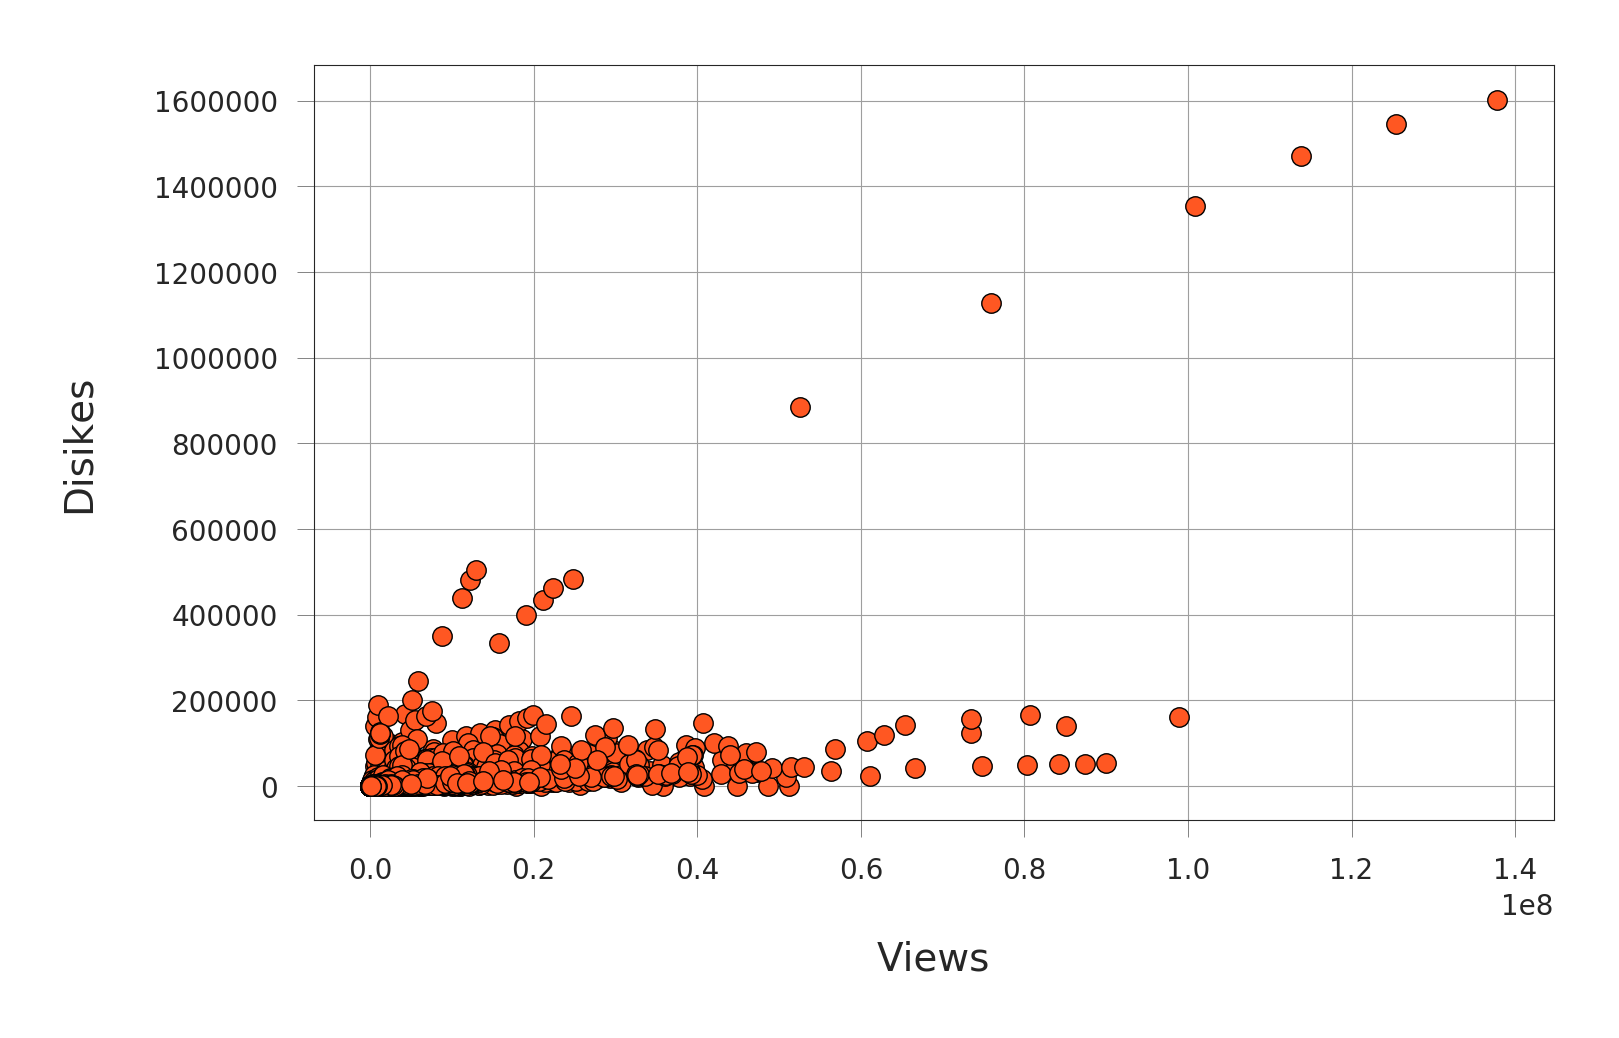

In [37]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Disikes");

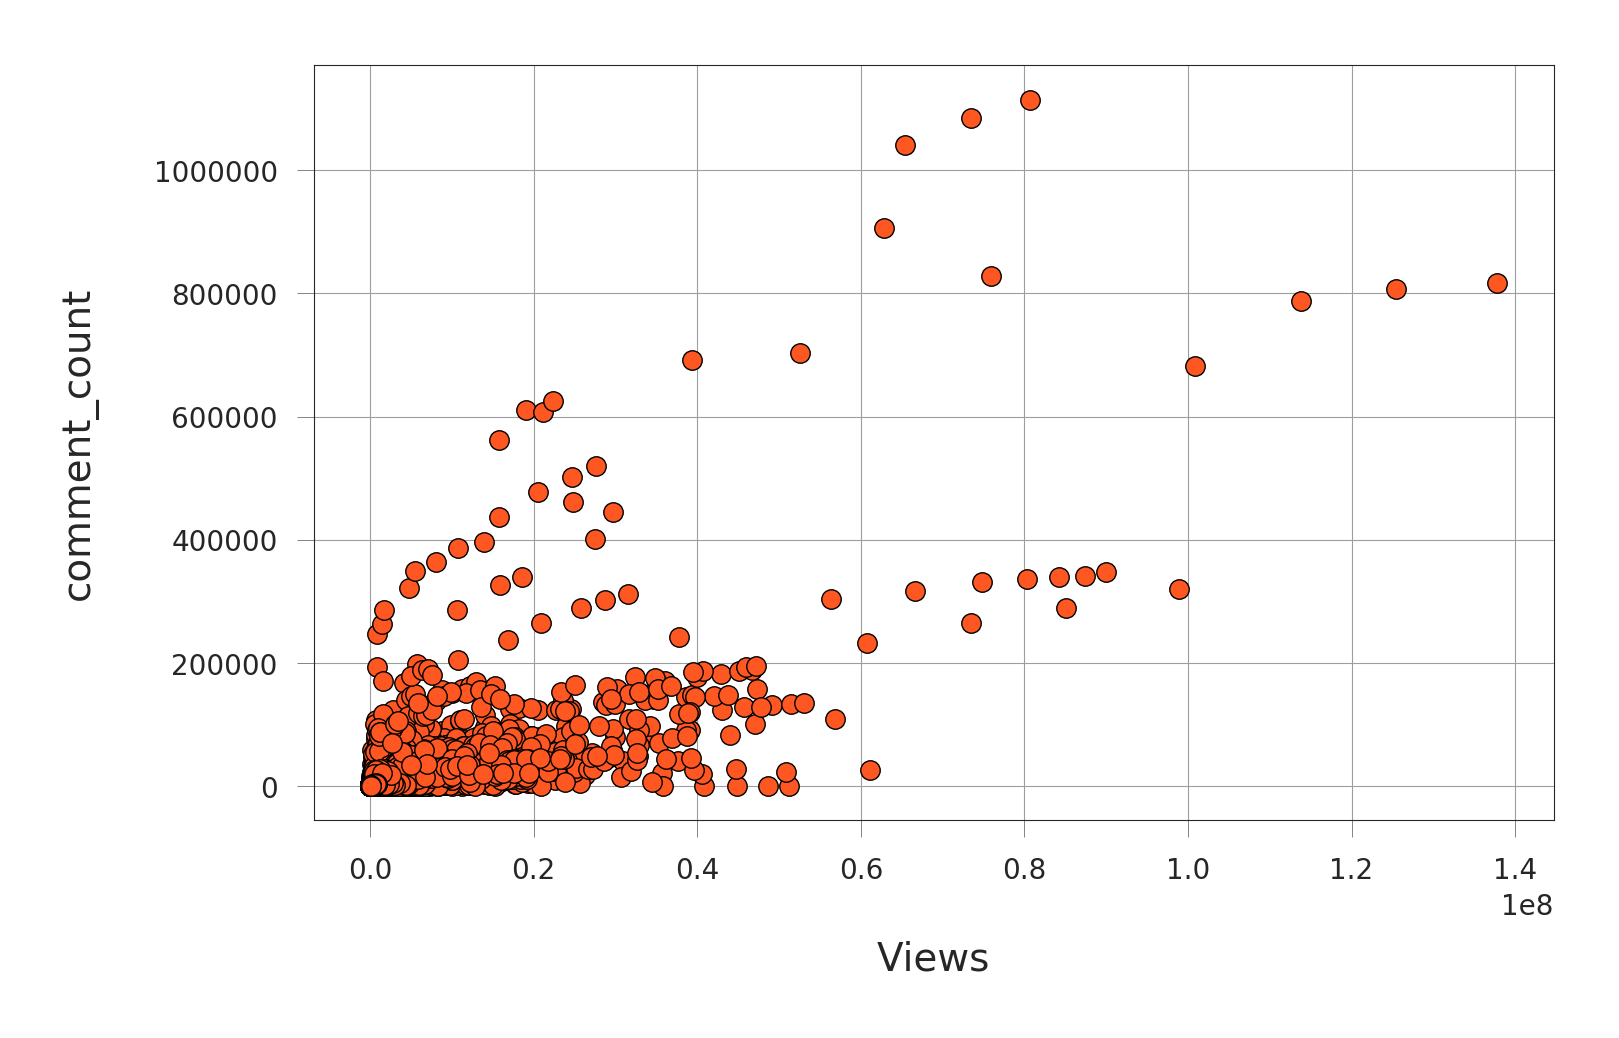

In [38]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="comment_count");

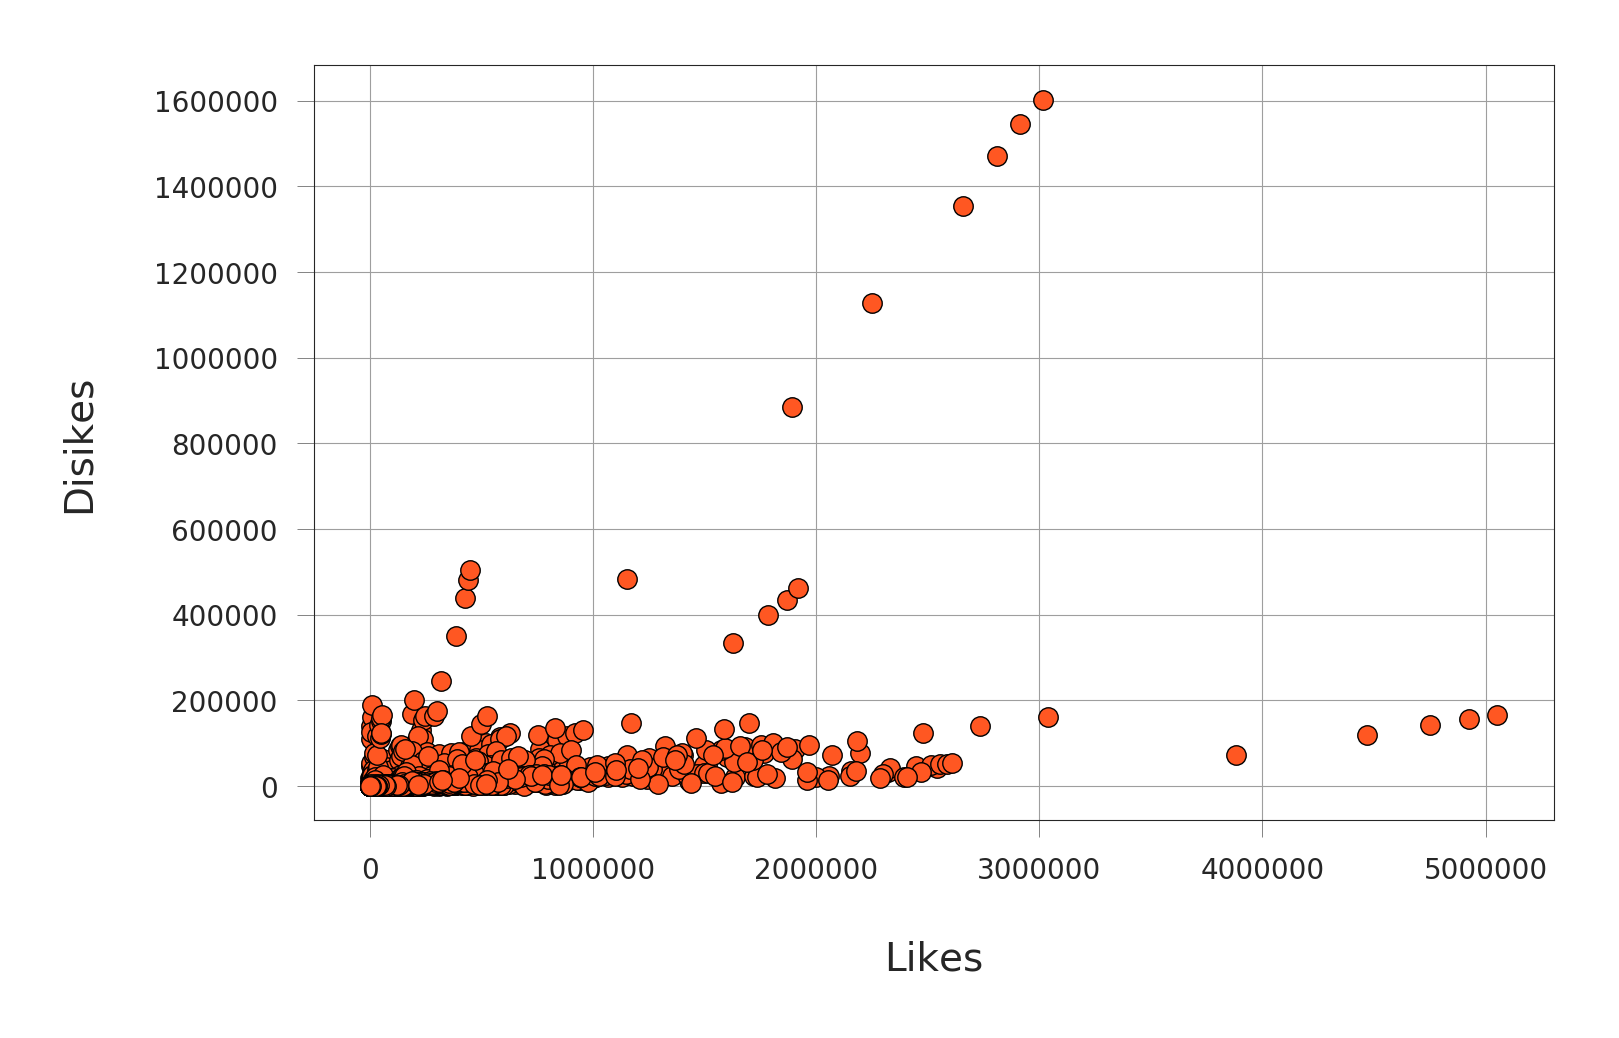

In [39]:
fig, ax = plt.subplots()
plt.scatter(x=df['likes'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Likes", ylabel="Disikes");

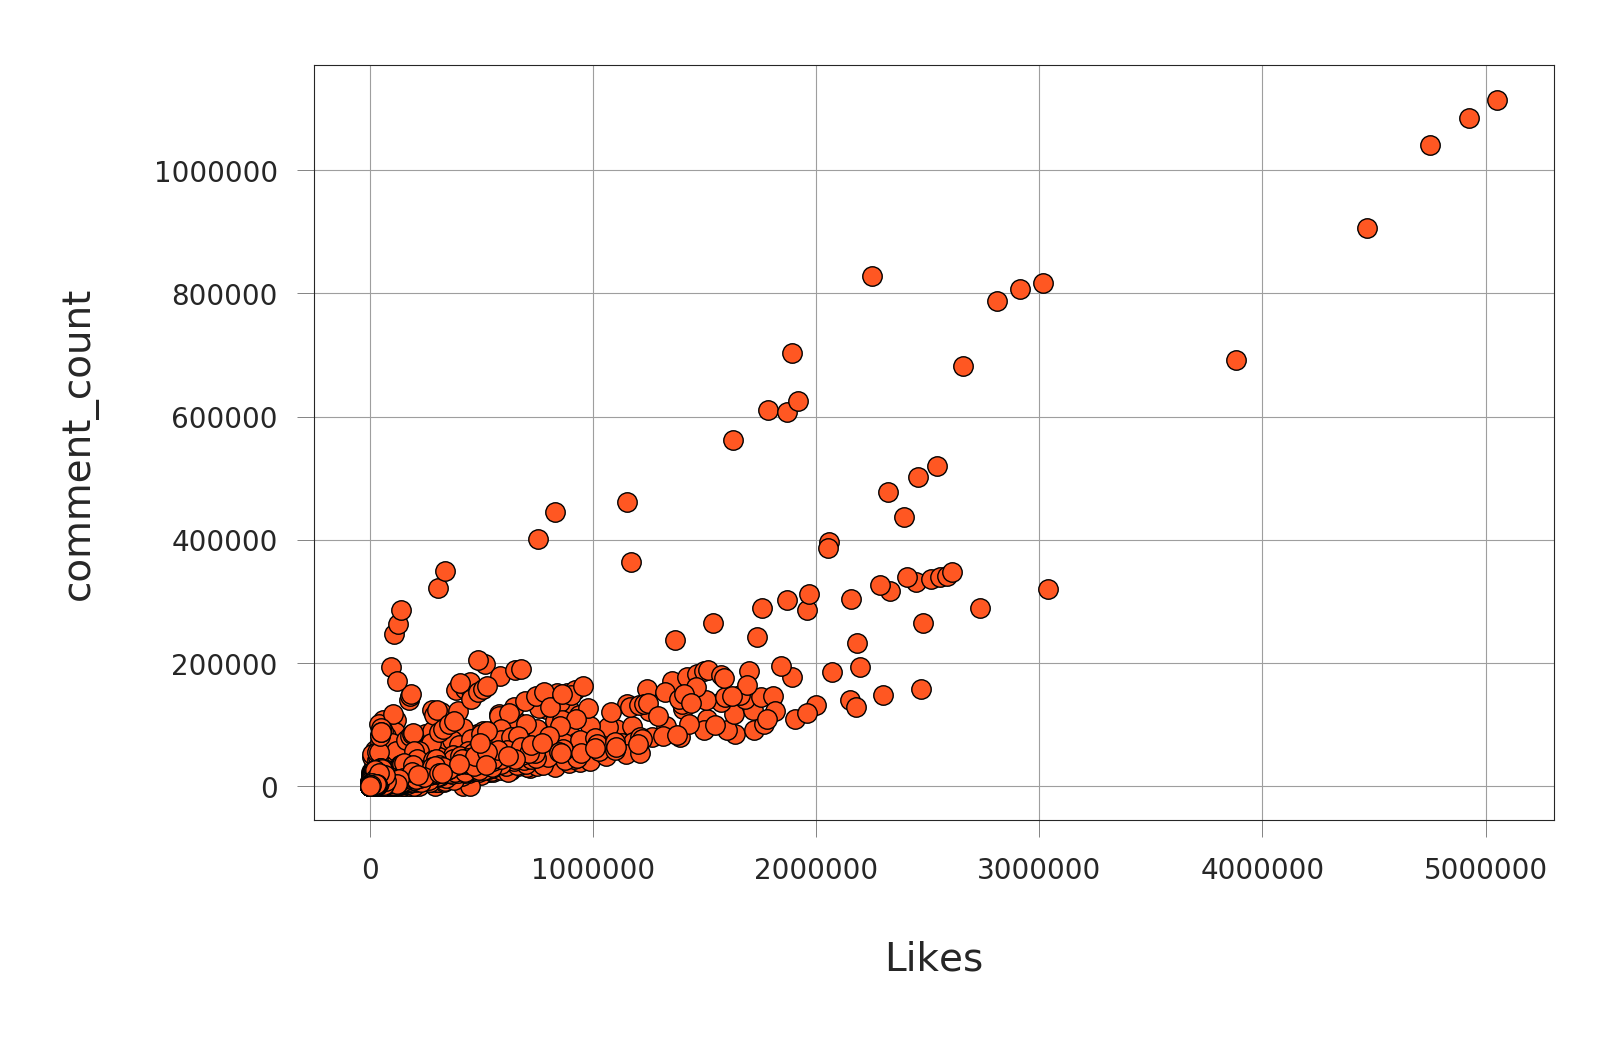

In [40]:
fig, ax = plt.subplots()
plt.scatter(x=df['likes'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Likes", ylabel="comment_count");

In [41]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

df['like_rate'] =  df['likes'] / df['views'] * 100
df['dislike_rate'] =  df['dislikes'] / df['views'] * 100
df['comment_rate'] =  df['comment_count'] / df['views'] * 100

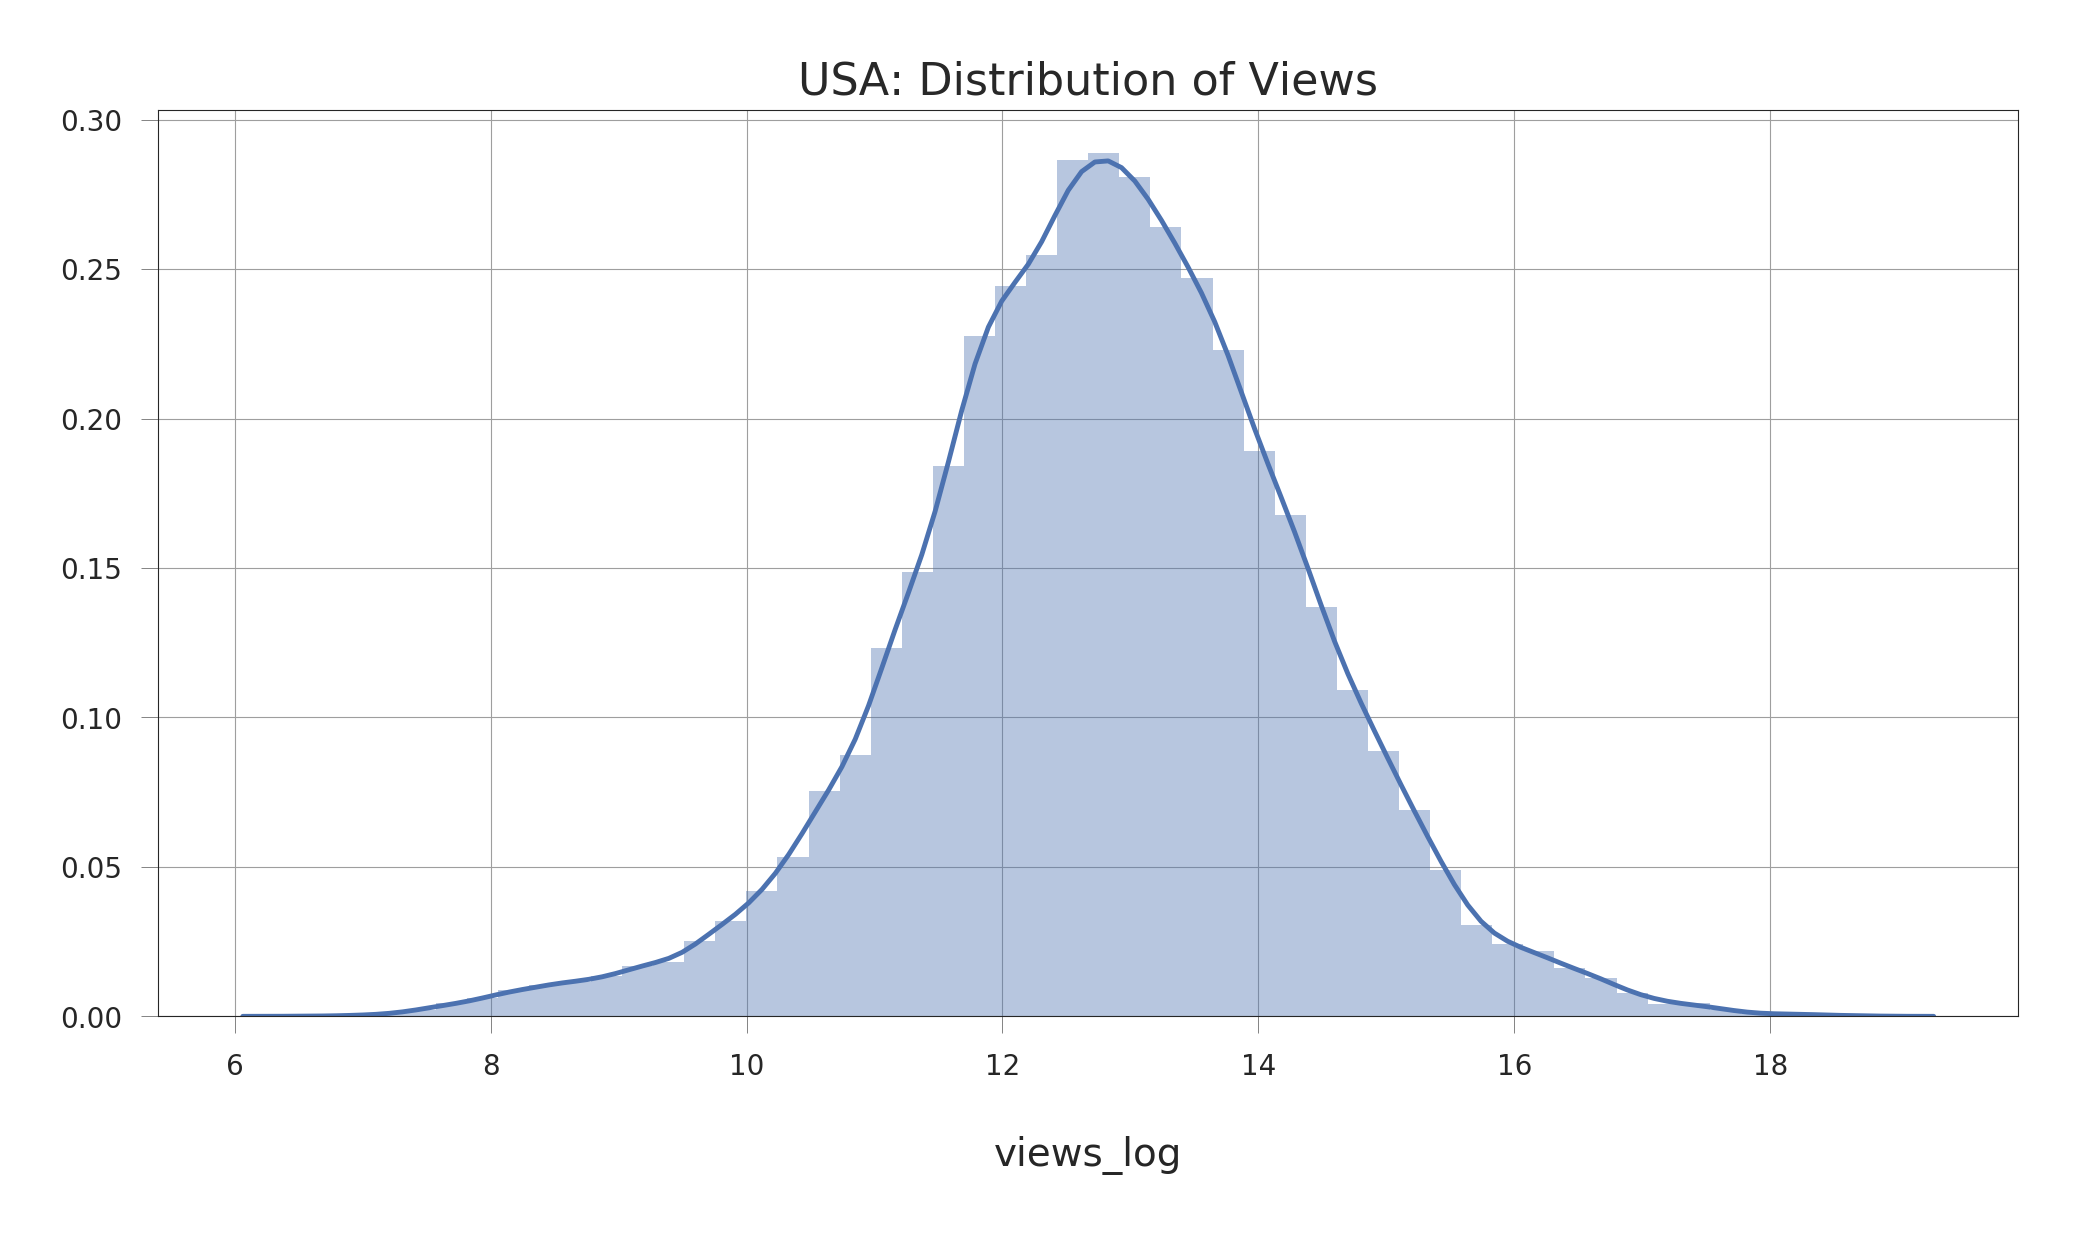

In [42]:
plt.figure(figsize = (12,6))
l1 = sns.distplot(df['views_log'])
l1.set_title("USA: Distribution of Views", fontsize=16);

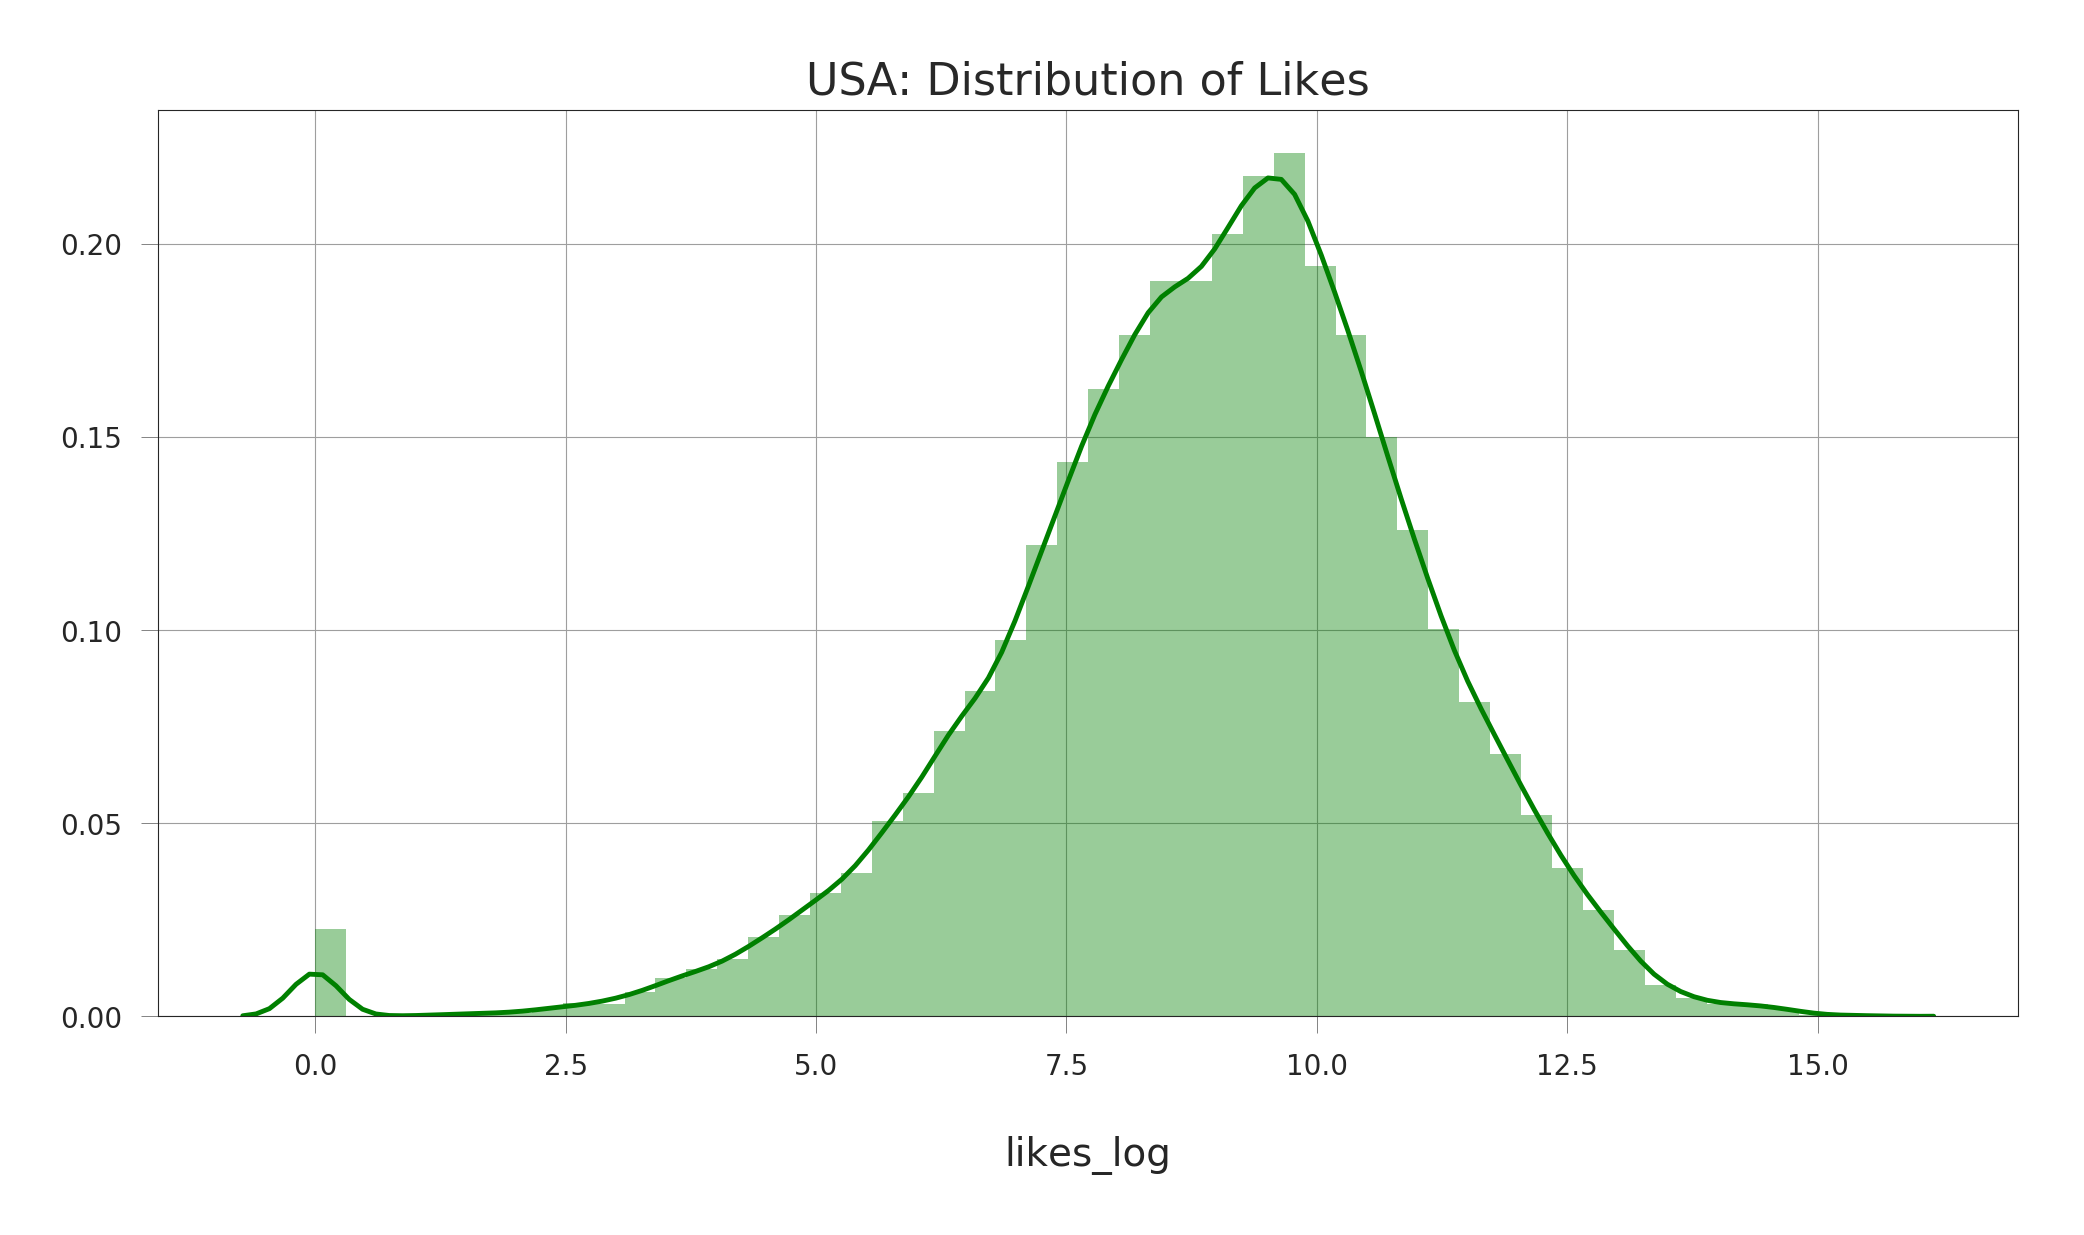

In [43]:
plt.figure(figsize = (12,6))
l2 = sns.distplot(df['likes_log'],color='green')
l2.set_title('USA: Distribution of Likes', fontsize=16);

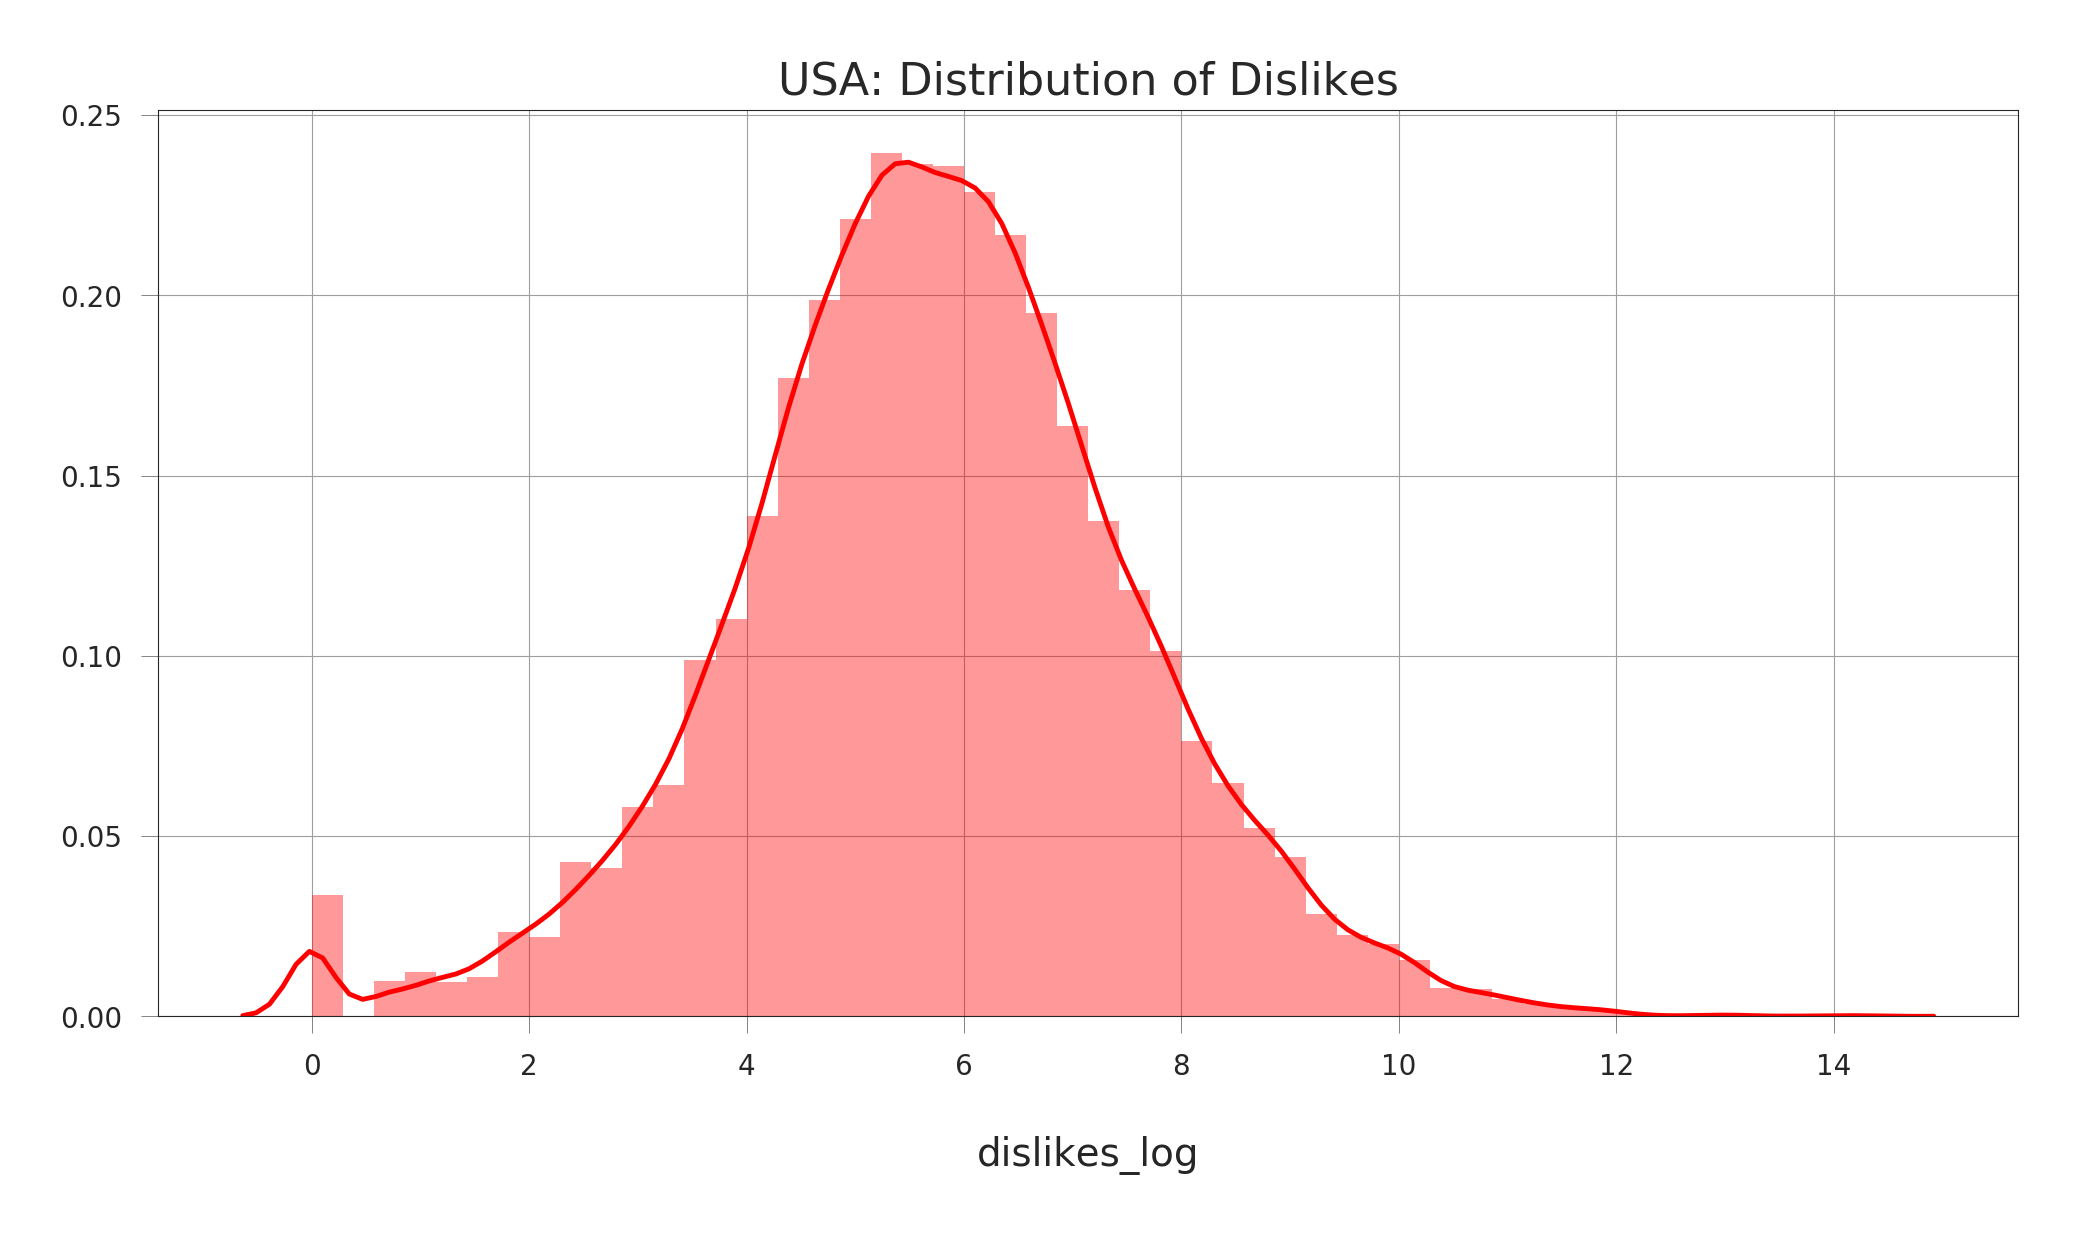

In [44]:
plt.figure(figsize = (12,6))
l3 = sns.distplot(df['dislikes_log'], color='r')
l3.set_title("USA: Distribution of Dislikes", fontsize=16);

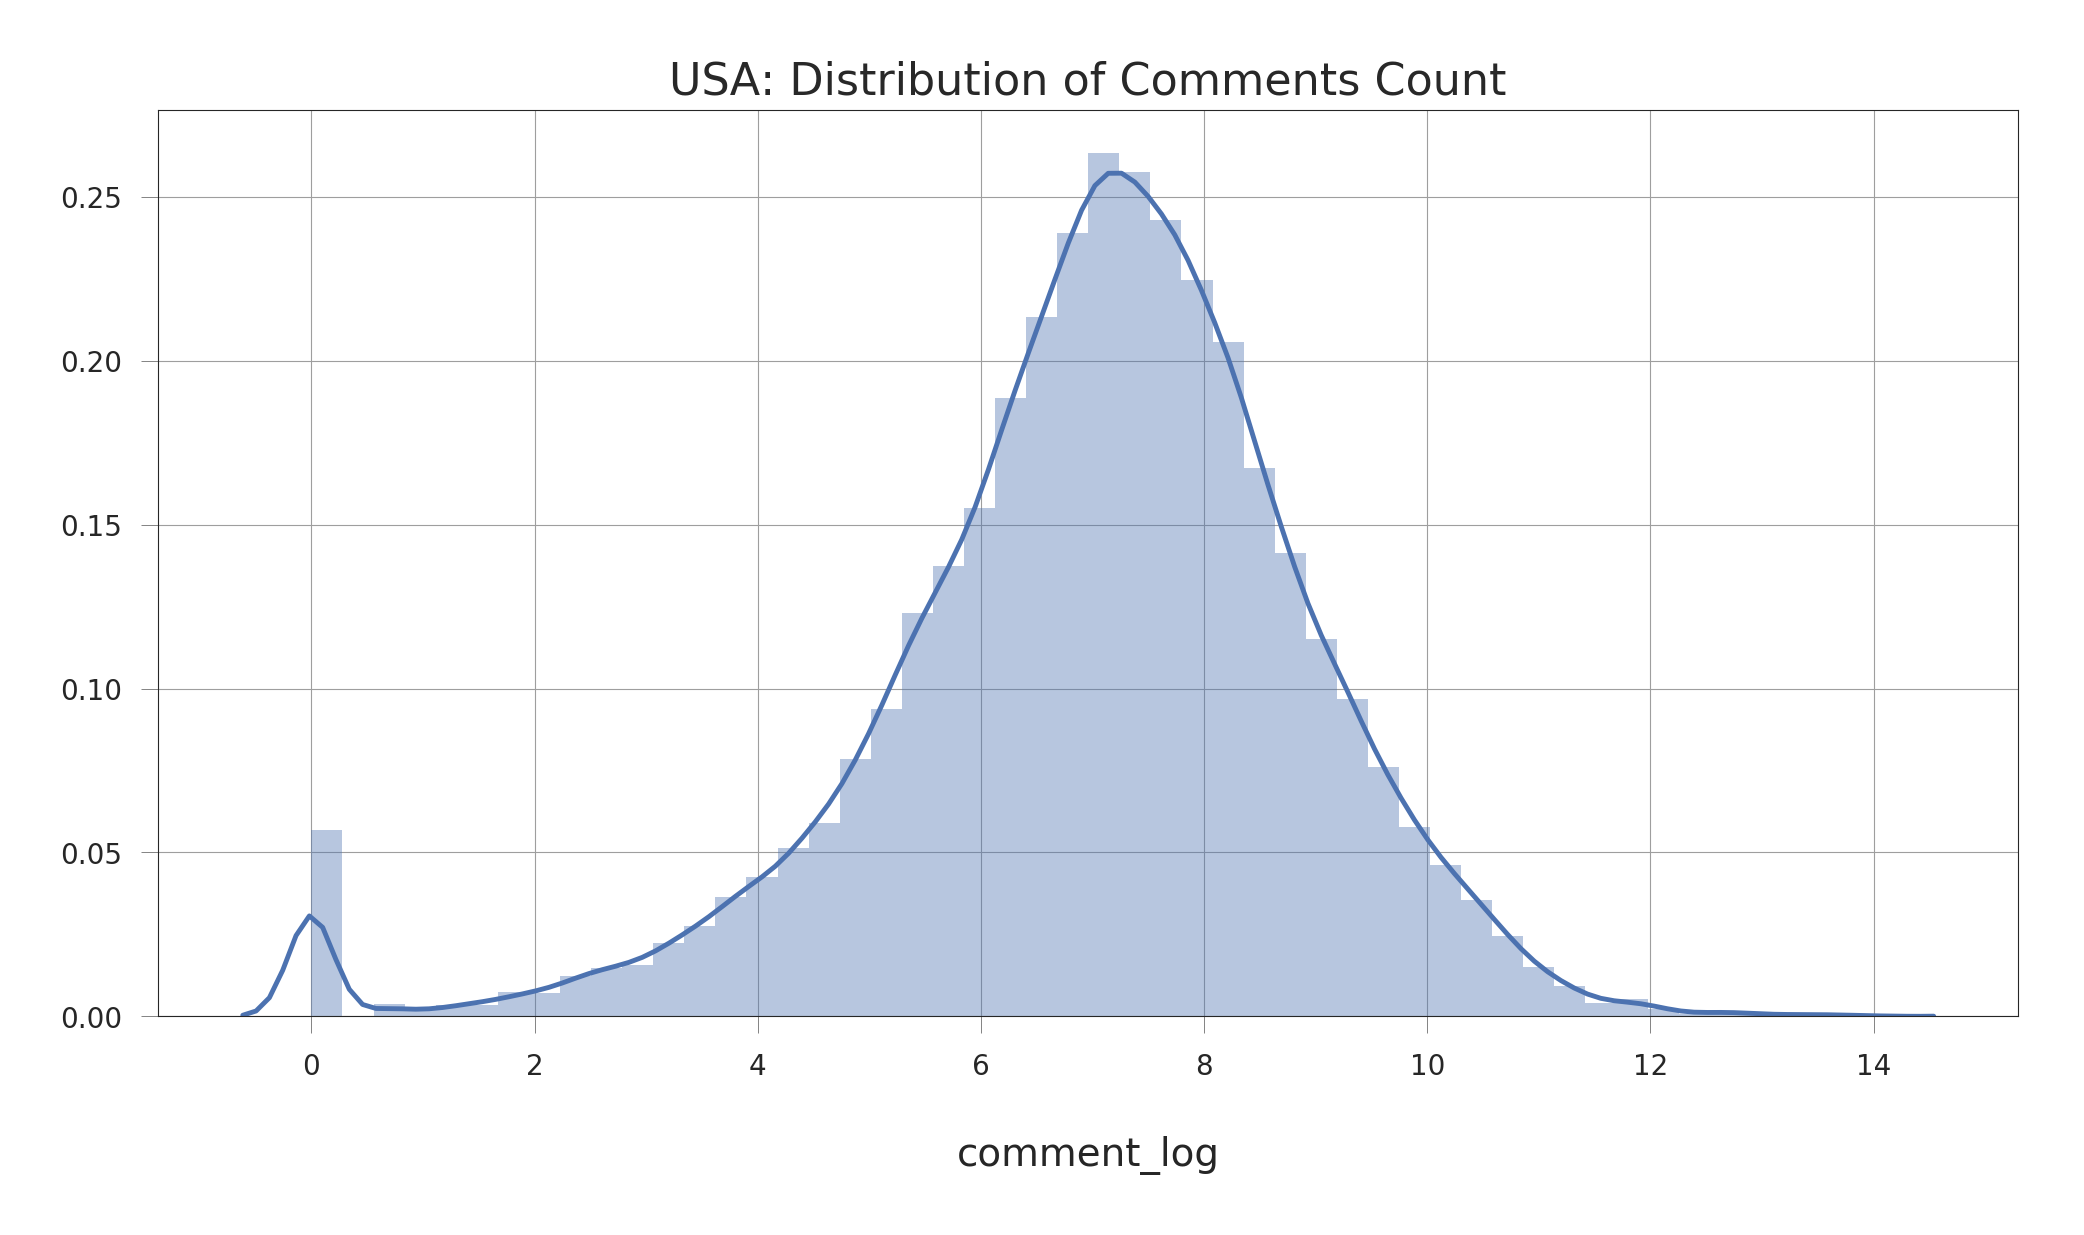

In [45]:
plt.figure(figsize = (12,6))
l4 = sns.distplot(df['comment_log'])
l4.set_title("USA: Distribution of Comments Count", fontsize=16);

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40881 entries, n1WpP7iowLc to POTgw38-m58
Data columns (total 25 columns):
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null object
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               40881 non-null object
category_name             40881 non-null object
publishing_day            40881 non-null object
publishing_hour           40881 non-null object
likes_log                 

In [47]:
df['comments_disabled'].value_counts(normalize=True)

False   0.99
True    0.01
Name: comments_disabled, dtype: float64

In [48]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'].head()

video_id
n1WpP7iowLc   2017-11-14
0dBIkQ4Mz1M   2017-11-14
5qpjK5DgCt4   2017-11-14
d380meD0W0M   2017-11-14
2Vv-BfVoq4g   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [50]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_time'].head()

video_id
n1WpP7iowLc   2017-11-10 17:00:03
0dBIkQ4Mz1M   2017-11-13 17:00:00
5qpjK5DgCt4   2017-11-12 19:05:24
d380meD0W0M   2017-11-12 18:01:41
2Vv-BfVoq4g   2017-11-09 11:04:14
Name: publish_time, dtype: datetime64[ns]

In [51]:
df.insert(4, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df[['publish_date', 'publish_time']].head()

publish_date publish_time
video_id                             
n1WpP7iowLc   2017-11-10     17:00:03
0dBIkQ4Mz1M   2017-11-13     17:00:00
5qpjK5DgCt4   2017-11-12     19:05:24
d380meD0W0M   2017-11-12     18:01:41
2Vv-BfVoq4g   2017-11-09     11:04:14

In [52]:
df[df["description"].apply(lambda x: pd.isnull(x))].head(1)

Empty DataFrame
Columns: [trending_date, title, channel_title, category_id, publish_date, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, description, category_name, publishing_day, publishing_hour, likes_log, views_log, dislikes_log, comment_log, like_rate, dislike_rate, comment_rate]
Index: []

[0 rows x 26 columns]

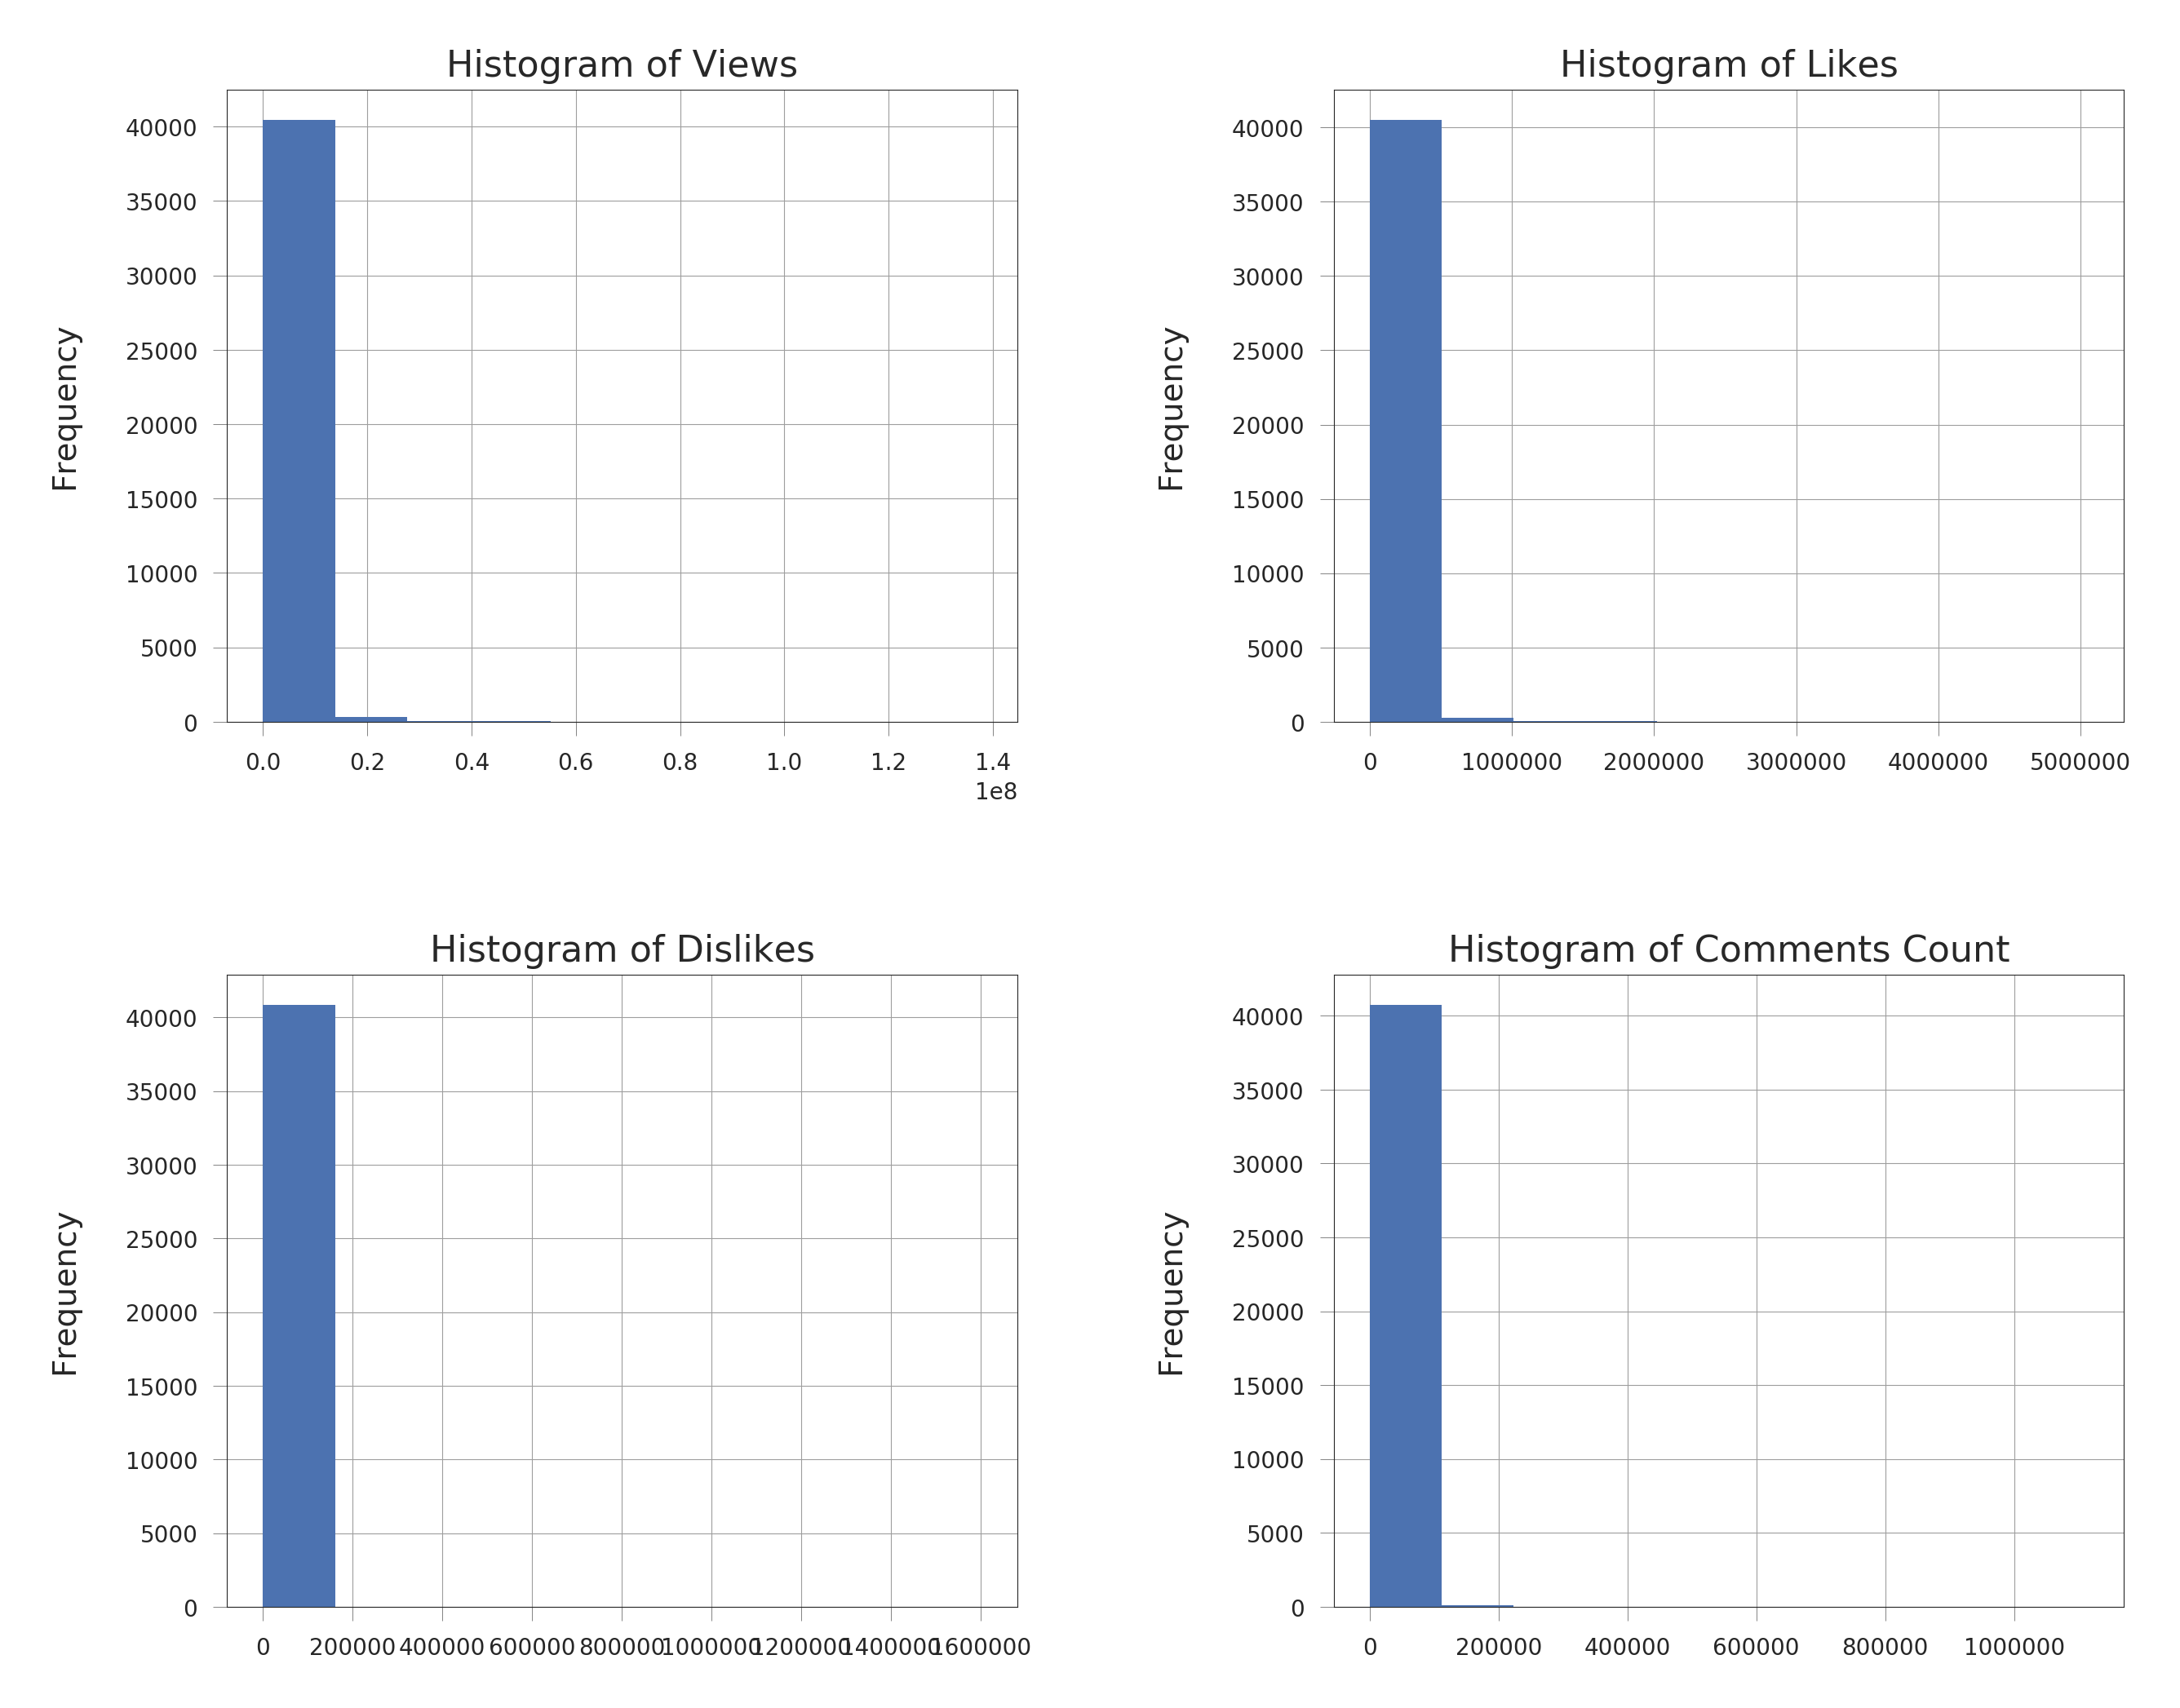

In [53]:
plt.figure(figsize = (15,12))

plt.subplot(221)
h1=df['views'].plot.hist()
h1.set_title("Histogram of Views", fontsize=16)

plt.subplot(222)
h2=df['likes'].plot.hist()
h2.set_title("Histogram of Likes", fontsize=16)

plt.subplot(223)
h3=df['dislikes'].plot.hist()
h3.set_title("Histogram of Dislikes", fontsize=16)

plt.subplot(224)
h4=df['comment_count'].plot.hist()
h4.set_title("Histogram of Comments Count", fontsize=16)


plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show();

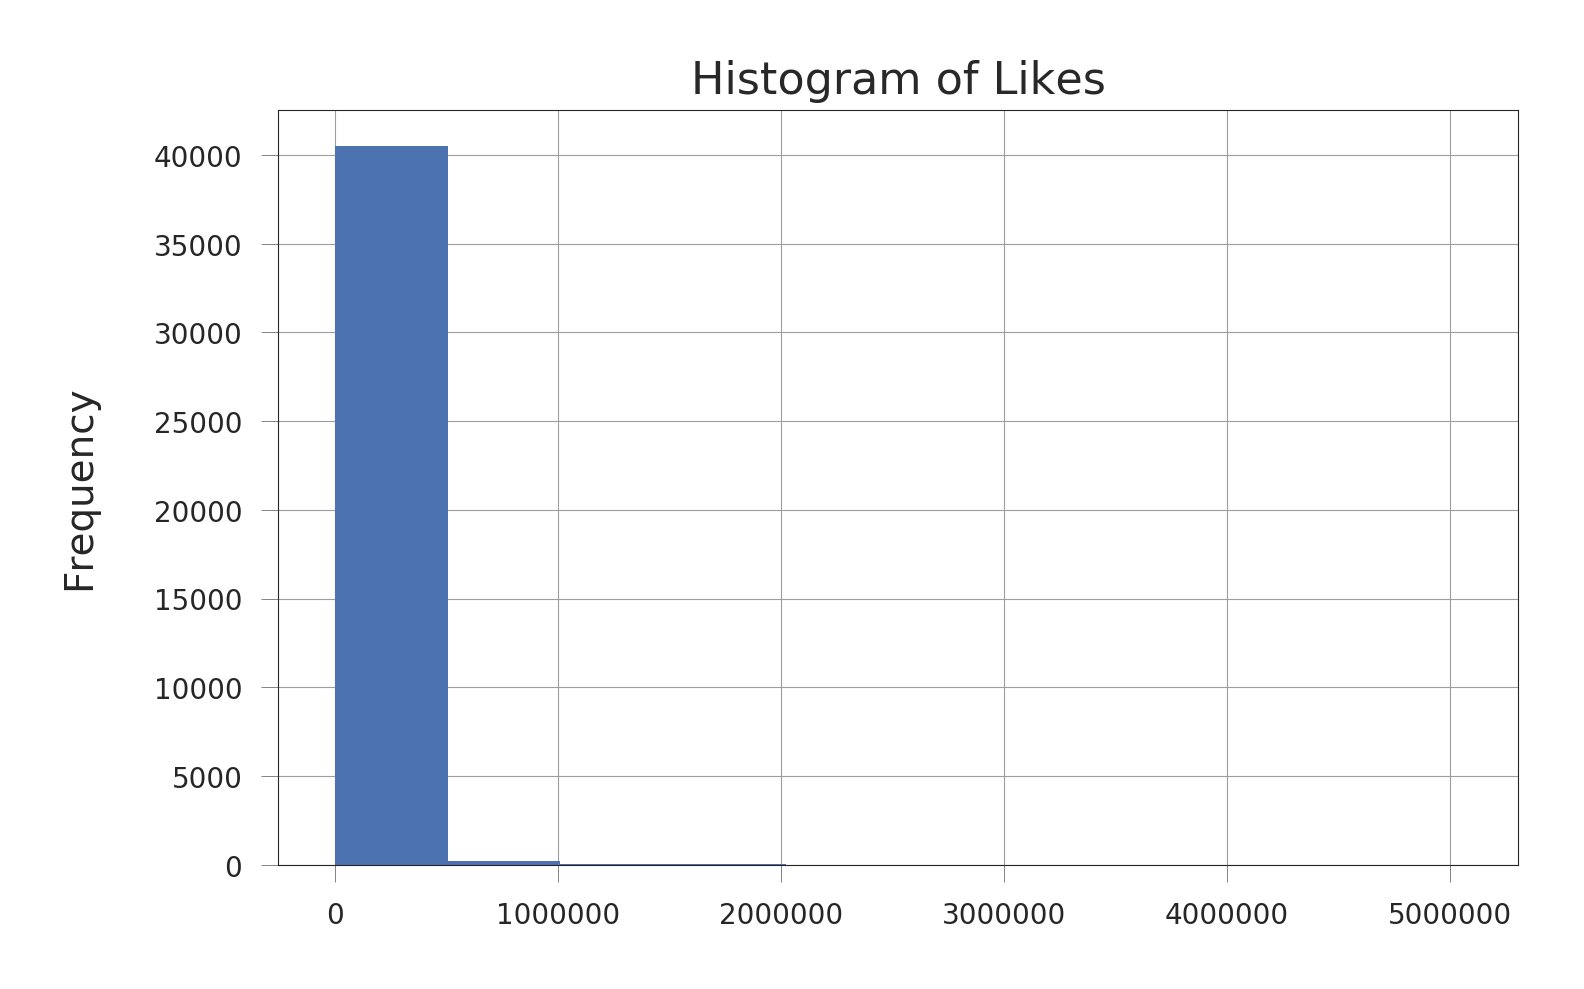

In [54]:
h2=df['likes'].plot.hist()
h2.set_title("Histogram of Likes", fontsize=16);

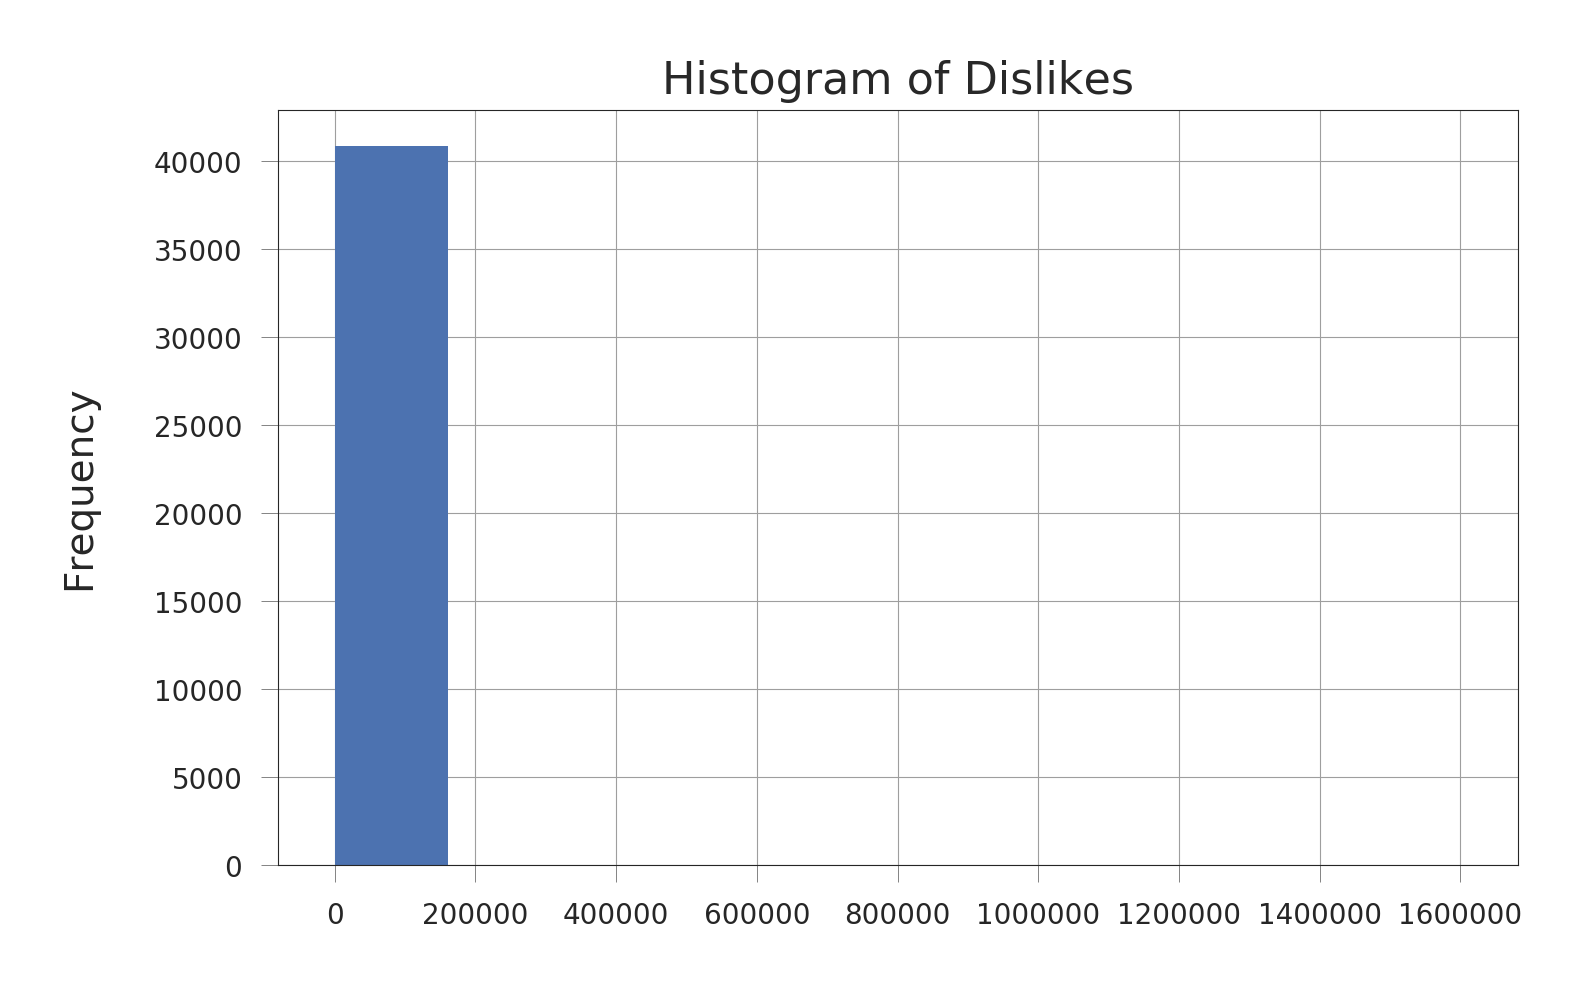

In [55]:
h3=df['dislikes'].plot.hist()
h3.set_title("Histogram of Dislikes", fontsize=16);

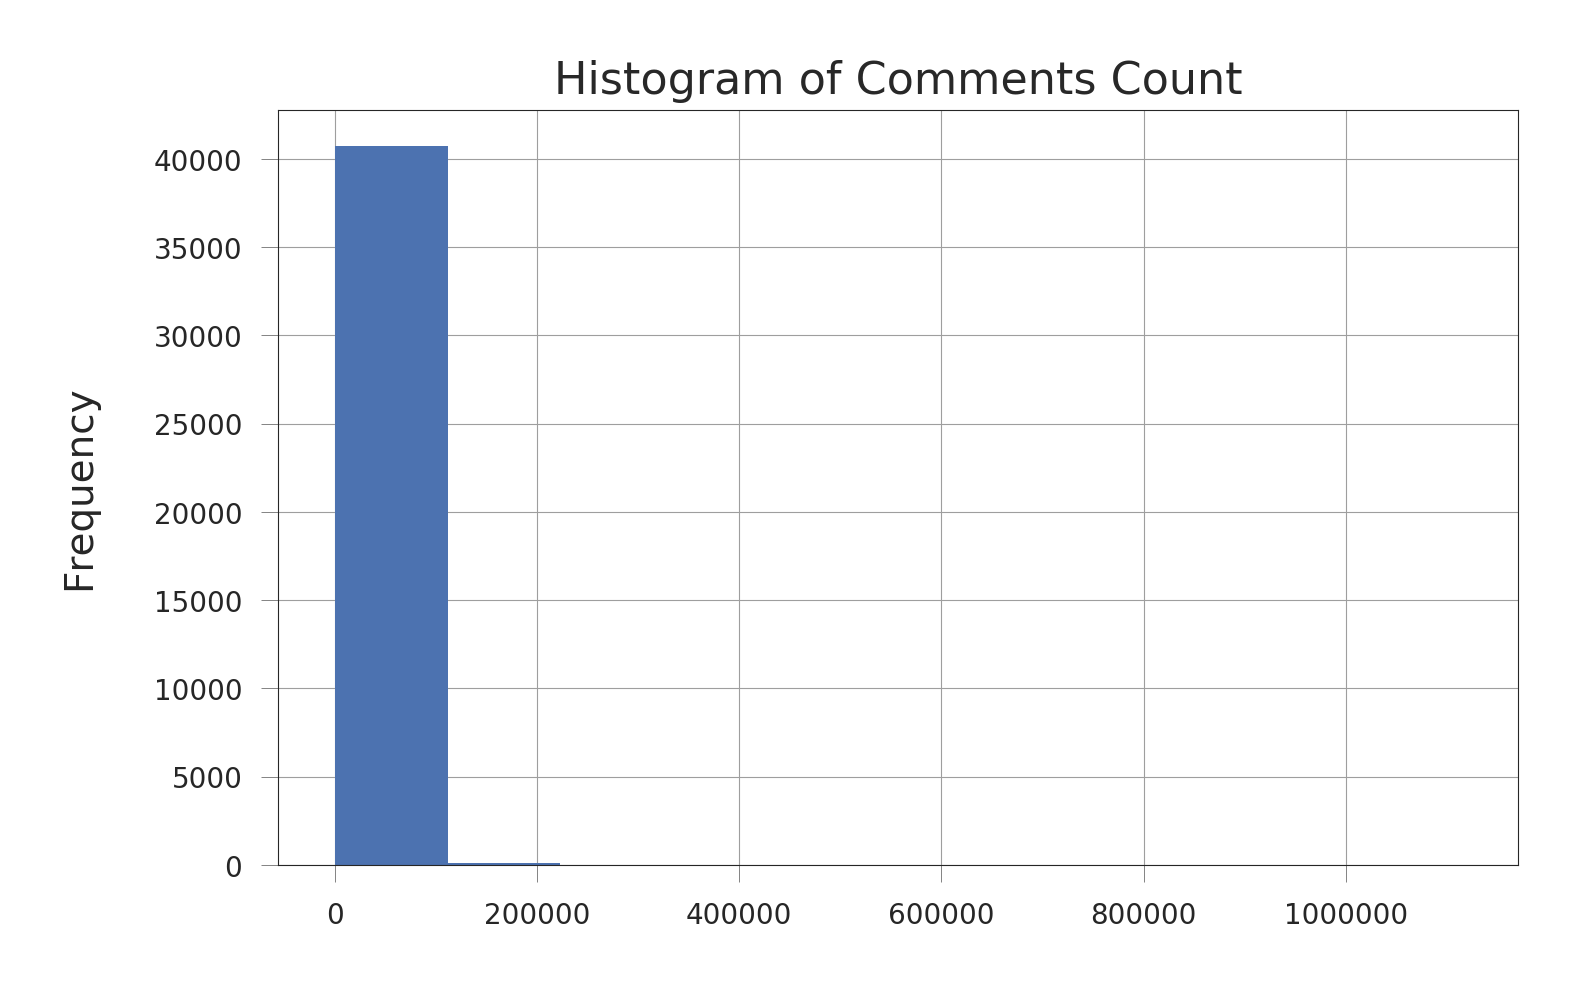

In [56]:
h=df['comment_count'].plot.hist()
h.set_title("Histogram of Comments Count", fontsize=16);

In [57]:
df['comments_disabled'].value_counts()

False    40298
True       583
Name: comments_disabled, dtype: int64

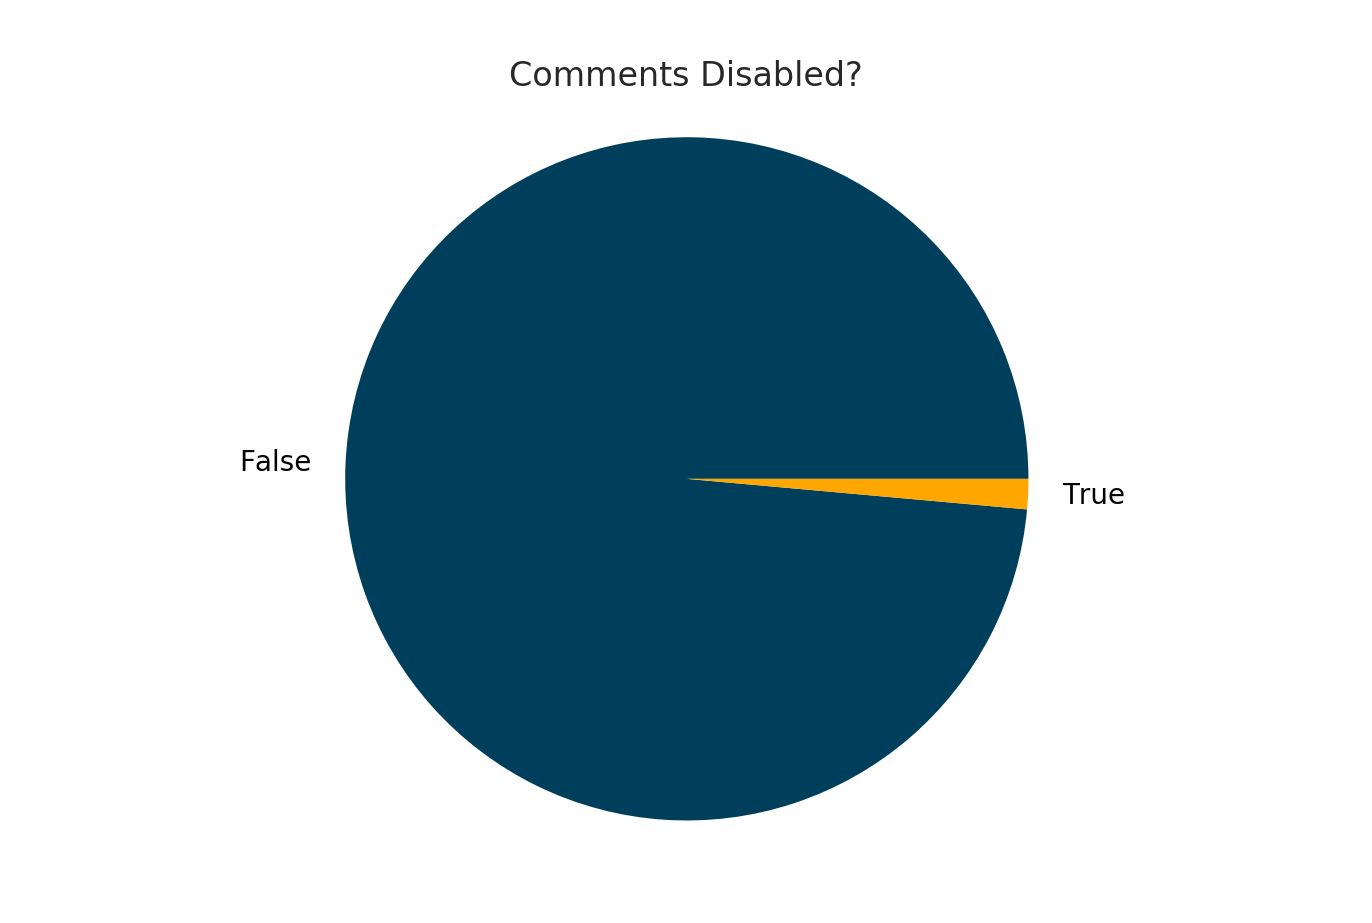

In [58]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[False], value_counts[True]], labels=['False', 'True'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Comments Disabled?');

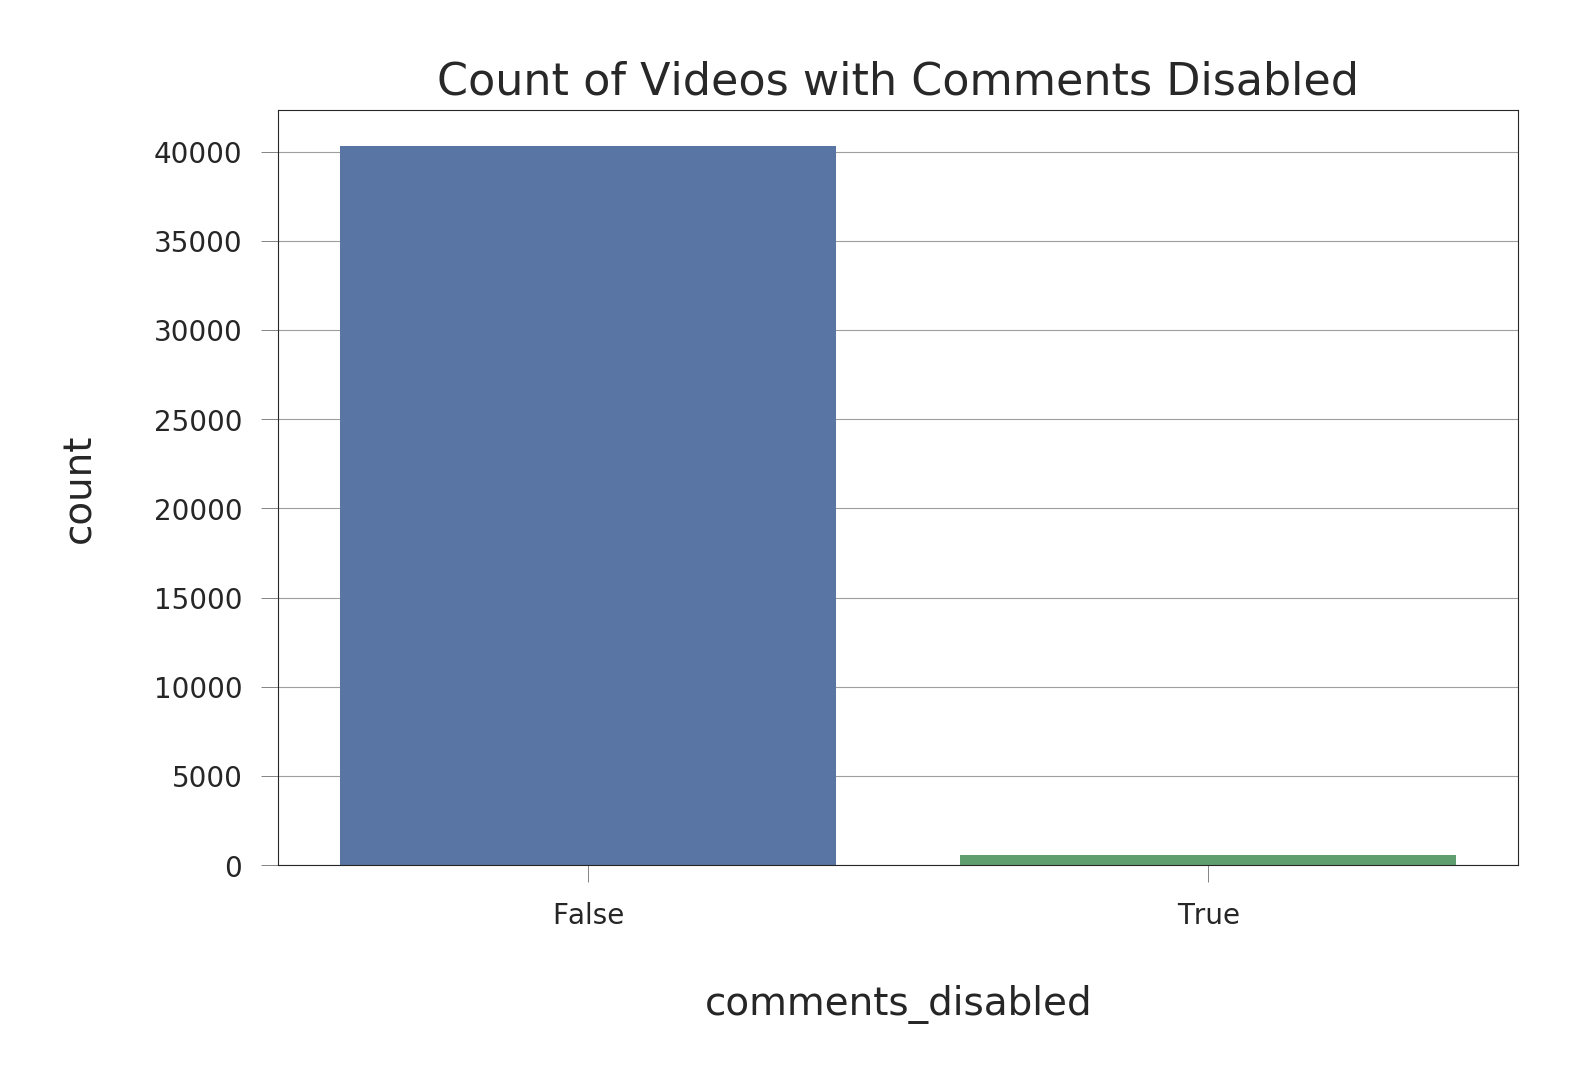

In [59]:
p1 = sns.countplot(x='comments_disabled', data=df)
p1.set_title("Count of Videos with Comments Disabled", fontsize=16);


In [60]:
df['ratings_disabled'].value_counts()

False    40602
True       279
Name: ratings_disabled, dtype: int64

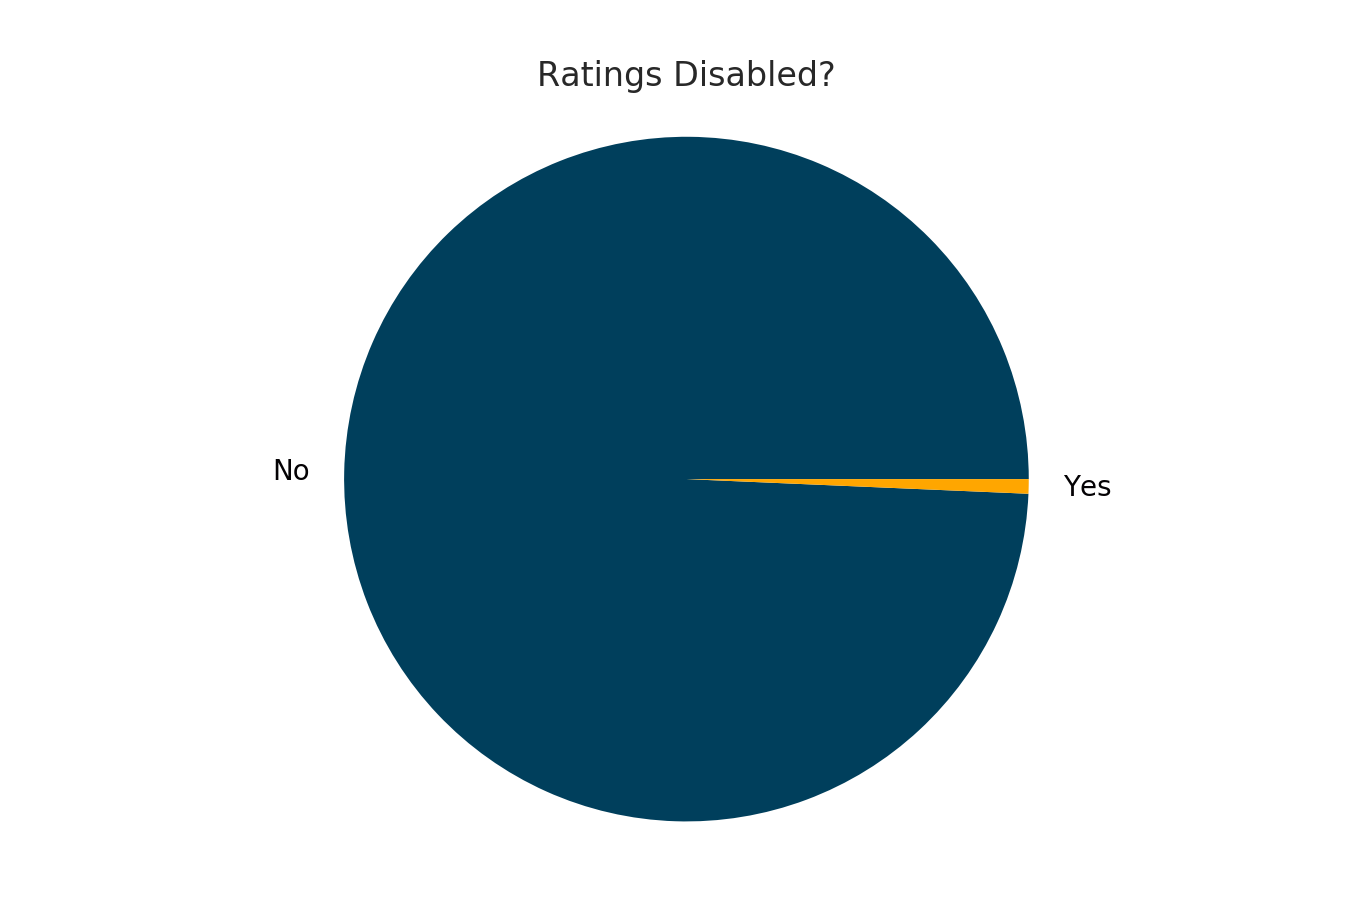

In [61]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Ratings Disabled?');

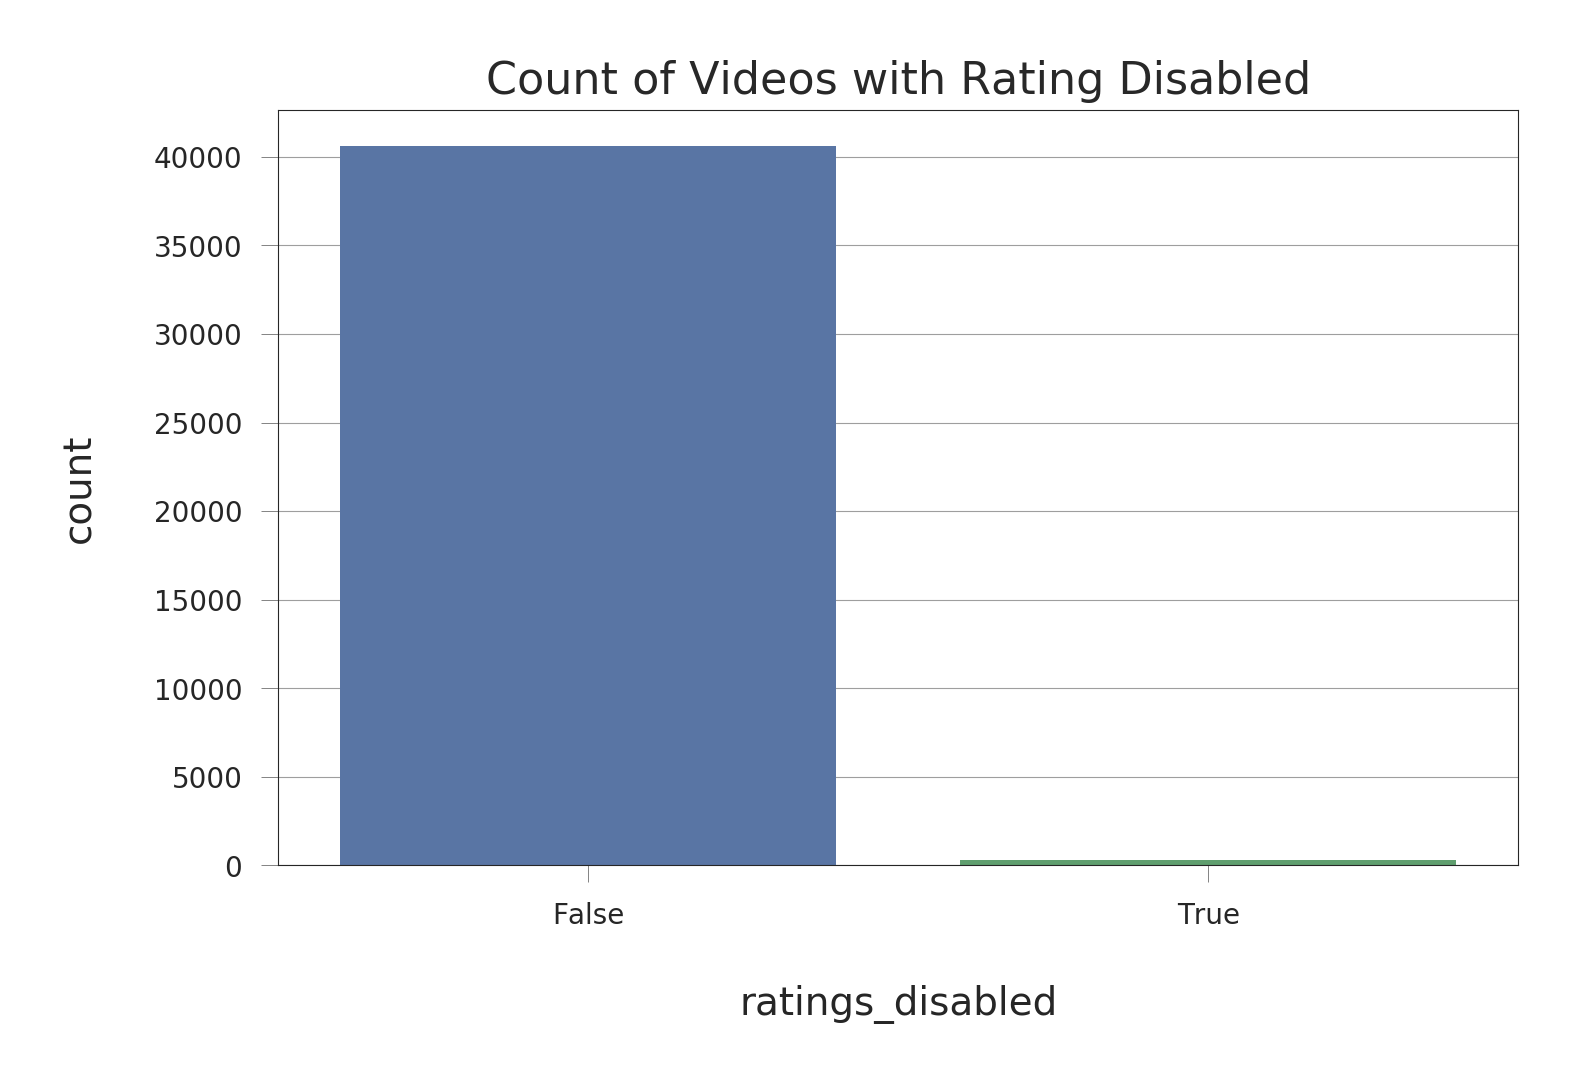

In [62]:
p2 = sns.countplot(x='ratings_disabled', data=df)
p2.set_title("Count of Videos with Rating Disabled", fontsize=16);

In [63]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

63

In [64]:
df['video_error_or_removed'].value_counts()

False    40854
True        27
Name: video_error_or_removed, dtype: int64

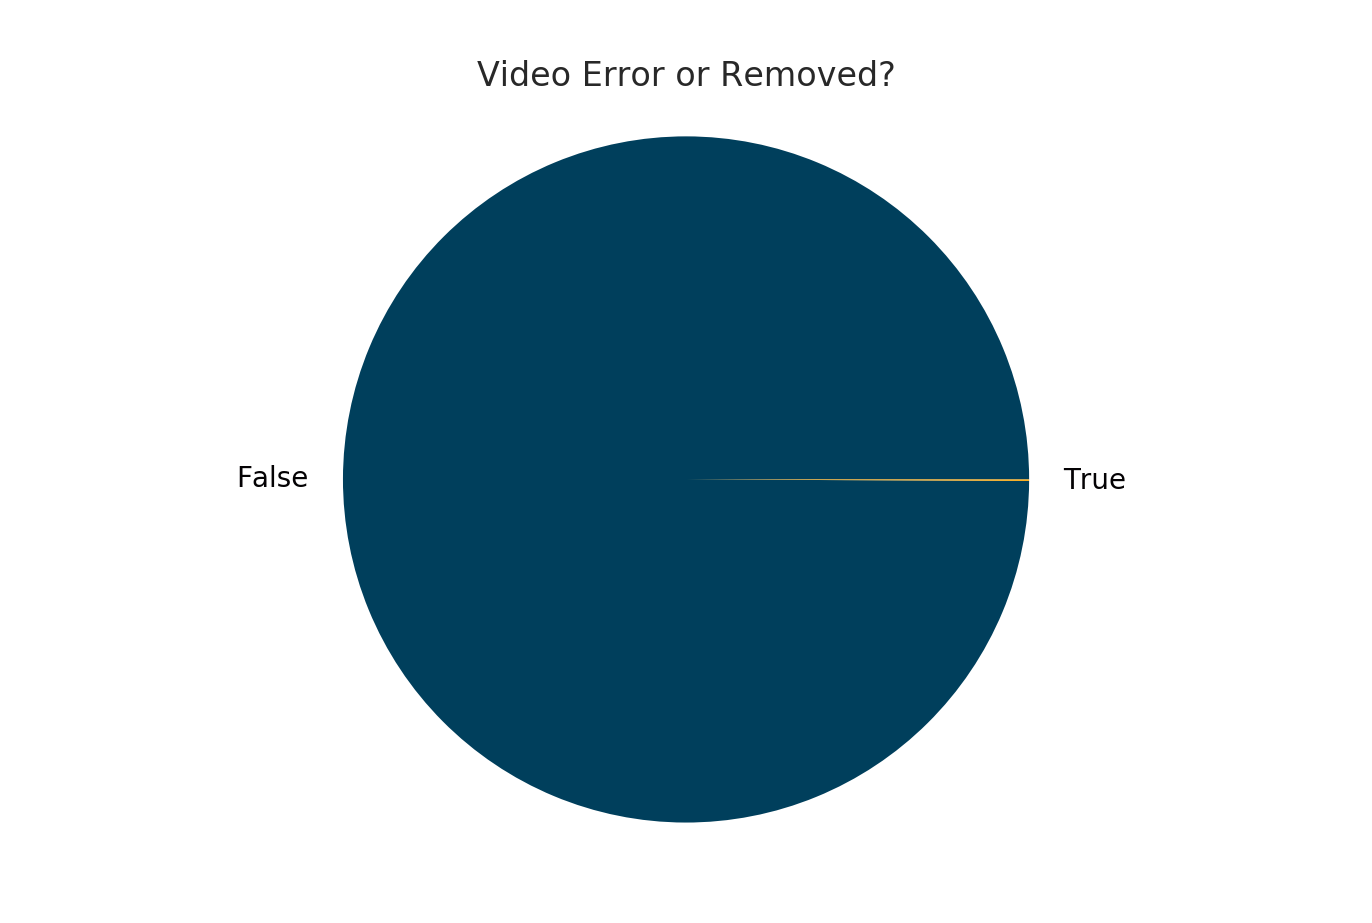

In [65]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['False', 'True'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Video Error or Removed?');

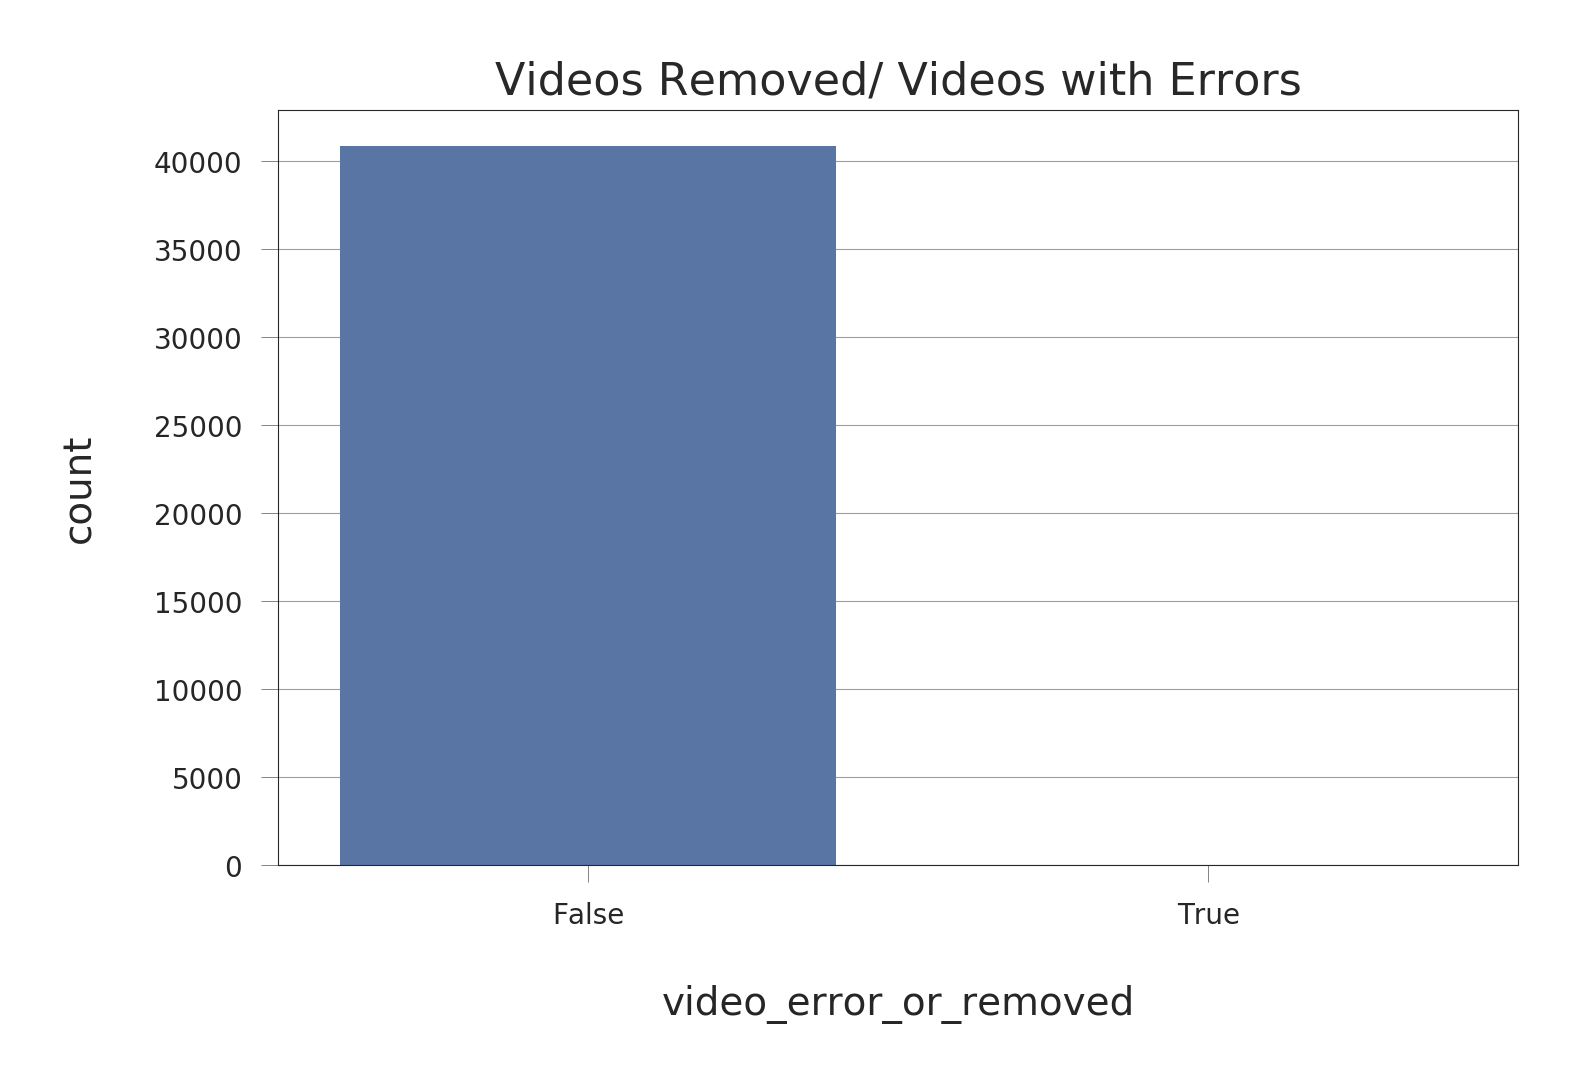

In [66]:
p3 = sns.countplot(x='video_error_or_removed', data=df)
p3.set_title("Videos Removed/ Videos with Errors", fontsize=16);


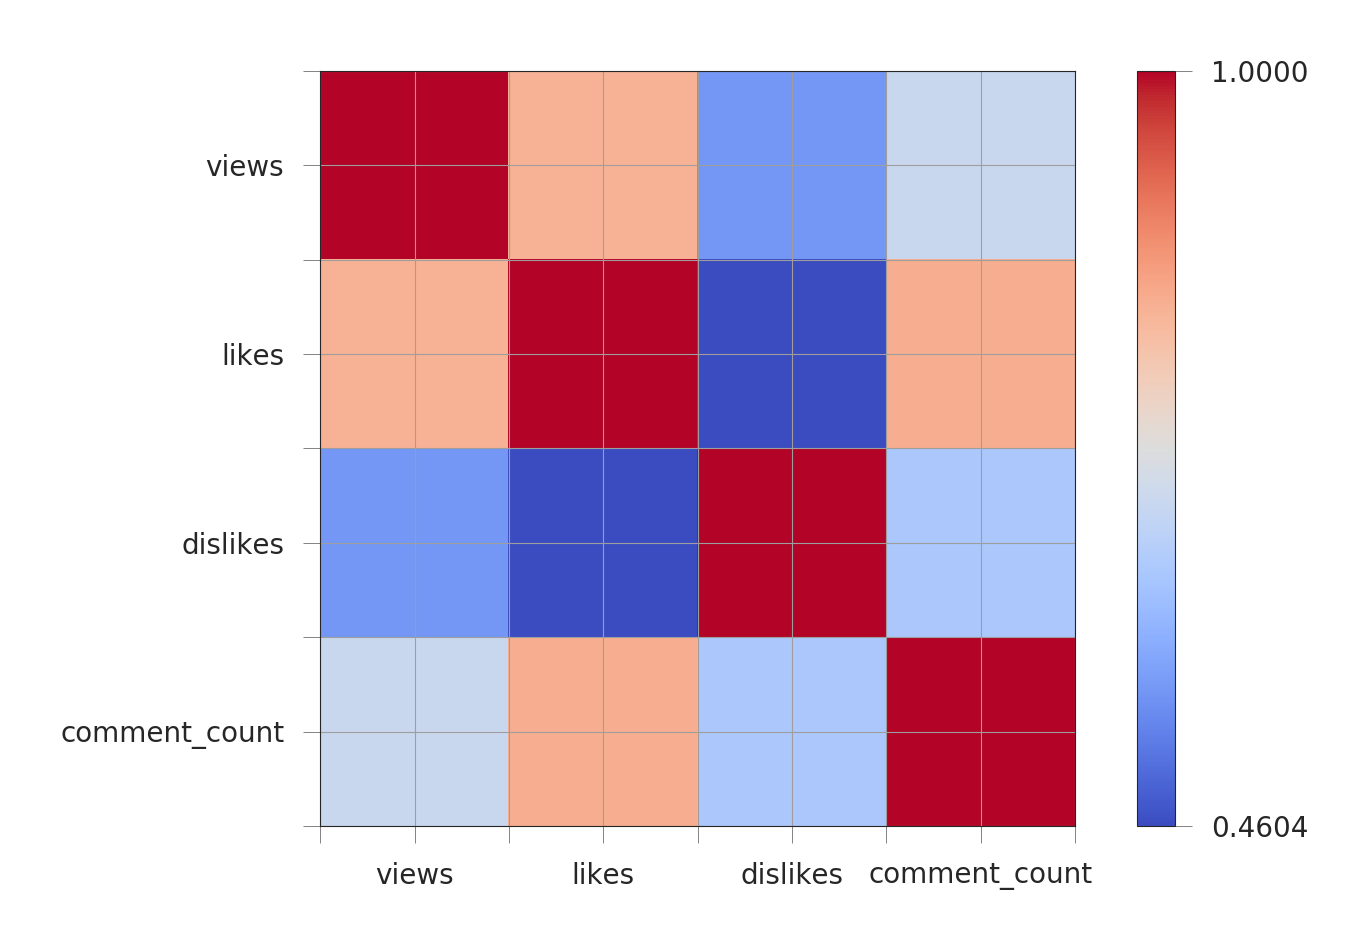

In [67]:
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)

# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in keep_columns:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show();

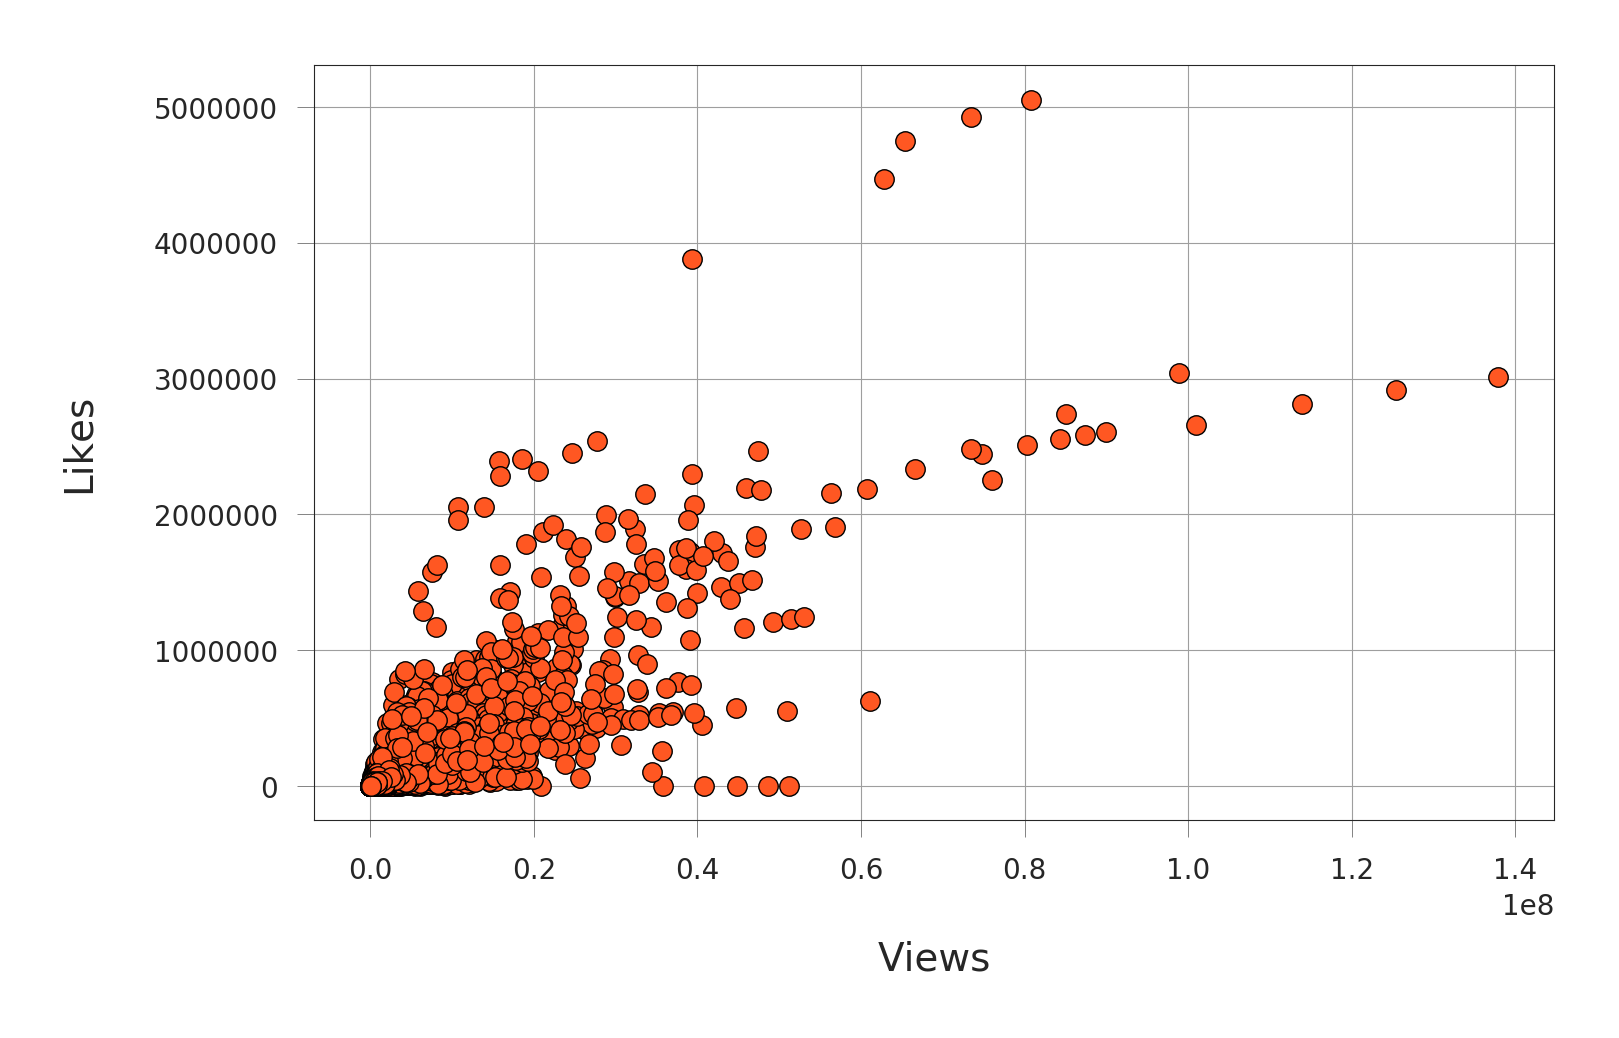

In [68]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Likes");

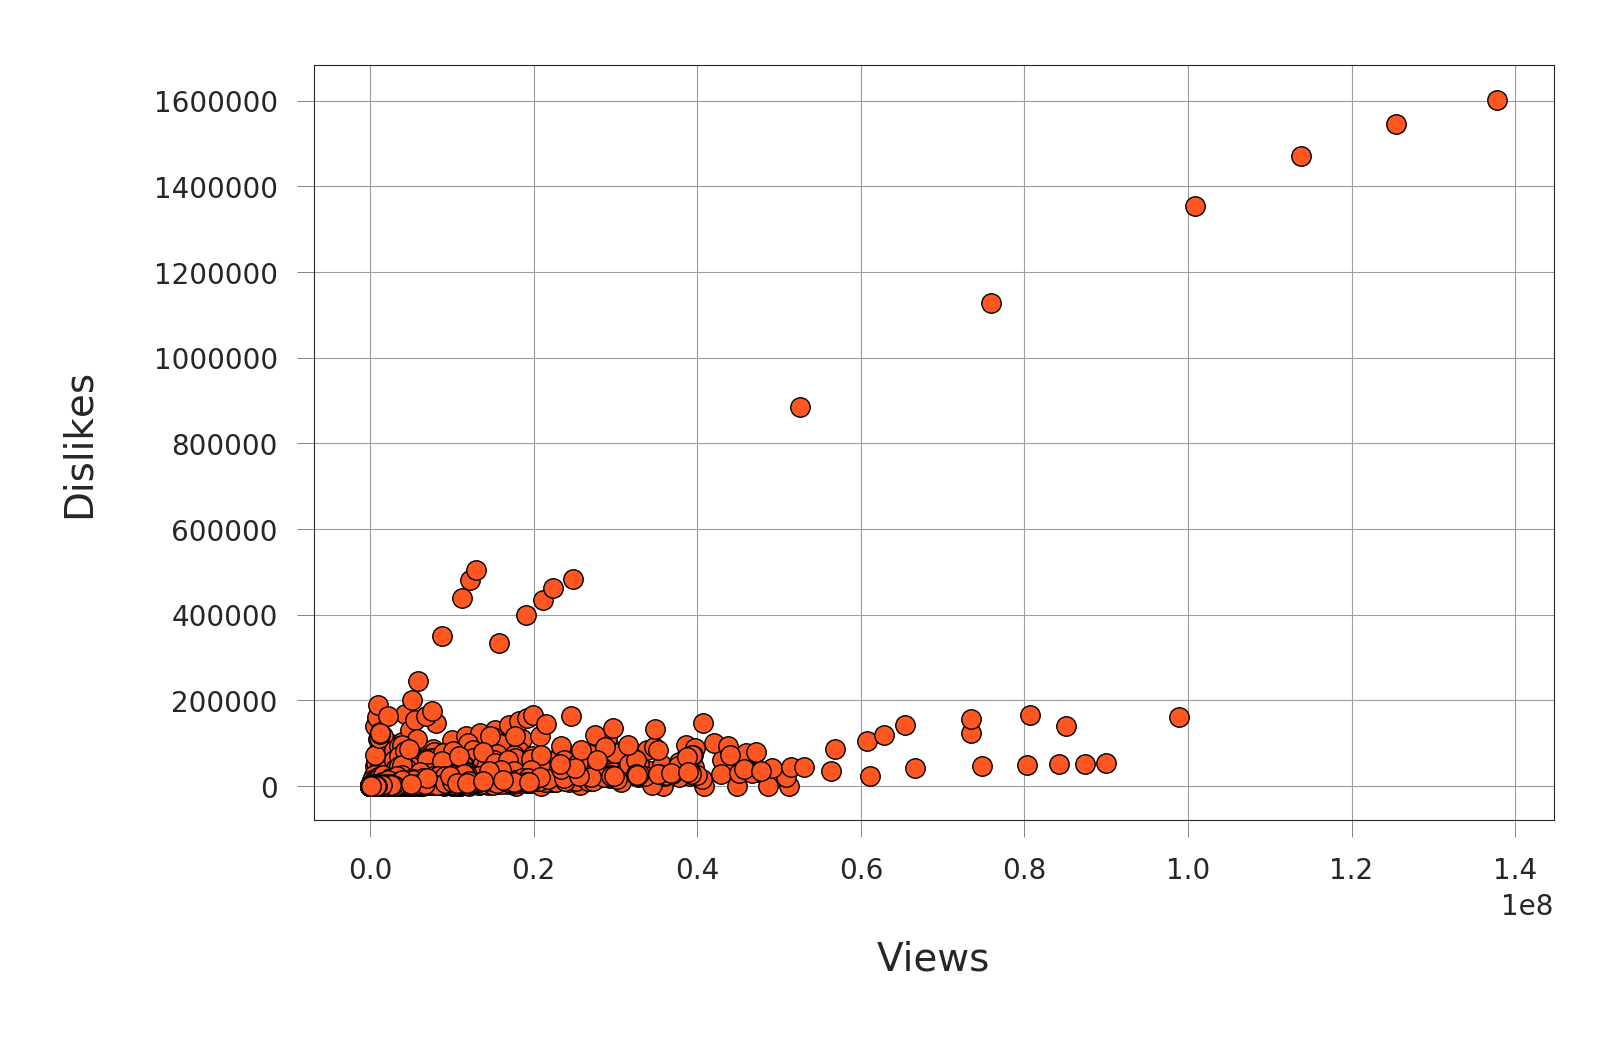

In [69]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Dislikes");

In [70]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

df['like_rate'] =  df['likes'] / df['views'] * 100
df['dislike_rate'] =  df['dislikes'] / df['views'] * 100
df['comment_rate'] =  df['comment_count'] / df['views'] * 100


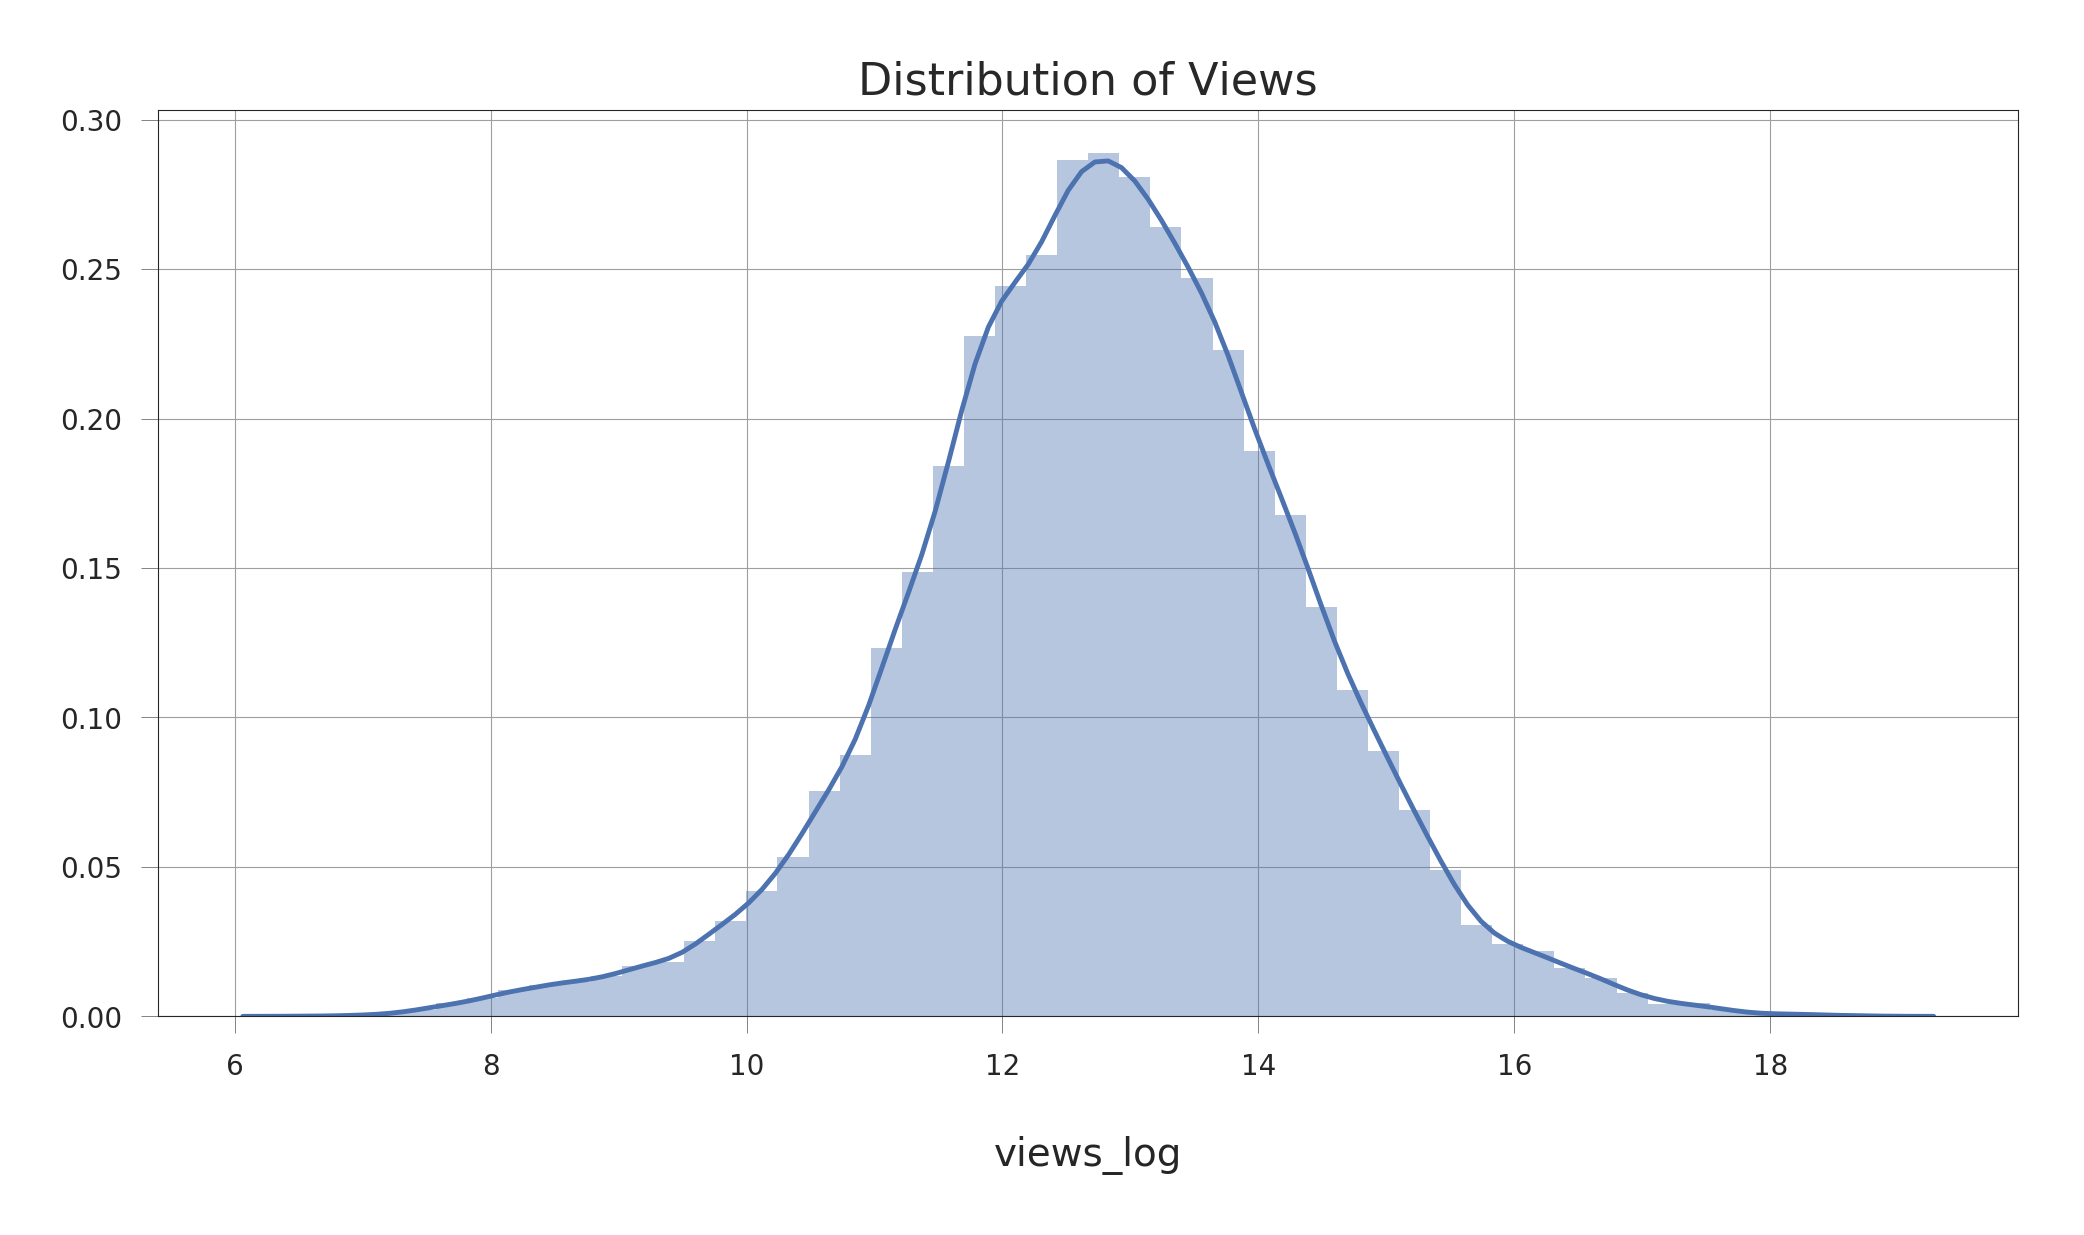

In [71]:
plt.figure(figsize = (12,6))
l1 = sns.distplot(df['views_log'])
l1.set_title("Distribution of Views", fontsize=16);

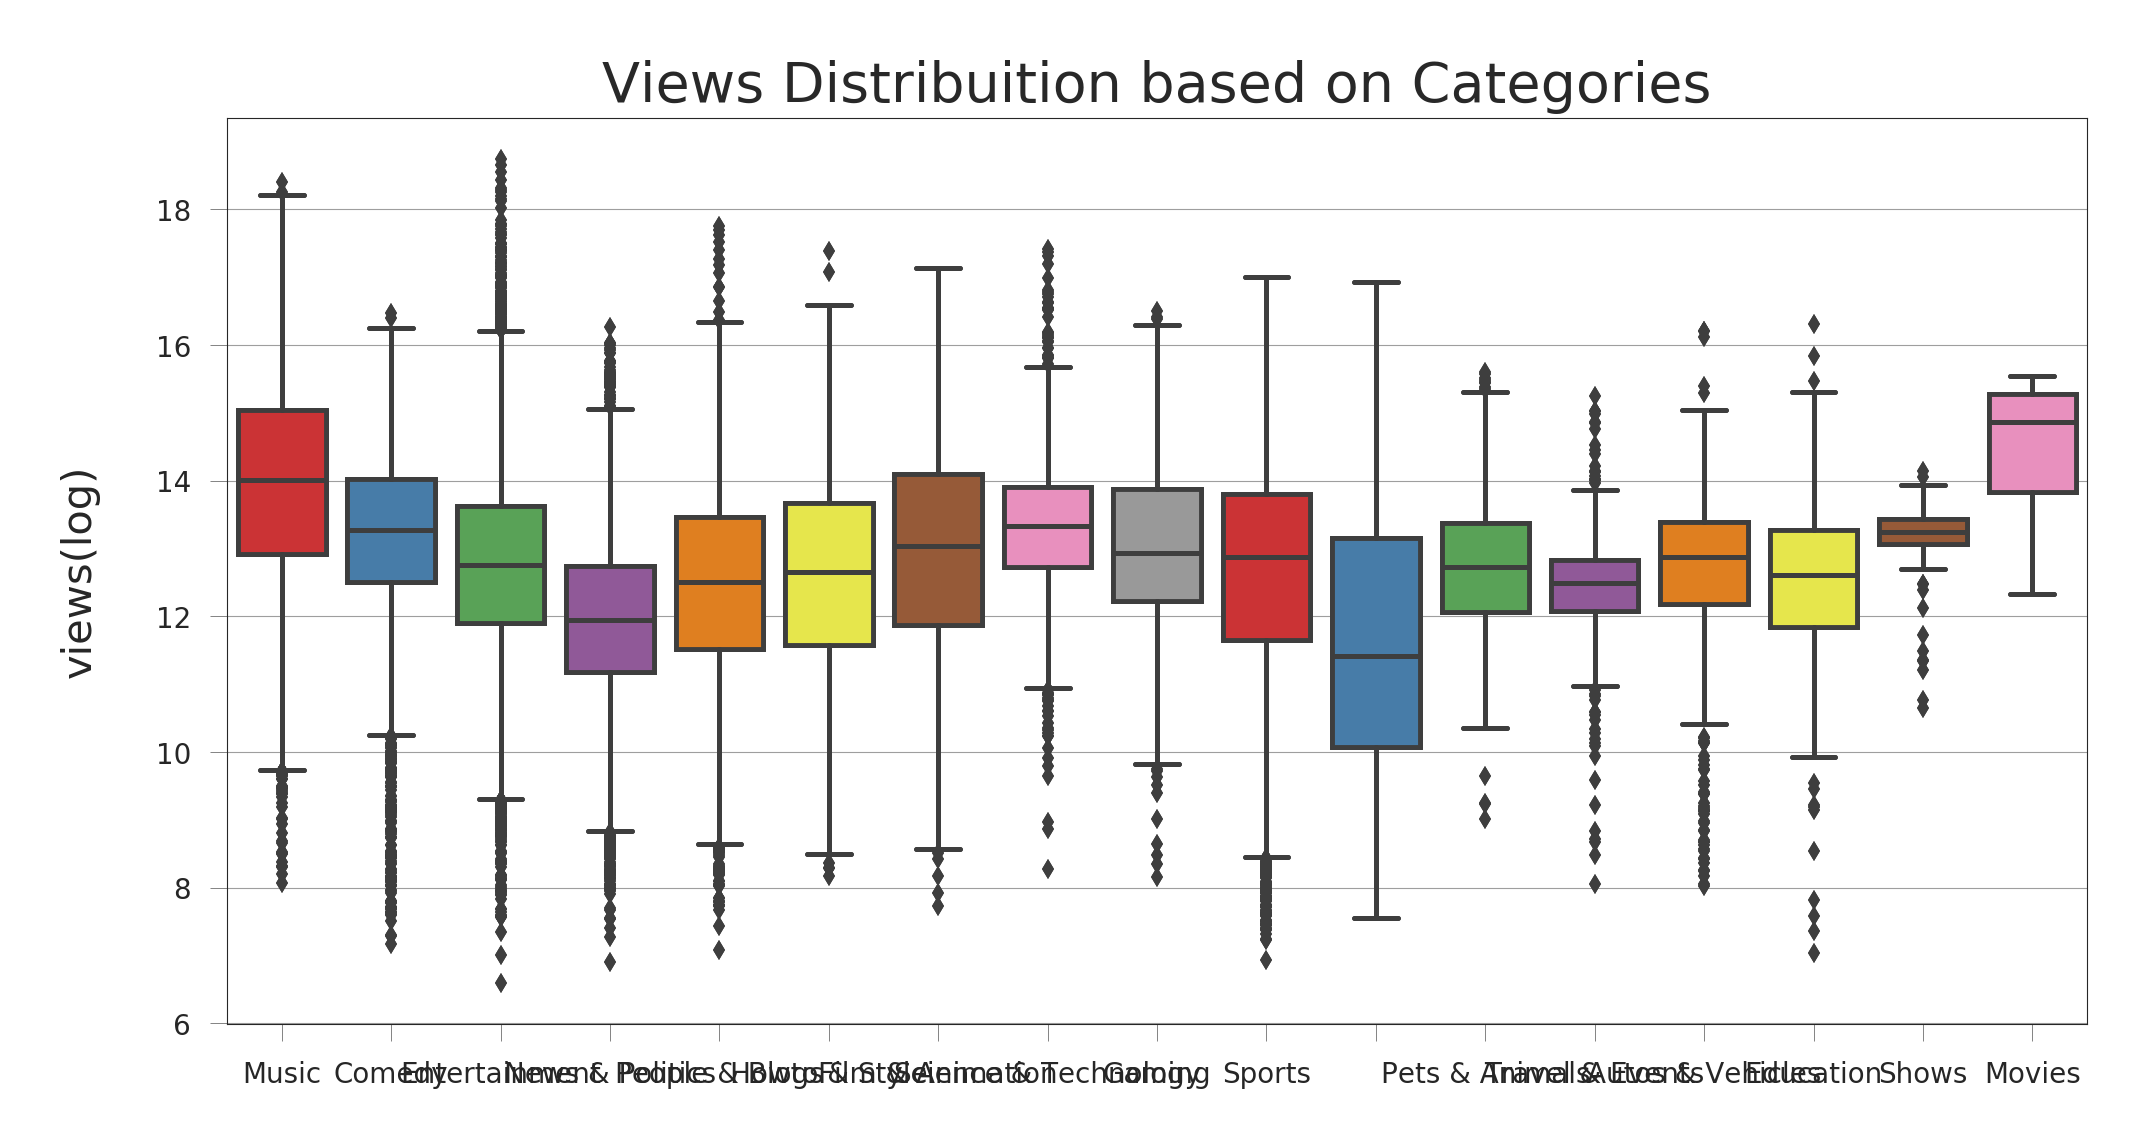

In [72]:
plt.figure(figsize = (12,6))
g1 = sns.boxplot(x='category_name', y='views_log', data=df, palette="Set1")
g1 = sns.boxplot(x='category_name', y='views_log', data=df, palette="Set1")
g1.set_title("Views Distribuition based on Categories", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("views(log)", fontsize=15);

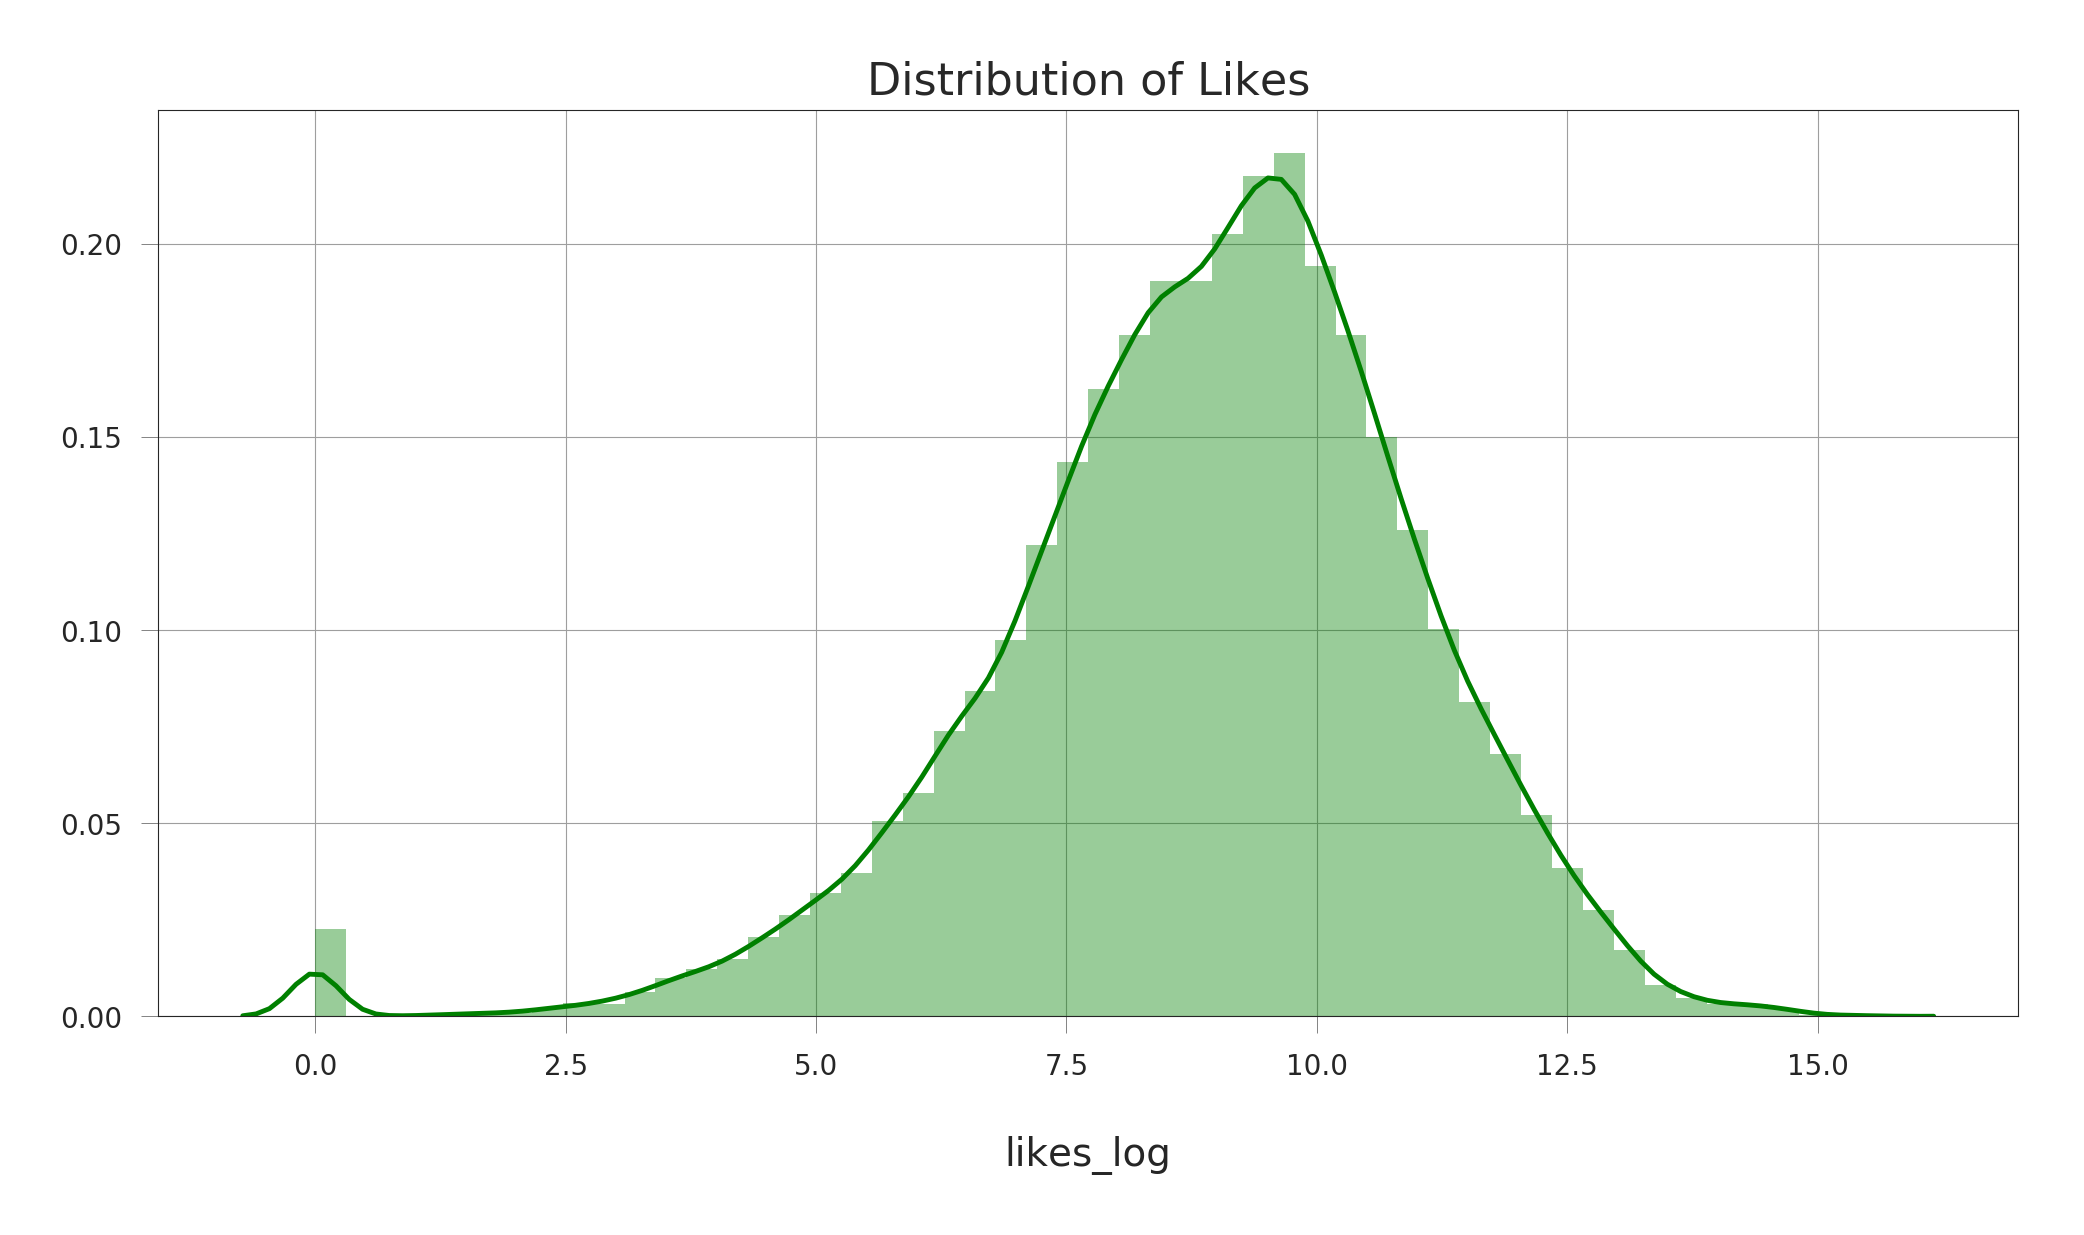

In [73]:
plt.figure(figsize = (12,6))
l2 = sns.distplot(df['likes_log'],color='green')
l2.set_title('Distribution of Likes', fontsize=16);

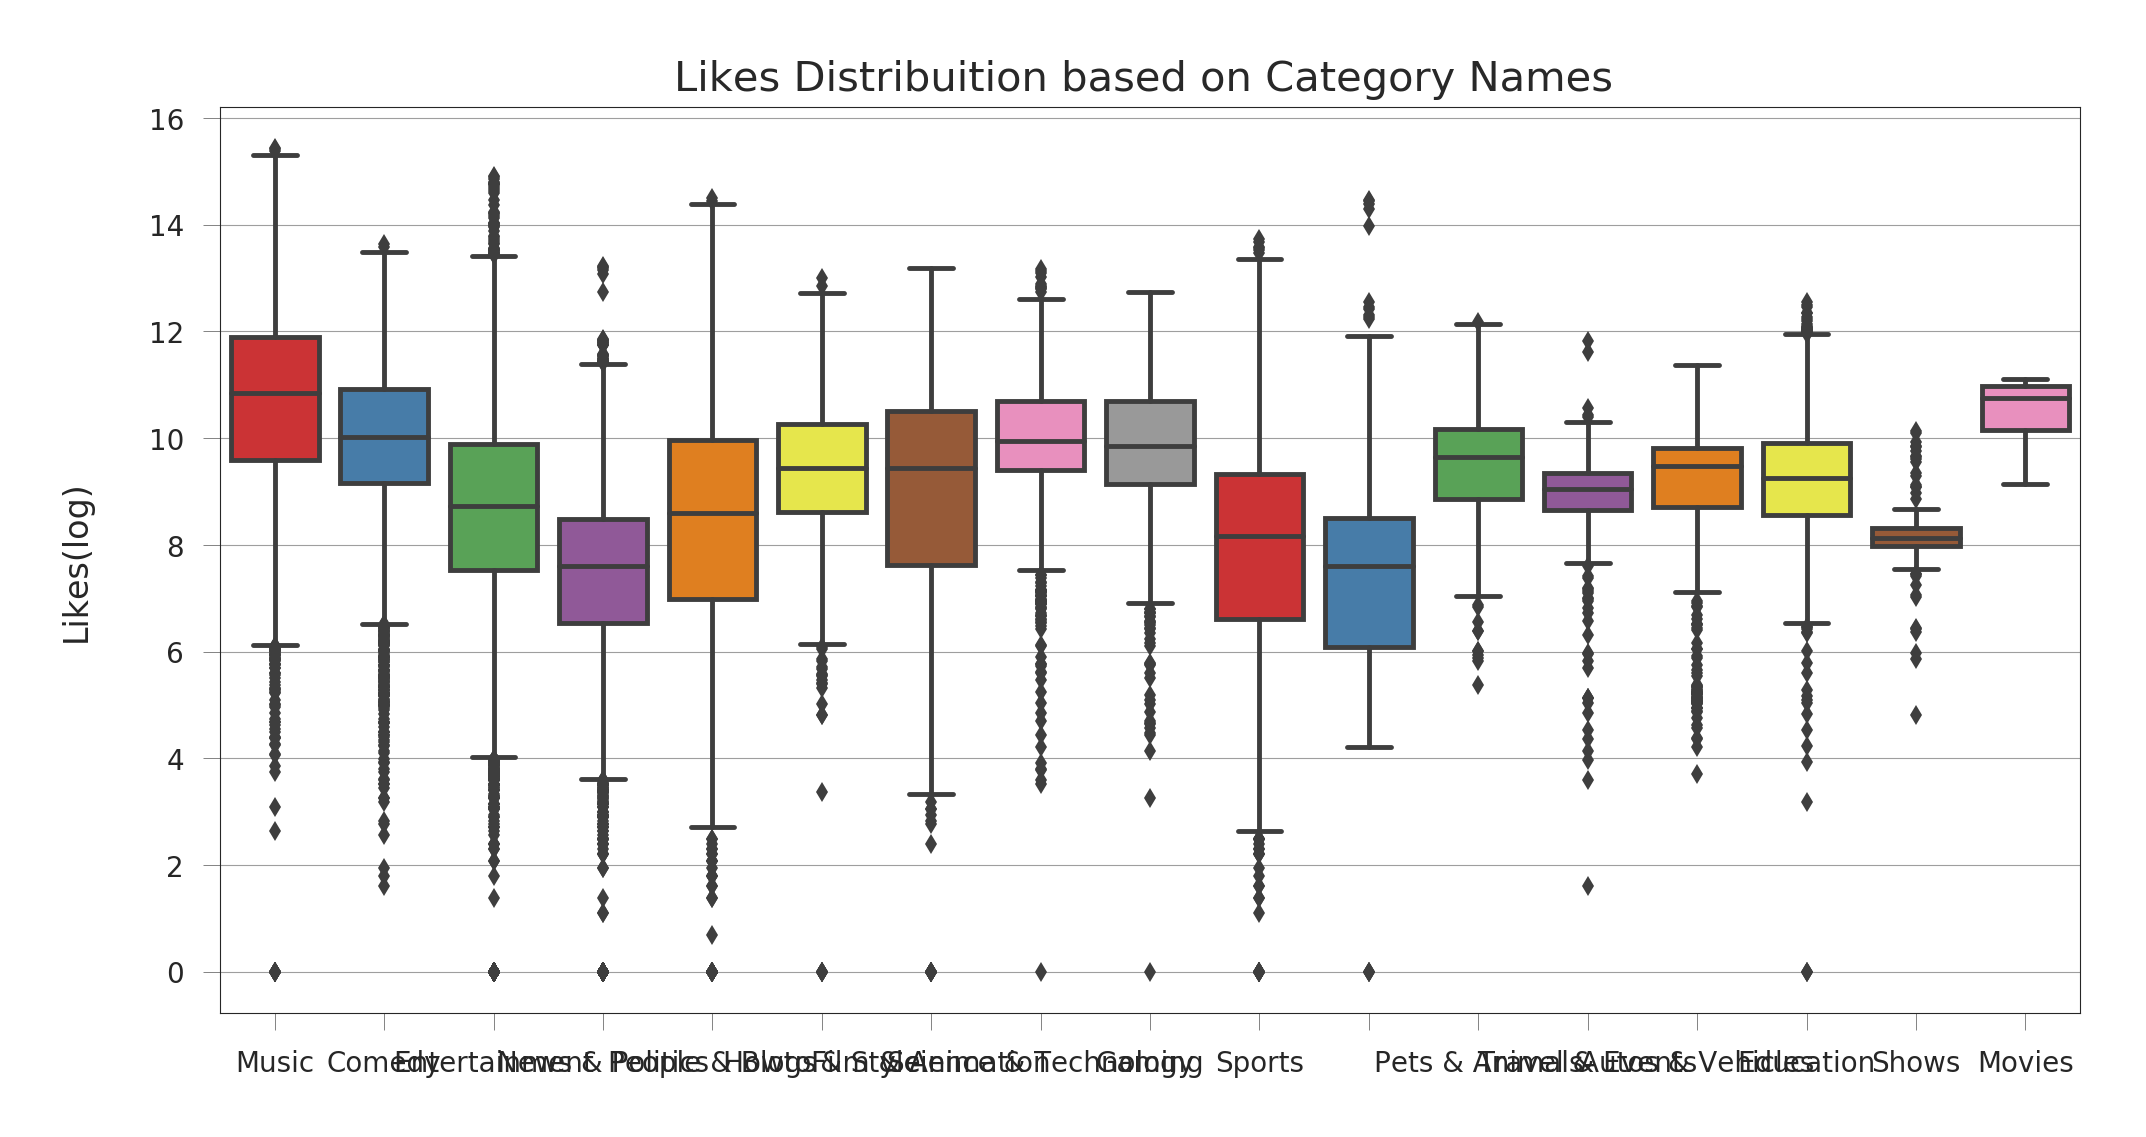

In [74]:
plt.figure(figsize = (12,6))
g2 = sns.boxplot(x='category_name', y='likes_log', data=df, palette="Set1")
g2.set_title("Likes Distribuition based on Category Names ", fontsize=15)
g2.set_xlabel("", fontsize=12)
g2.set_ylabel("Likes(log)", fontsize=12)
plt.show();

In [75]:
df['category_name']

video_id
n1WpP7iowLc                   Music
0dBIkQ4Mz1M                  Comedy
5qpjK5DgCt4                  Comedy
d380meD0W0M           Entertainment
2Vv-BfVoq4g                   Music
0yIWz1XEeyc         News & Politics
_uM5kFfkhB8                  Comedy
2kyS6SvSYSE          People & Blogs
JzCsM1vtn78           Entertainment
43sm-QwLcx4          People & Blogs
H1KBHFXm2Bg                   Music
U3xLOo-CNwo           Howto & Style
FyZMnhUtLfE        Film & Animation
7MxiQ4v0EnE                   Music
LUzsOyWp9lw           Entertainment
AS9-ITLhQxo          People & Blogs
gifPYwArCVQ                  Comedy
8NHA23f7LvU           Entertainment
fy-CuCzaPp8        Film & Animation
kzwfHumJyYc        Film & Animation
nc99ccSXST0    Science & Technology
puqaWrEC7tY           Entertainment
6H3wVsceoS0          People & Blogs
PRlmRnU9qts          People & Blogs
ZhhXLMbZ1rQ           Entertainment
wuf2KinLxZ8           Entertainment
aVTAU_4i9AY           Entertainment
7779JdxVAg0        

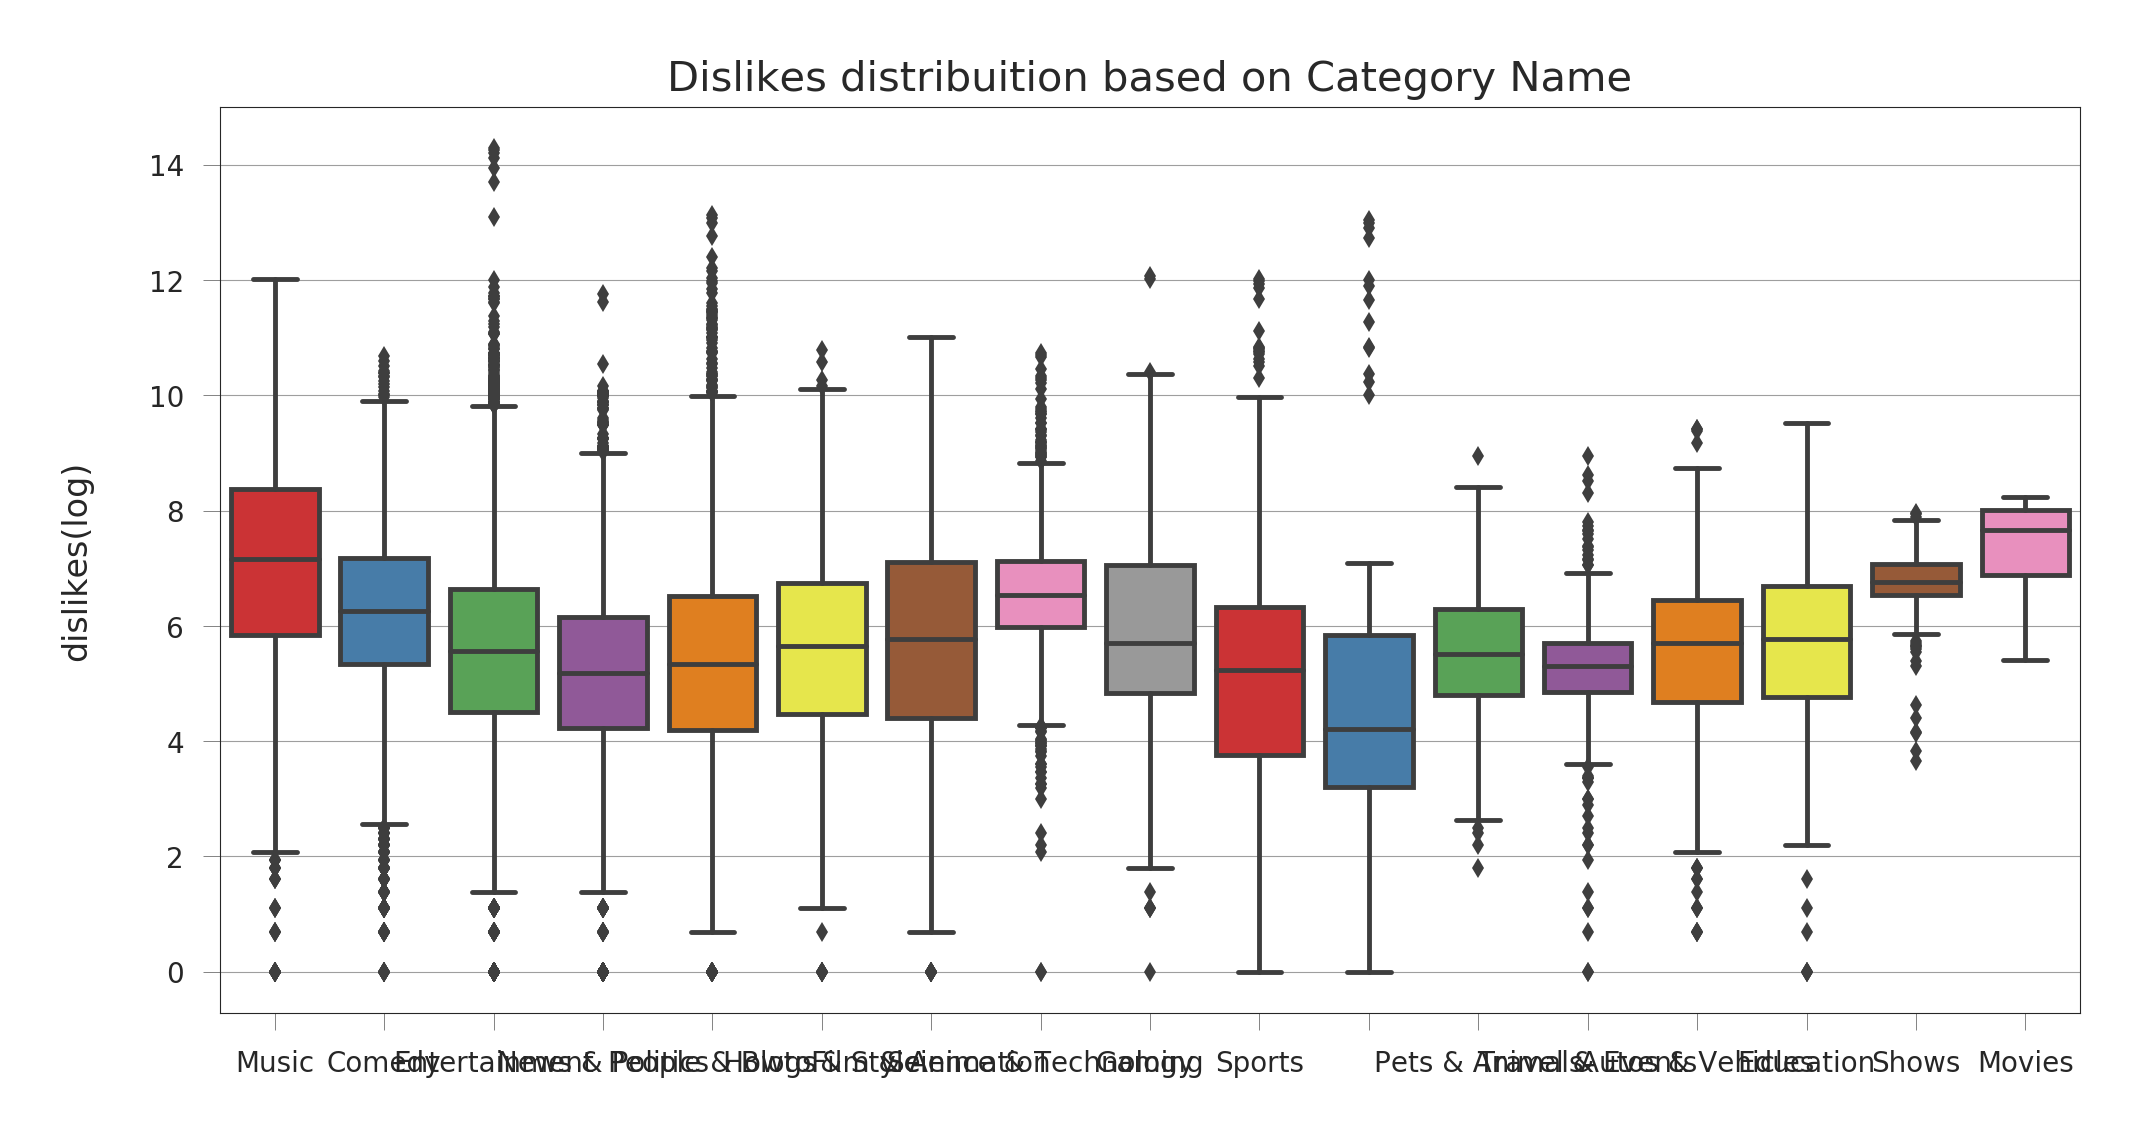

In [76]:
plt.figure(figsize = (12,6))
g3 = sns.boxplot(x='category_name', y='dislikes_log', data=df, palette="Set1")
g3.set_title("Dislikes distribuition based on Category Name", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("dislikes(log)", fontsize=12)
plt.show();

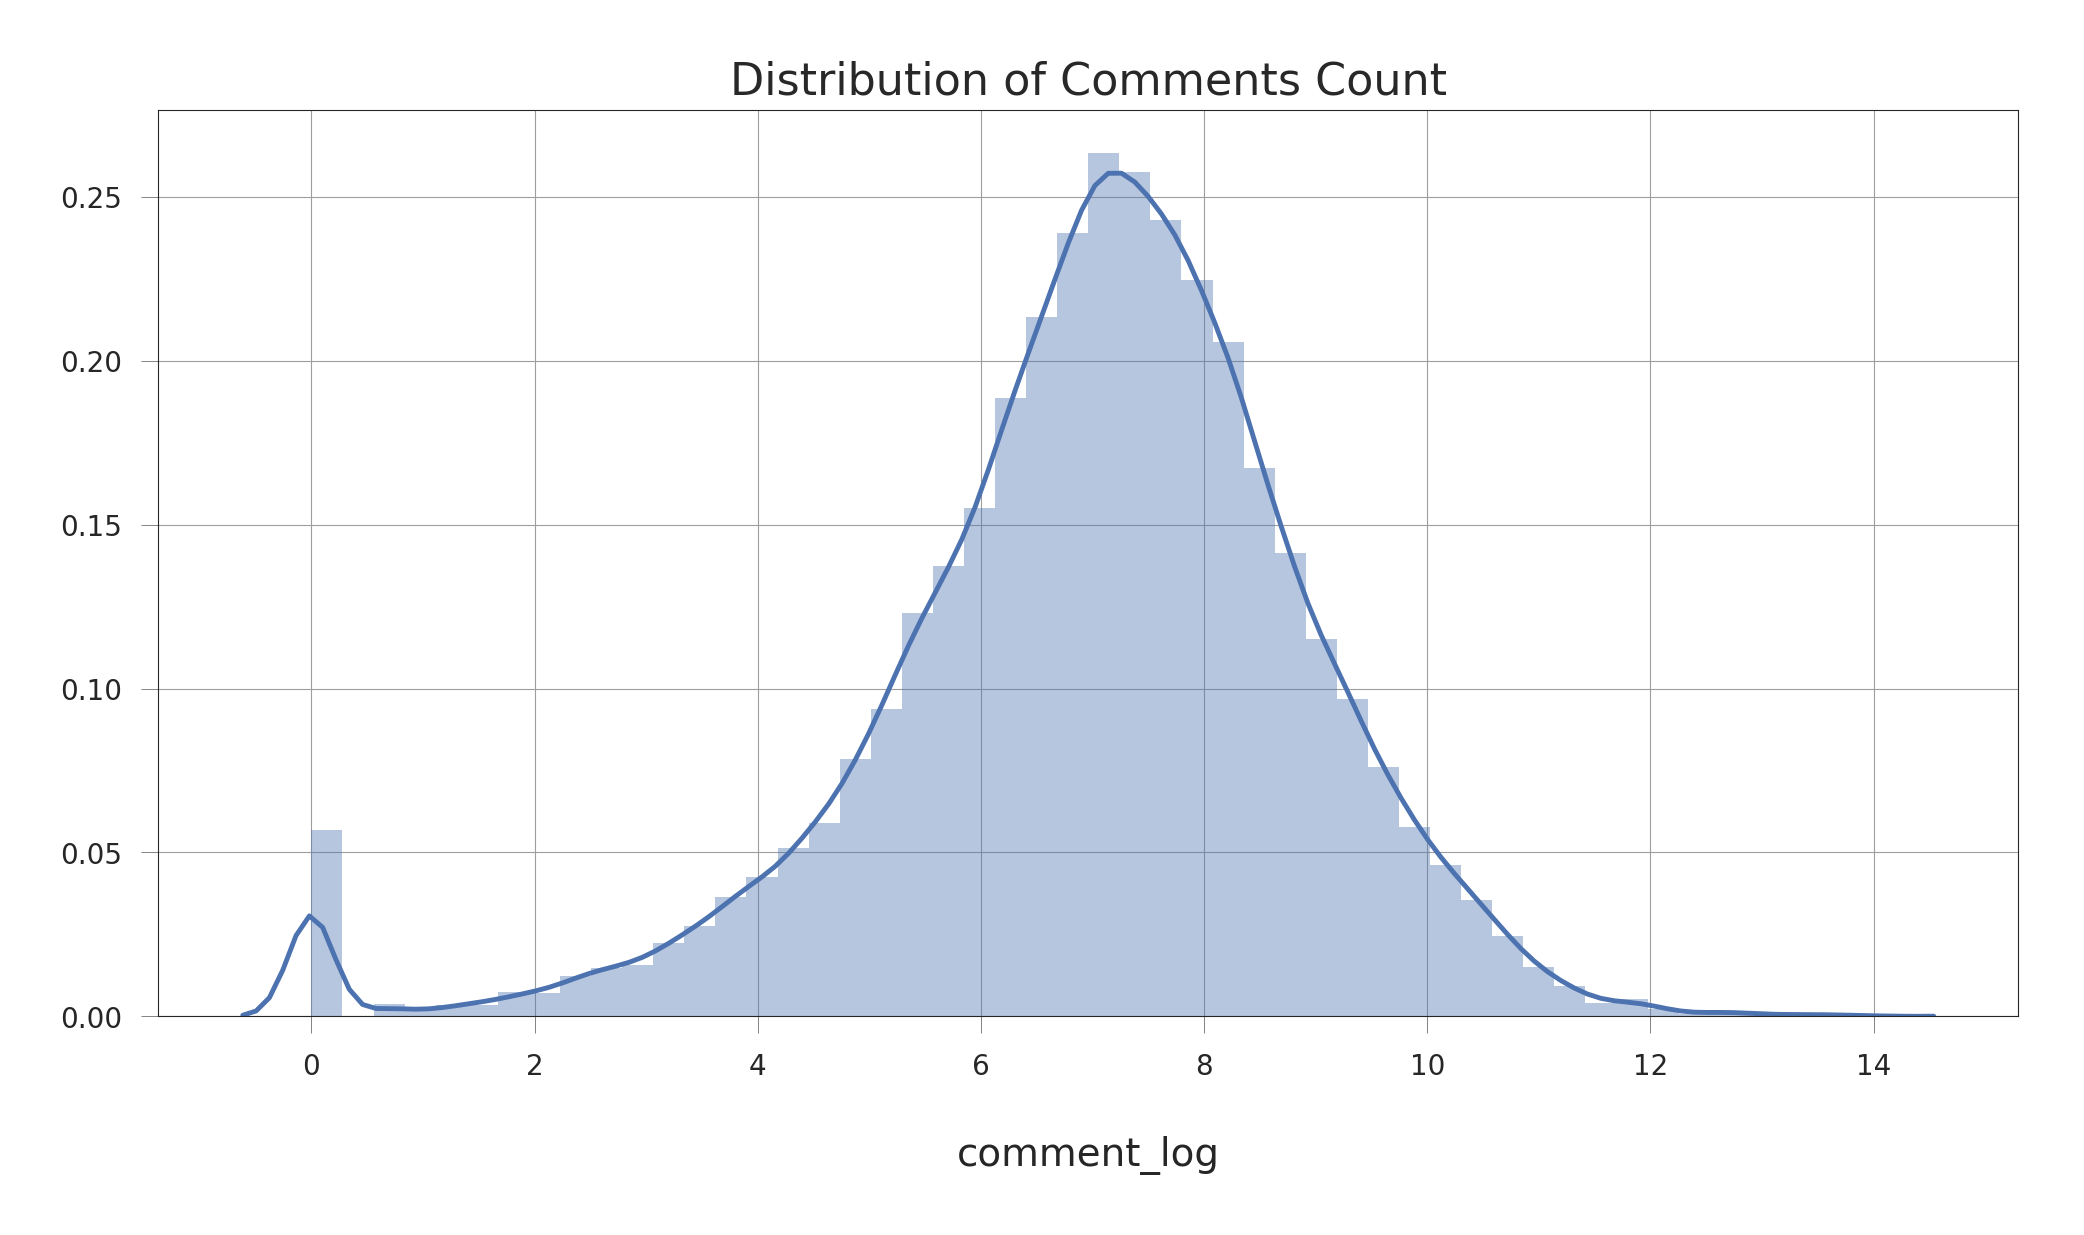

In [77]:
plt.figure(figsize = (12,6))
l4 = sns.distplot(df['comment_log'])
l4.set_title("Distribution of Comments Count", fontsize=16);

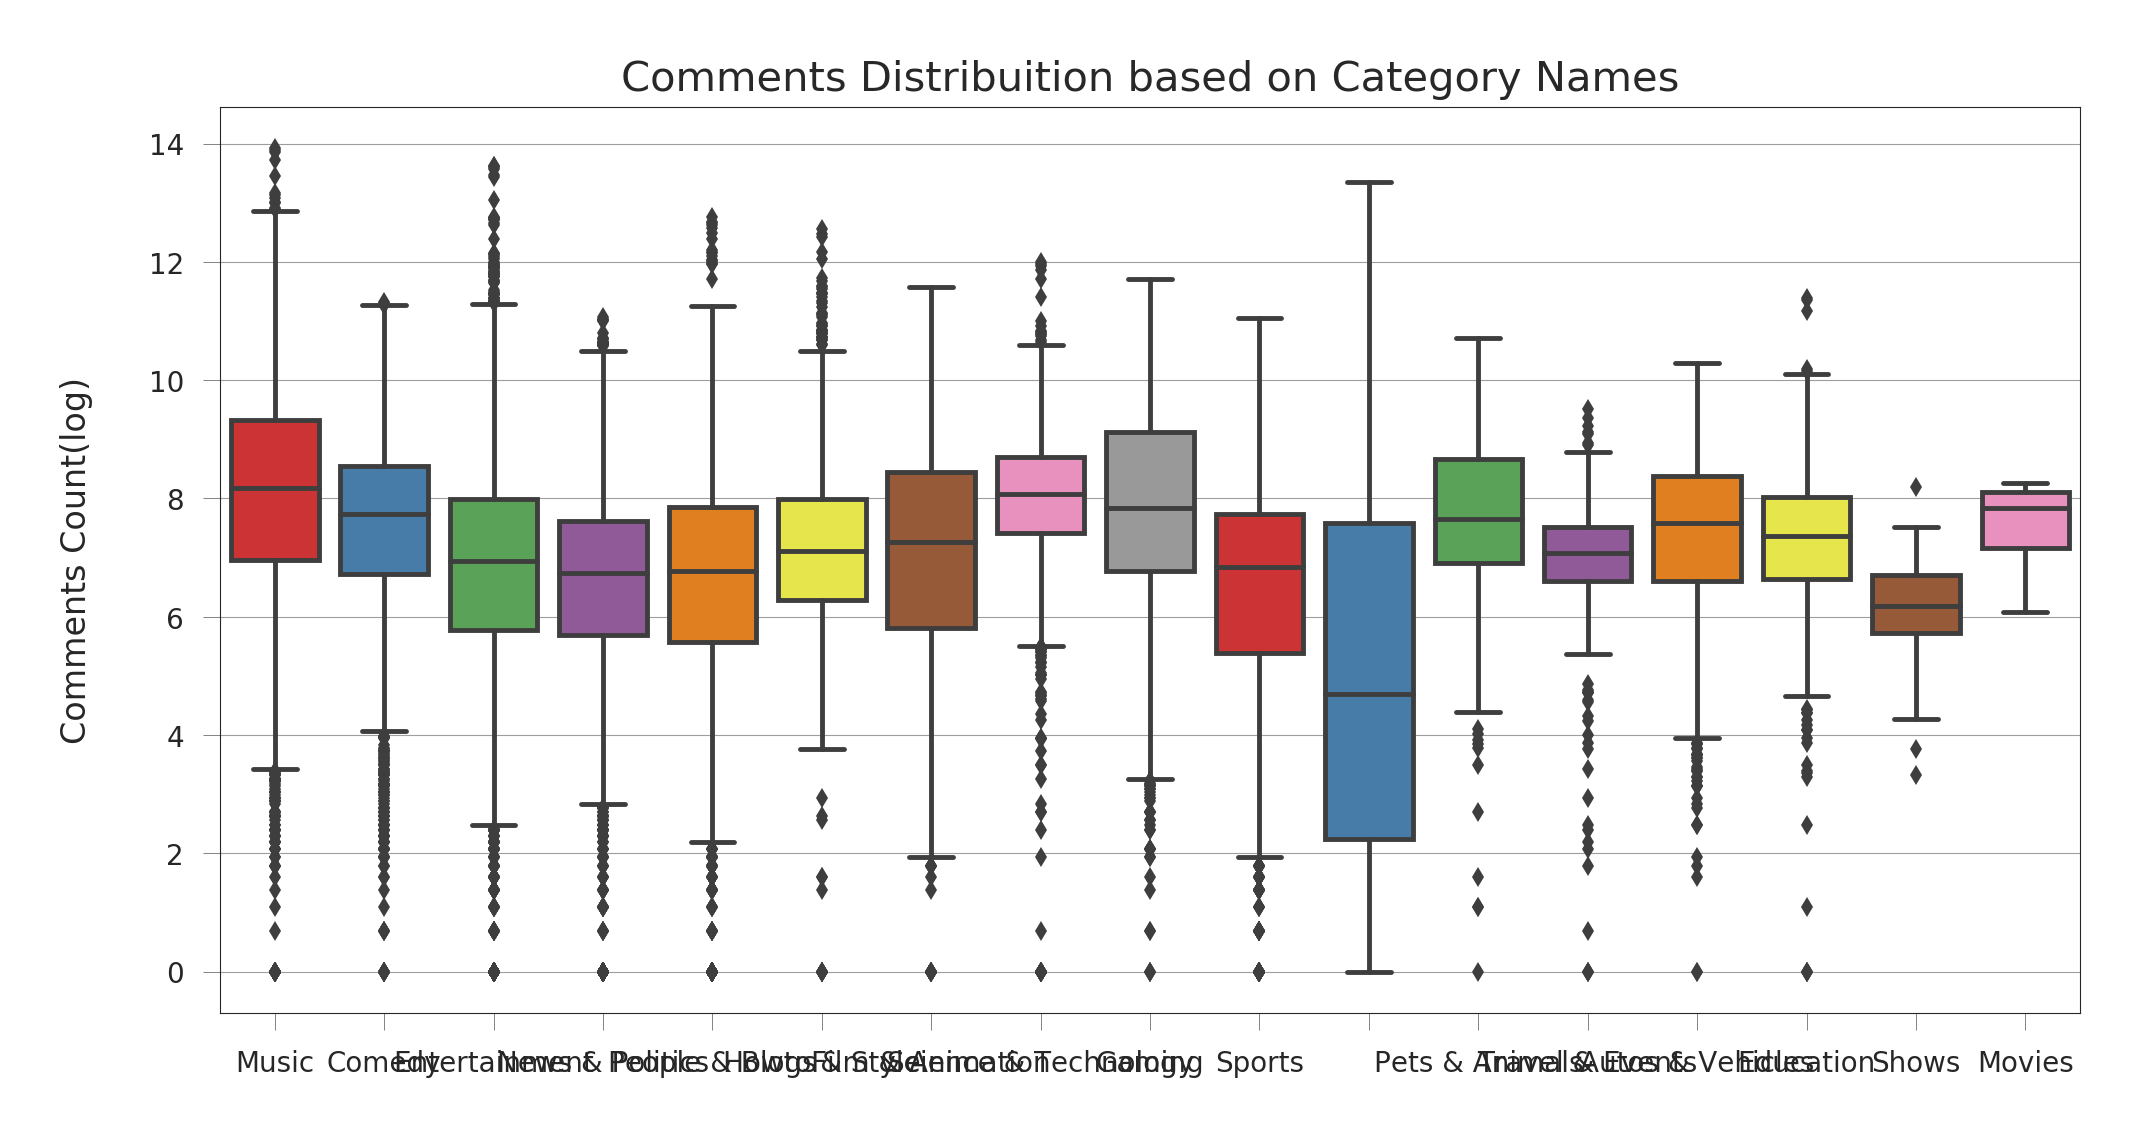

In [78]:
plt.figure(figsize = (12,6))
g4 = sns.boxplot(x='category_name', y='comment_log', data=df, palette="Set1")
g4.set_title("Comments Distribuition based on Category Names", fontsize=15)
g4.set_xlabel("", fontsize=12)
g4.set_ylabel("Comments Count(log)", fontsize=12)
plt.show();

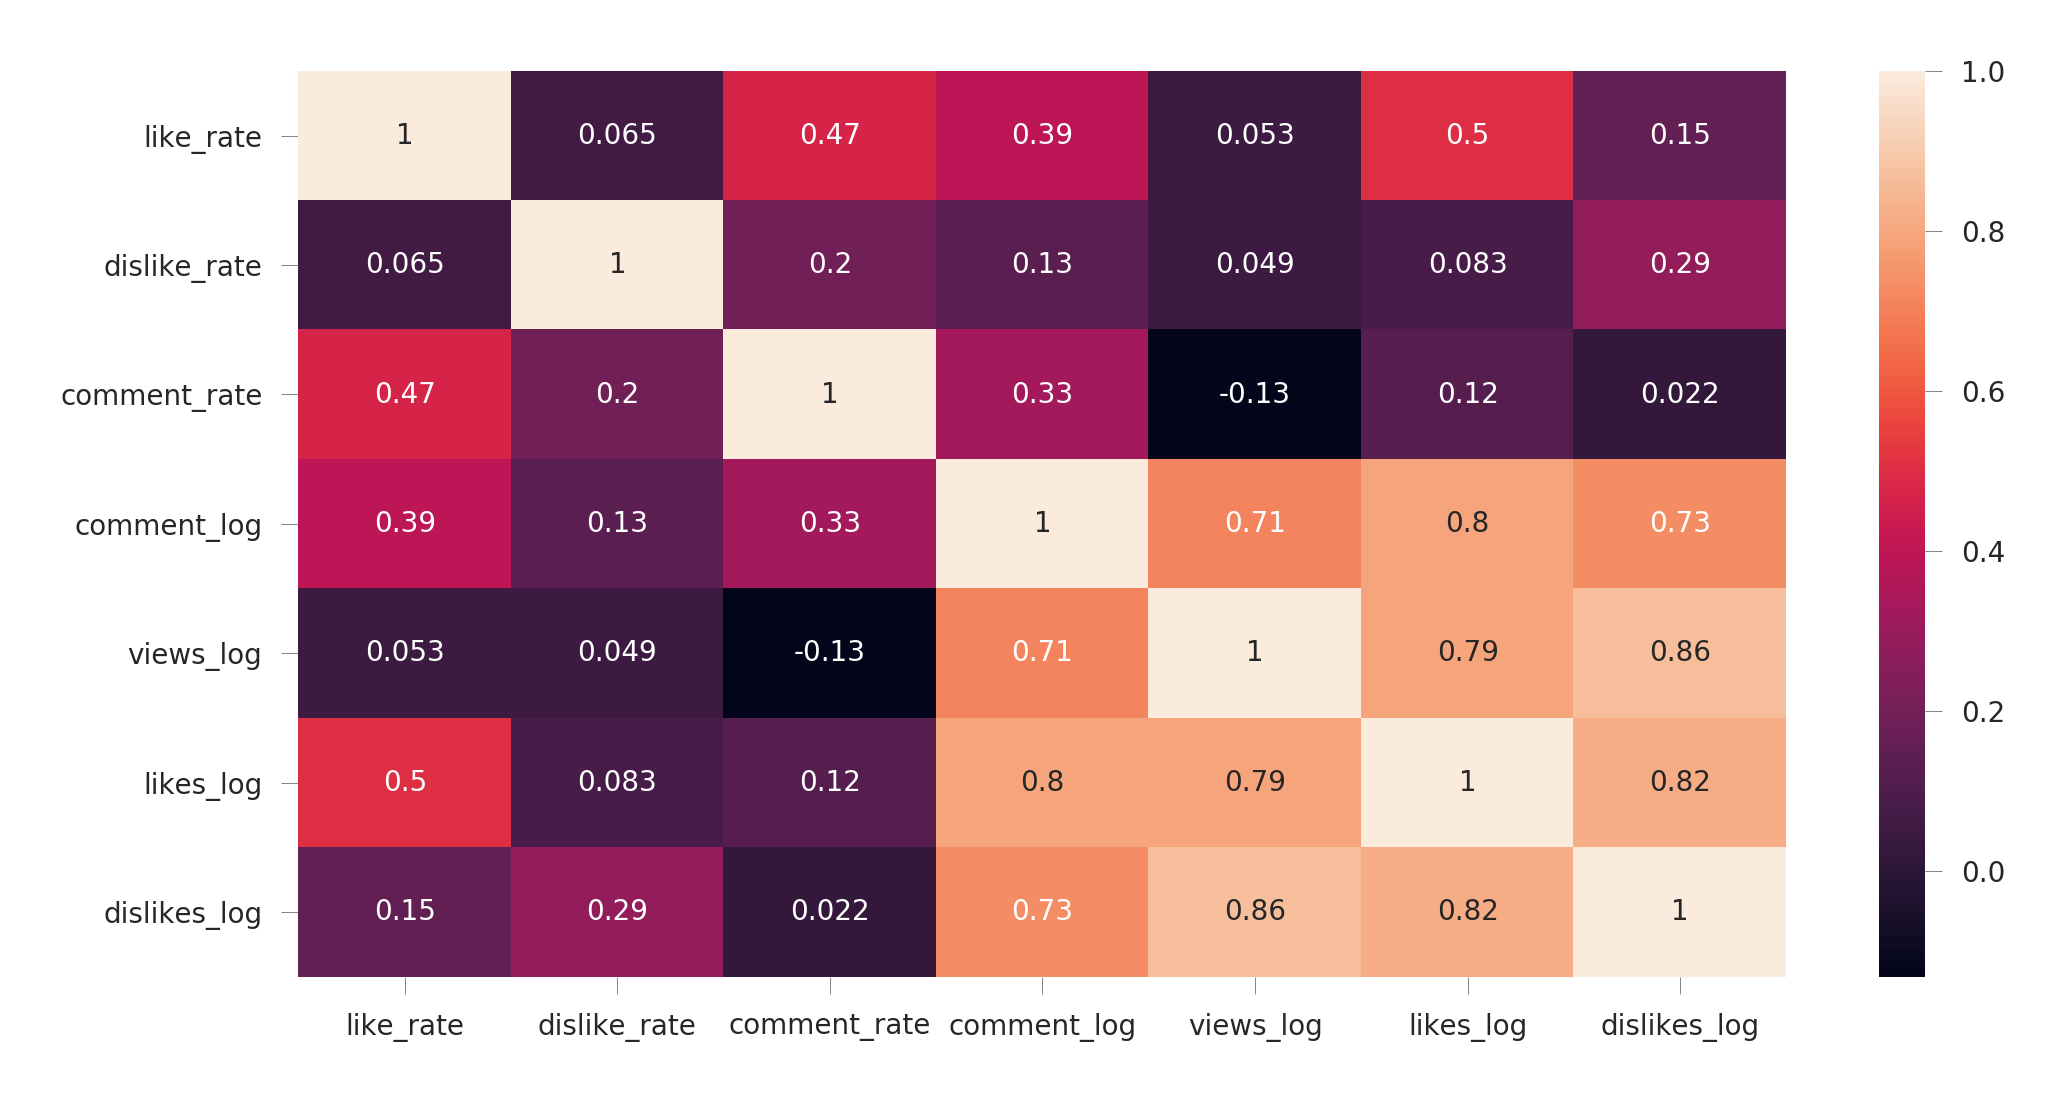

In [79]:
plt.figure(figsize = (12,6))

sns.heatmap(df[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log','views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)
plt.show();

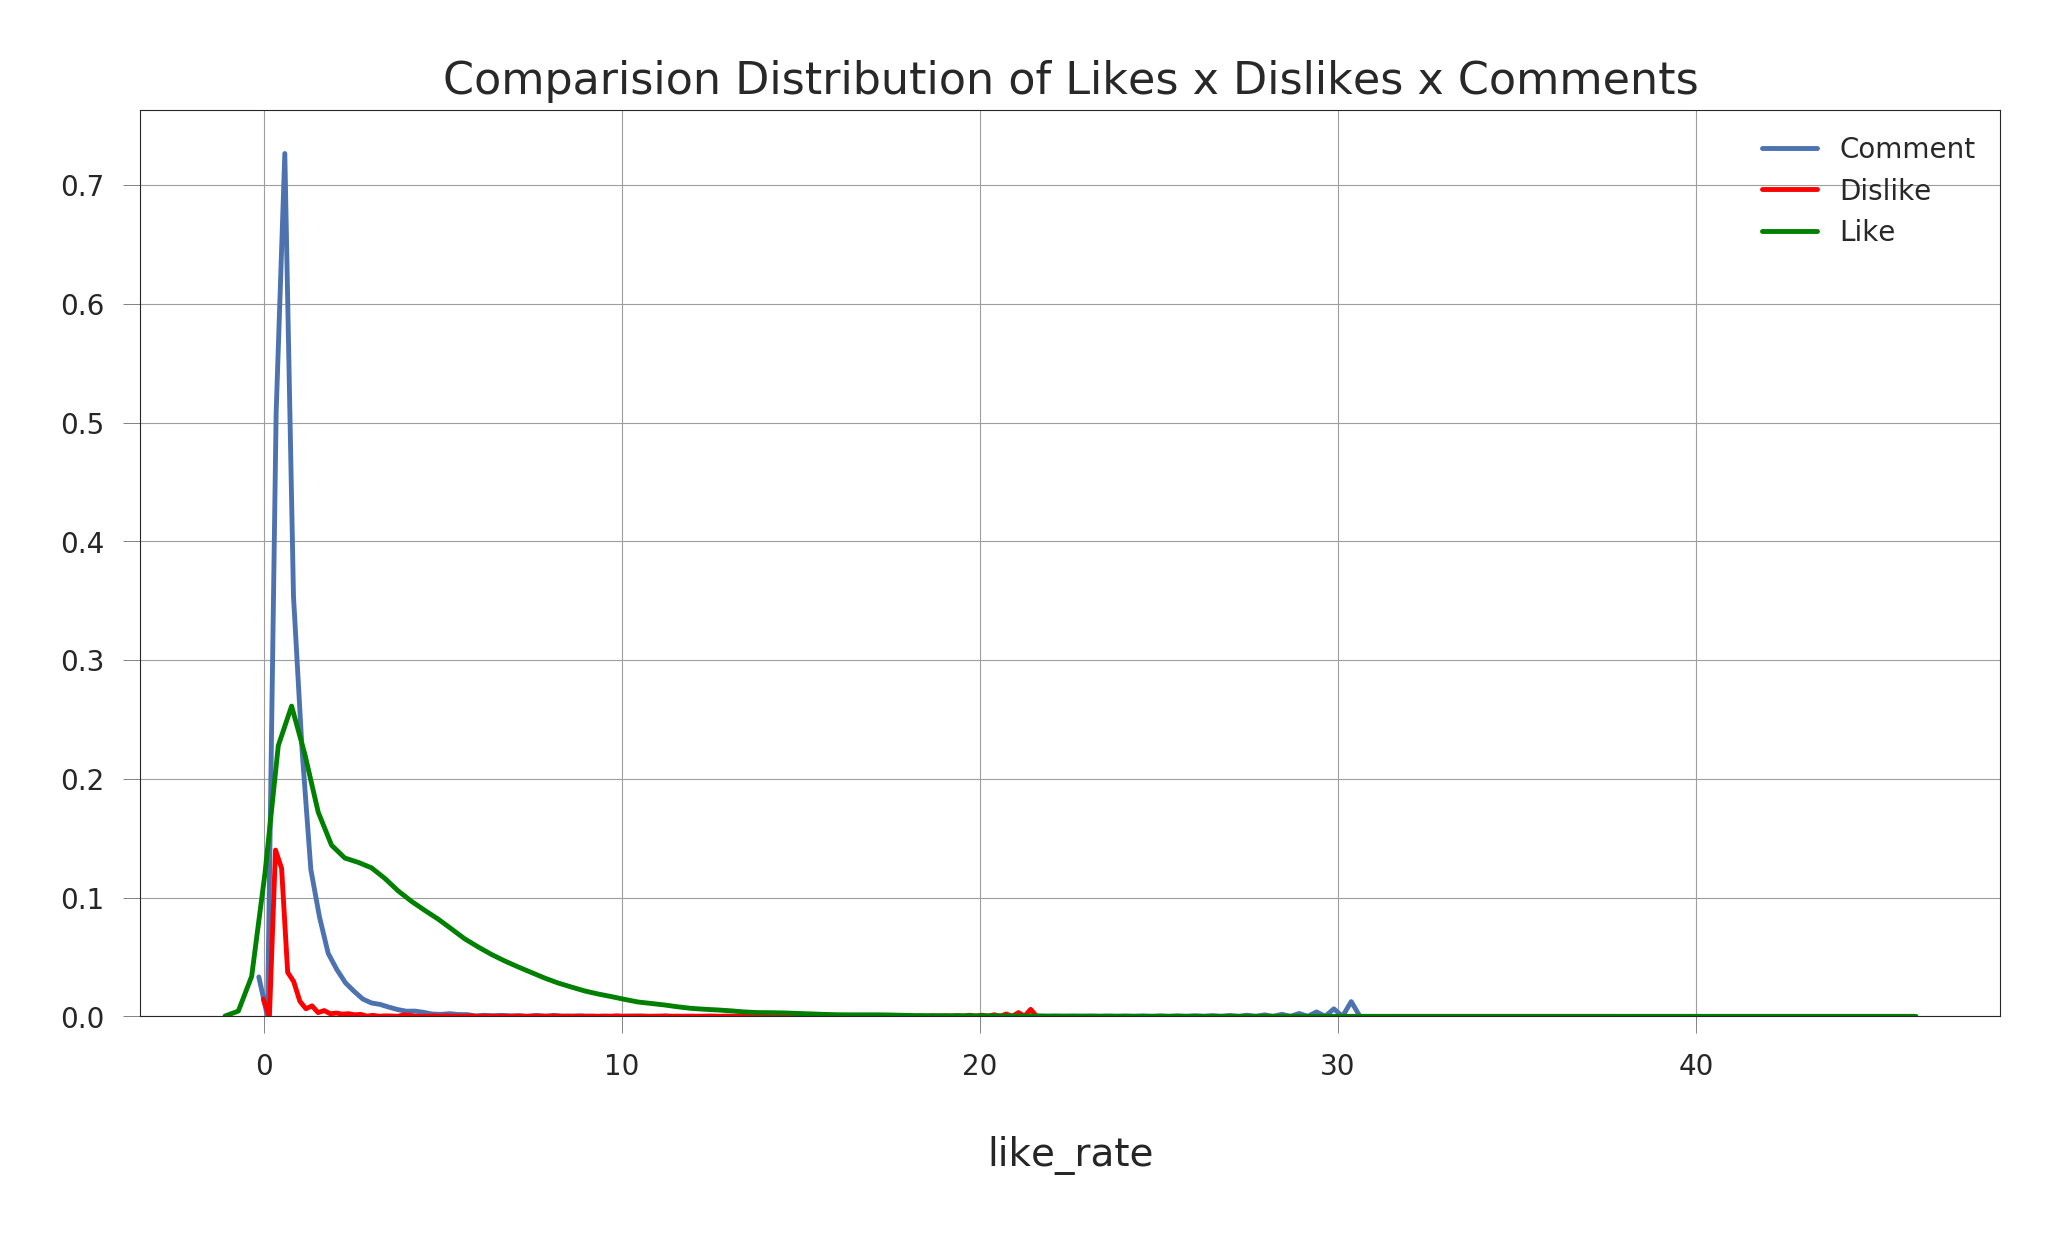

In [80]:
plt.figure(figsize=(12,6))
c1 = sns.distplot(df['comment_rate'],hist=False,label="Comment")
c1 = sns.distplot(df['dislike_rate'], color='red',hist=False, label="Dislike")
c1 = sns.distplot(df['like_rate'], color='green',hist=False, label="Like")

c1.set_title('Comparision Distribution of Likes x Dislikes x Comments', fontsize=16)
plt.legend()
plt.show();

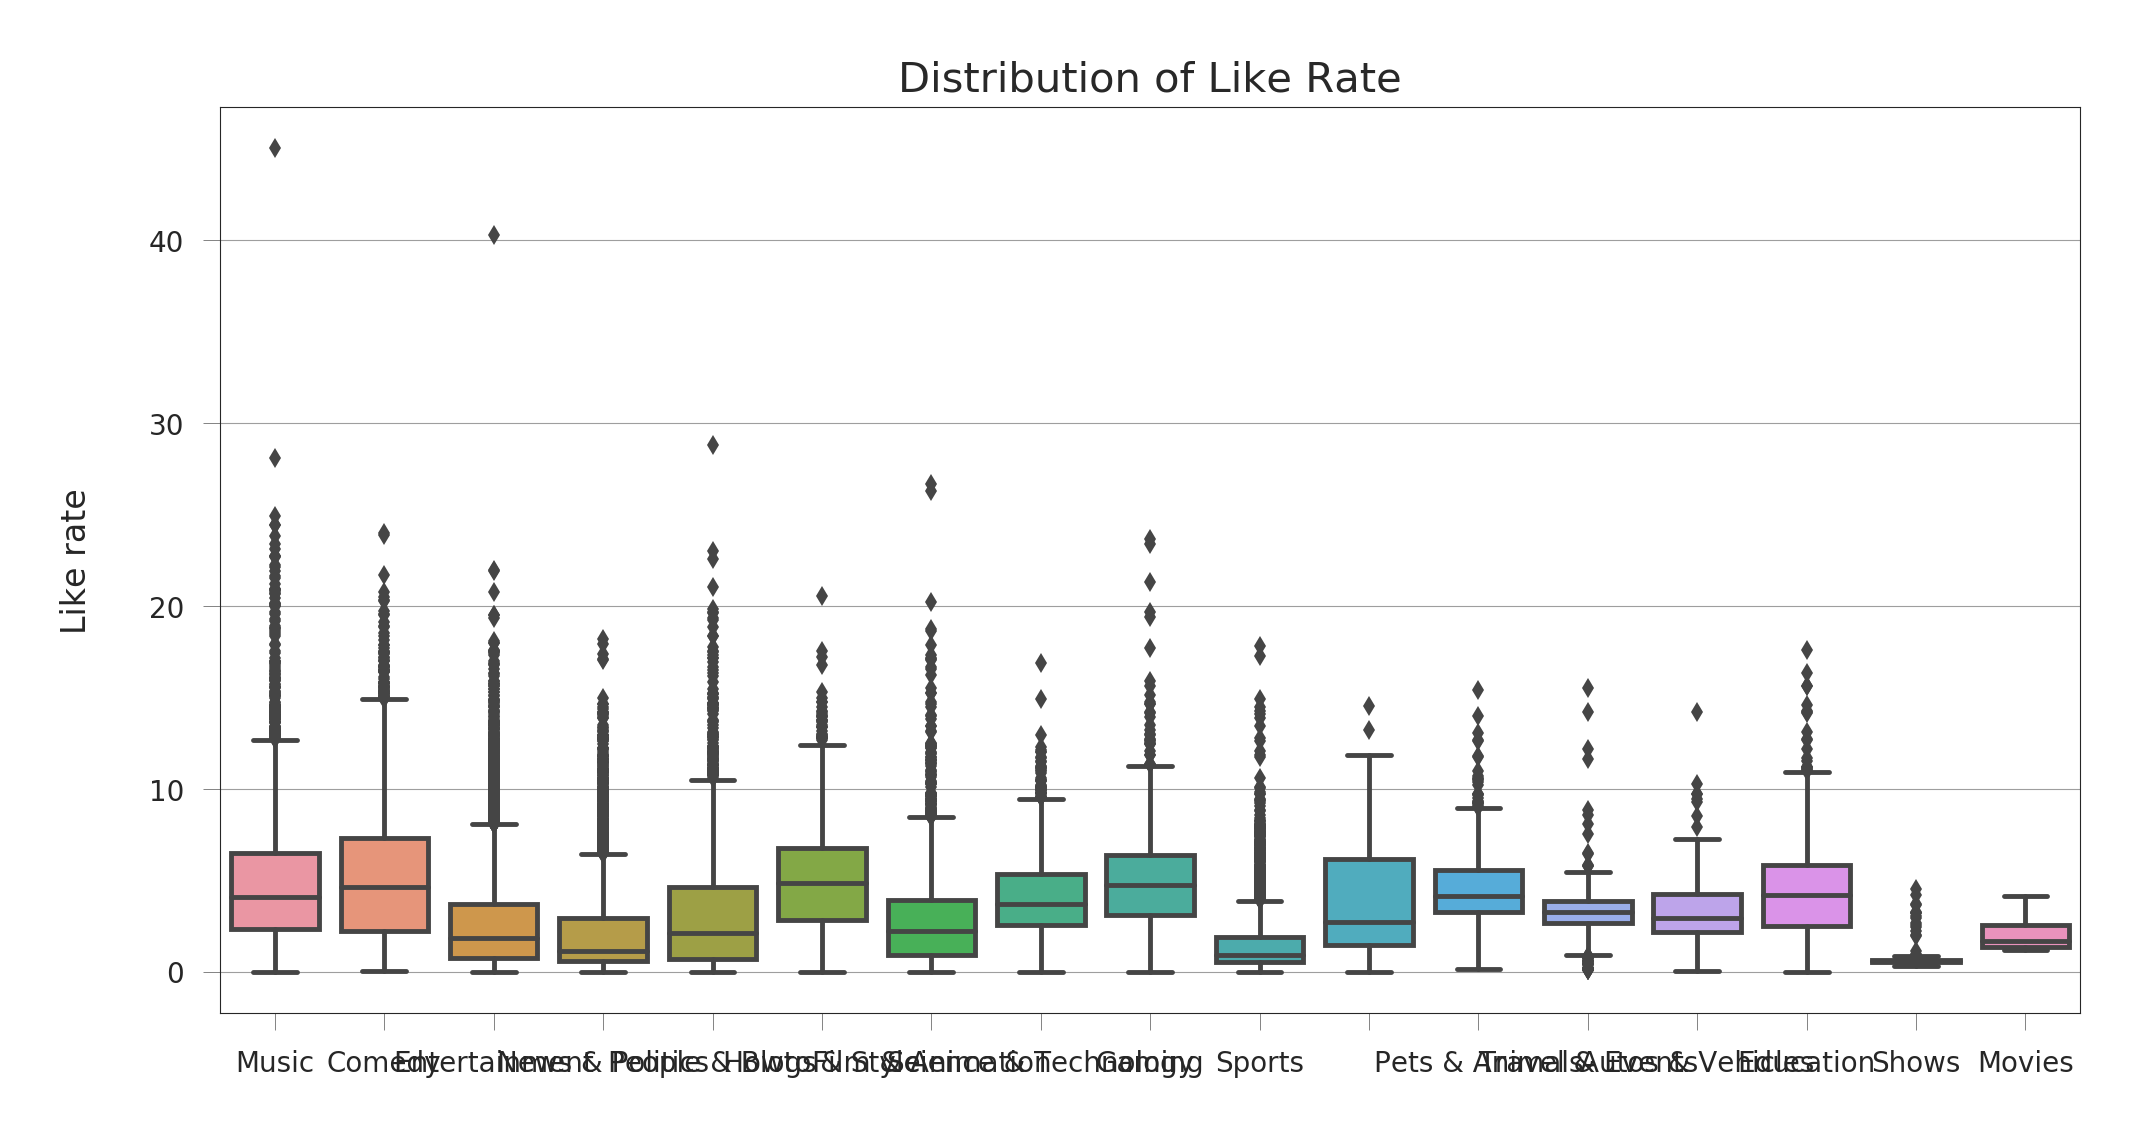

In [81]:
plt.figure(figsize = (12,6))

r1= sns.boxplot(x='category_name',y='like_rate',  data=df)
r1.set_title("Distribution of Like Rate", fontsize=15)
r1.set_xlabel("", fontsize=12)
r1.set_ylabel("Like rate", fontsize=12);


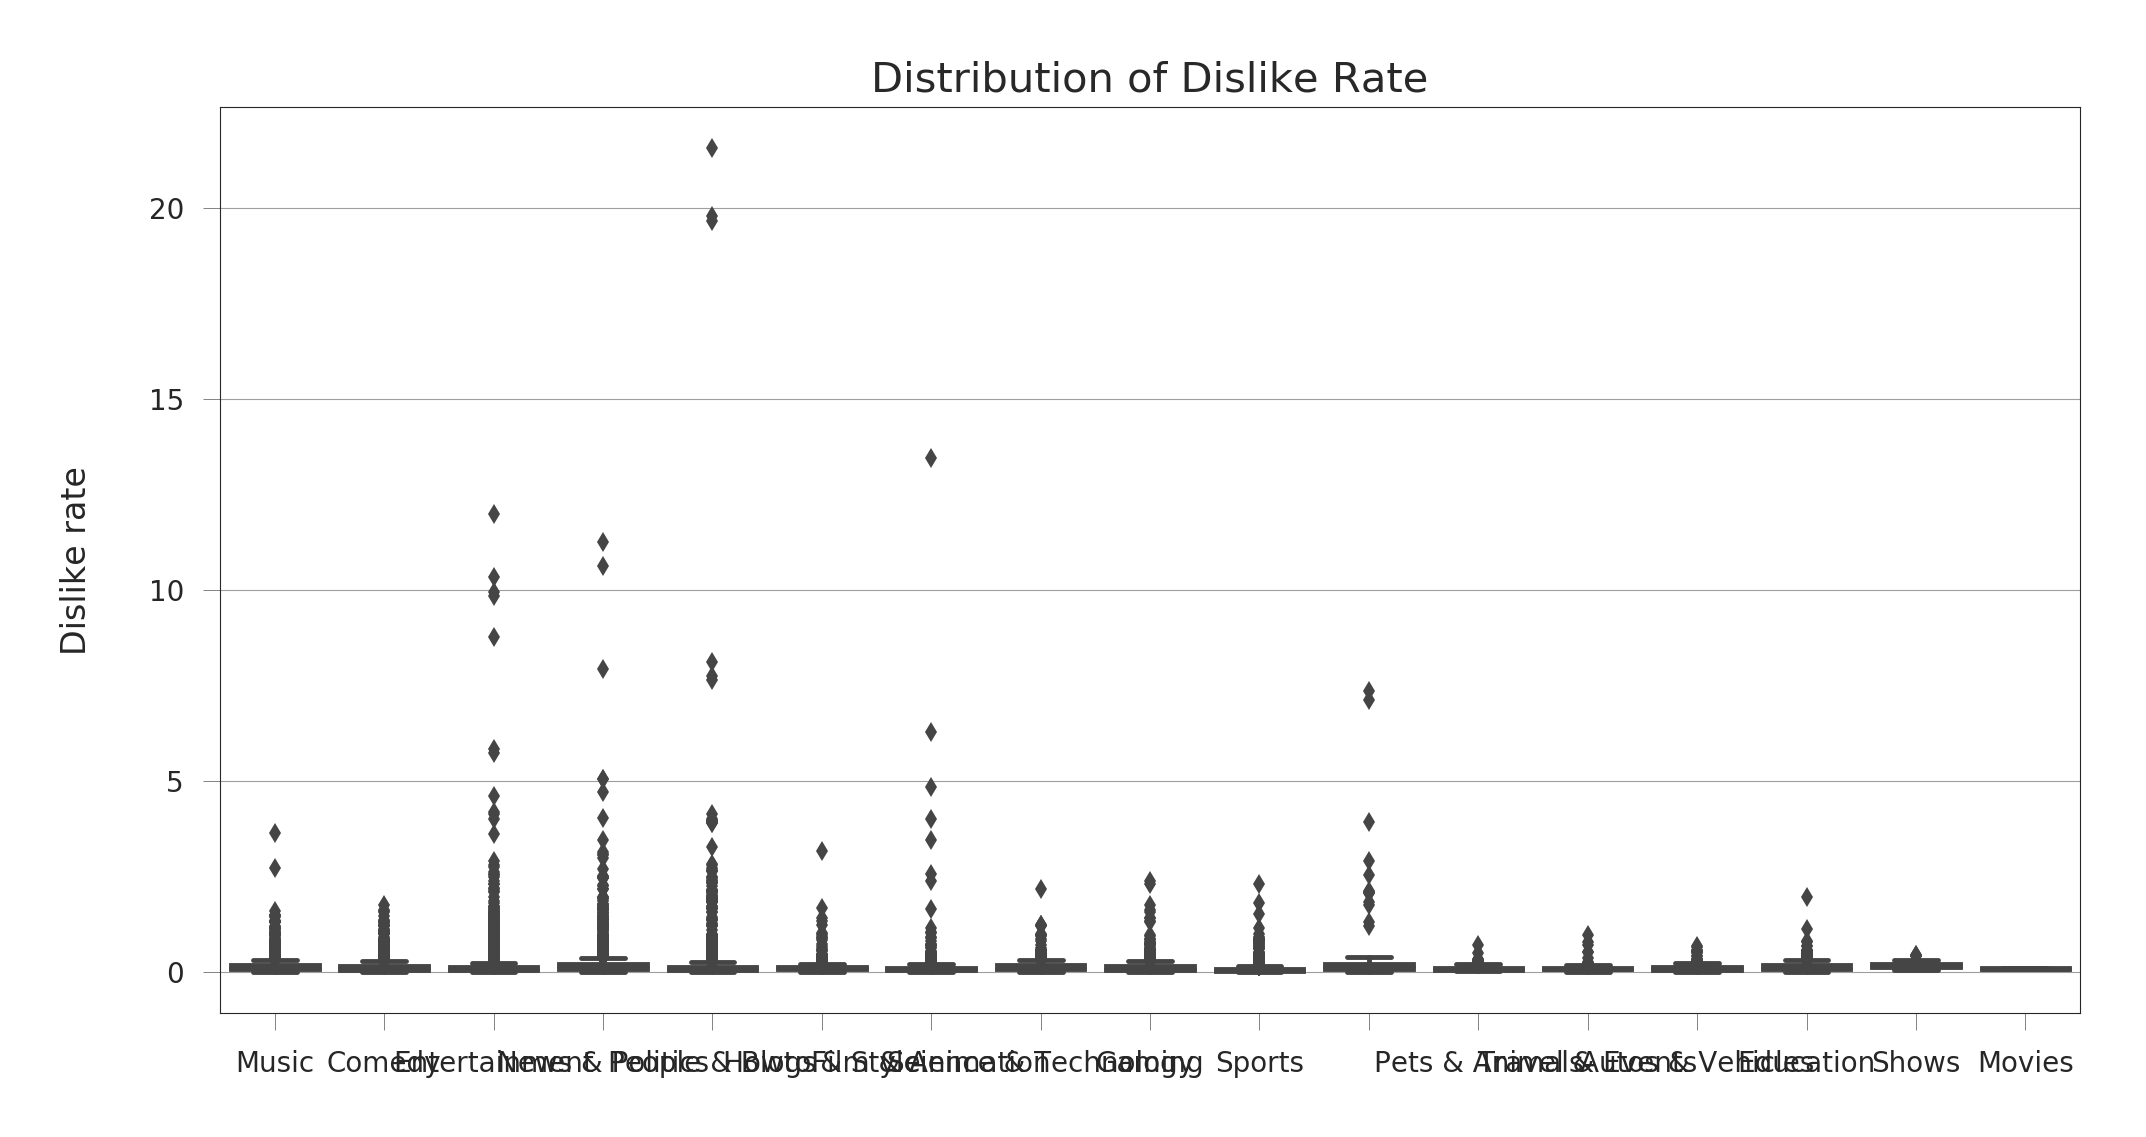

In [82]:
plt.figure(figsize=(12,6))

r2= sns.boxplot(y='dislike_rate', x='category_name', data=df)
r2.set_title("Distribution of Dislike Rate", fontsize=15)
r2.set_xlabel("", fontsize=12)
r2.set_ylabel("Dislike rate", fontsize=12);

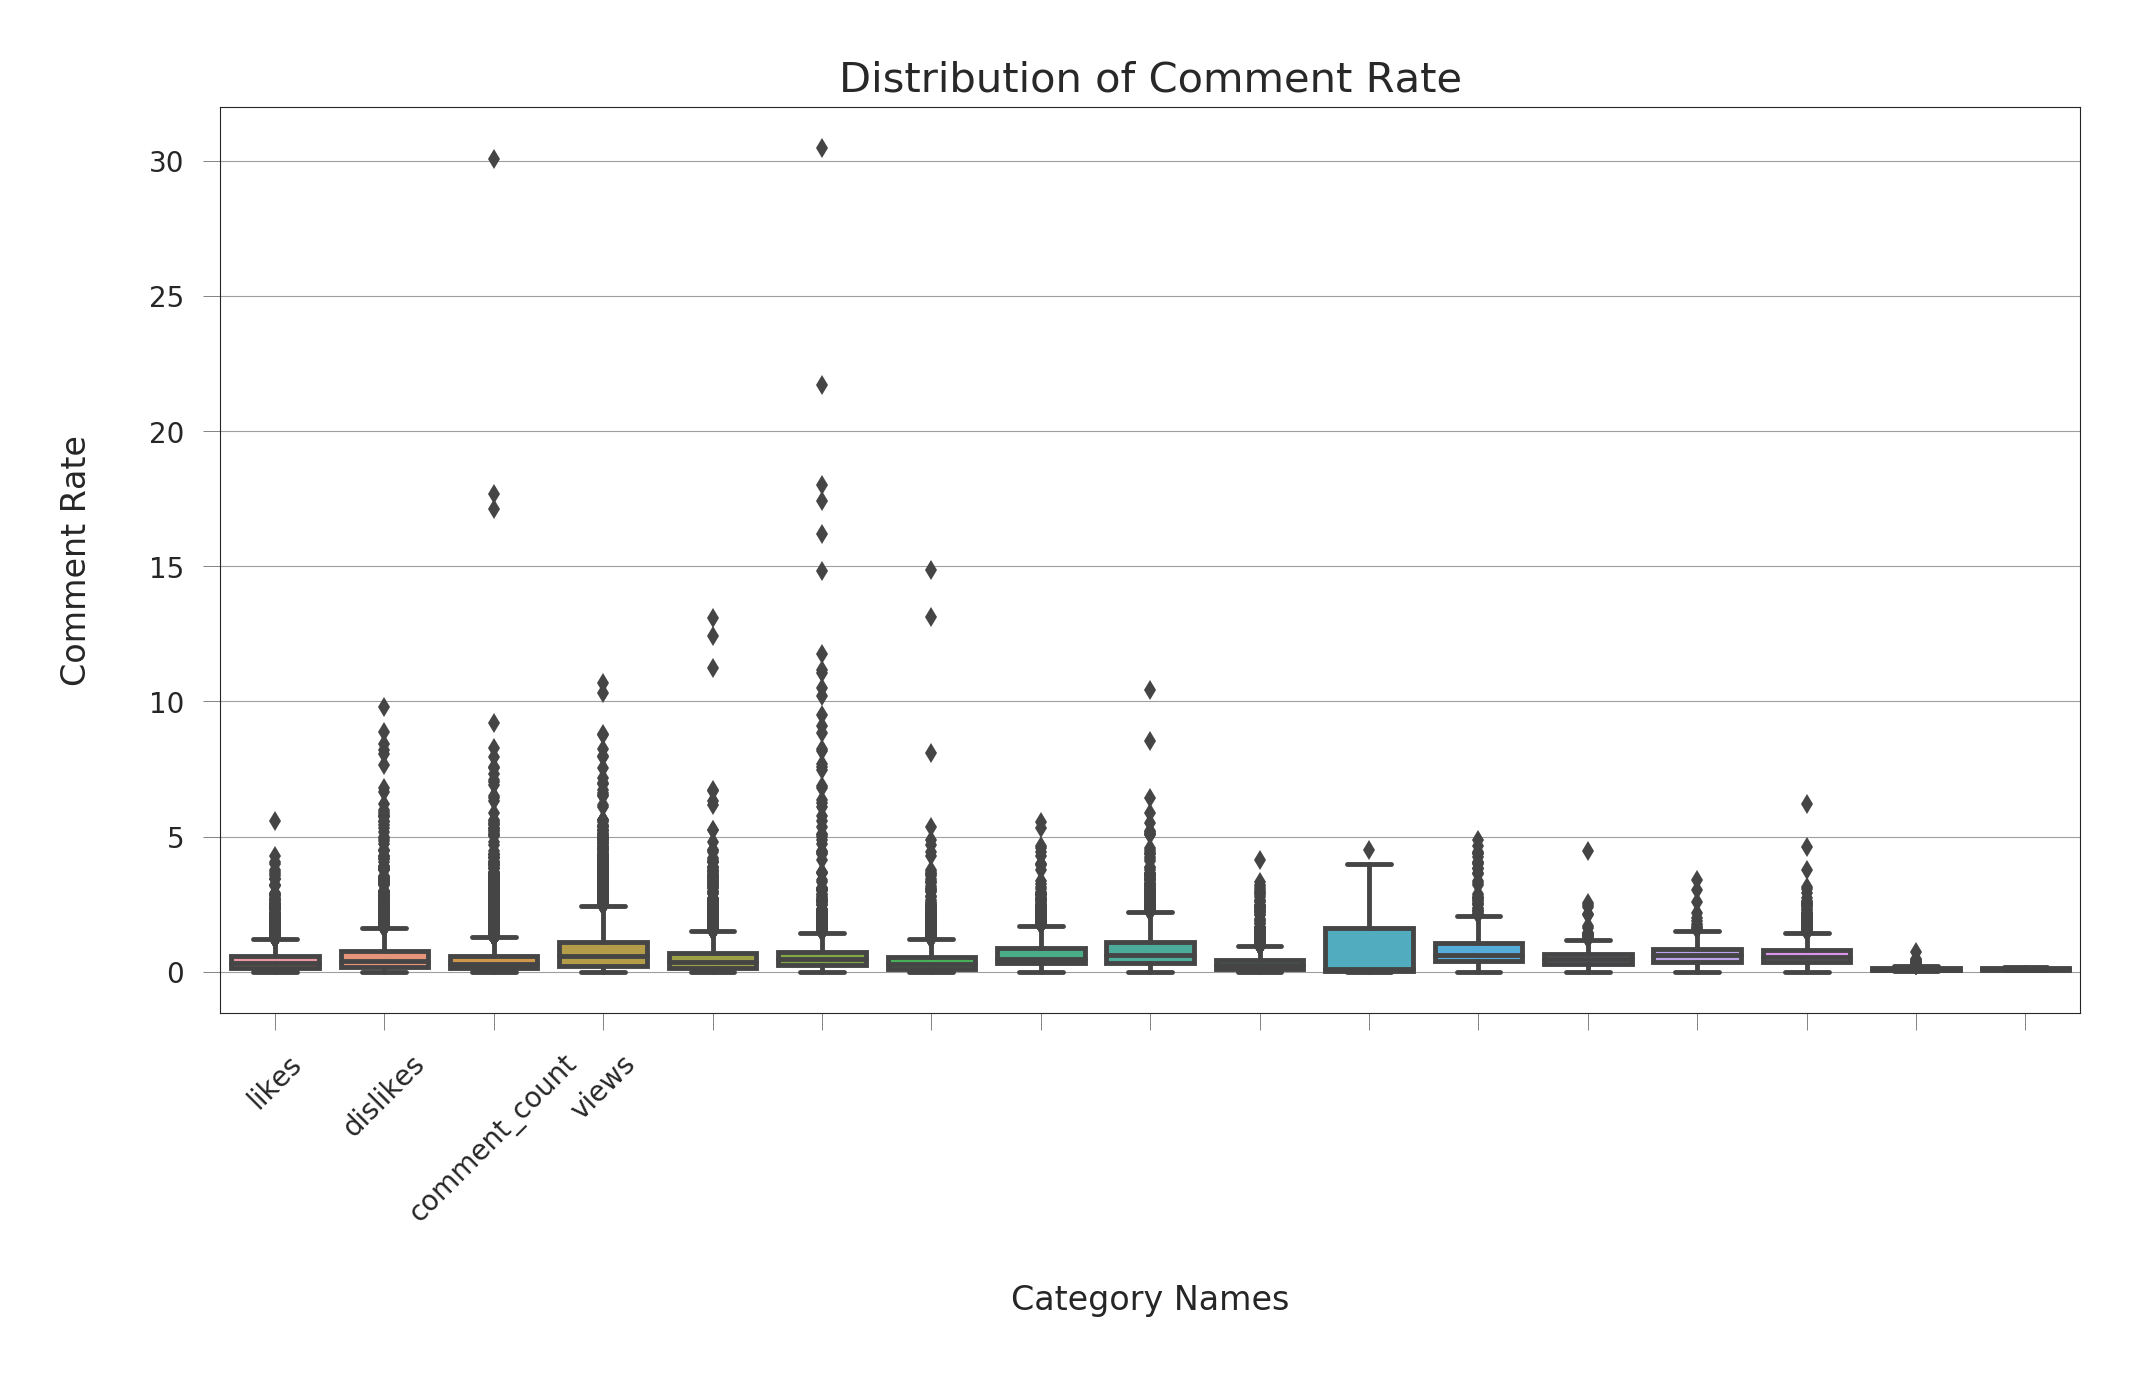

In [83]:
plt.figure(figsize=(12,6))

r3= sns.boxplot(y='comment_rate', x='category_name', data=df)
r3.set_xticklabels(g.get_xticklabels(),rotation=45)
r3.set_title("Distribution of Comment Rate", fontsize=15)
r3.set_xlabel("Category Names", fontsize=12)
r3.set_ylabel("Comment Rate", fontsize=12);

In [84]:
df.corr()

views  likes  dislikes  comment_count  \
views                    1.00   0.83      0.56           0.69   
likes                    0.83   1.00      0.46           0.84   
dislikes                 0.56   0.46      1.00           0.64   
comment_count            0.69   0.84      0.64           1.00   
comments_disabled        0.00  -0.02     -0.01          -0.03   
ratings_disabled         0.01  -0.02     -0.01          -0.02   
video_error_or_removed   0.00   0.00      0.00           0.00   
likes_log                0.40   0.45      0.16           0.32   
views_log                0.52   0.45      0.19           0.33   
dislikes_log             0.46   0.44      0.24           0.35   
comment_log              0.36   0.41      0.17           0.36   
like_rate                0.01   0.22      0.02           0.15   
dislike_rate             0.04   0.07      0.25           0.13   
comment_rate            -0.05   0.05      0.03           0.20   

                        comments_disabled  ratings_disabled  \
views                                0.00              0.01   
likes                               -0.02             -0.02   
dislikes                            -0.01             -0.01   
comment_count                       -0.03             -0.02   
comments_disabled                    1.00              0.15   
ratings_disabled                     0.15              1.00   
video_error_or_removed              -0.00             -0.00   
likes_log                           -0.13             -0.35   
views_log                           -0.05             -0.04   
dislikes_log                        -0.08             -0.26   
comment_log                         -0.43             -0.10   
like_rate                           -0.08             -0.09   
dislike_rate                         0.02             -0.03   
comment_rate                        -0.09             -0.02   

                        video_error_or_removed  likes_log  views_log  \
views                                     0.00       0.40       0.52   
likes                                     0.00       0.45       0.45   
dislikes                                  0.00       0.16       0.19   
comment_count                             0.00       0.32       0.33   
comments_disabled                        -0.00      -0.13      -0.05   
ratings_disabled                         -0.00      -0.35      -0.04   
video_error_or_removed                    1.00      -0.01       0.00   
likes_log                                -0.01       1.00       0.79   
views_log                                 0.00       0.79       1.00   
dislikes_log                             -0.00       0.82       0.86   
comment_log                              -0.00       0.80       0.71   
like_rate                                -0.01       0.50       0.05   
dislike_rate                             -0.00       0.08       0.05   
comment_rate                             -0.00       0.12      -0.13   

                        dislikes_log  comment_log  like_rate  dislike_rate  \
views                           0.46         0.36       0.01          0.04   
likes                           0.44         0.41       0.22          0.07   
dislikes                        0.24         0.17       0.02          0.25   
comment_count                   0.35         0.36       0.15          0.13   
comments_disabled              -0.08        -0.43      -0.08          0.02   
ratings_disabled               -0.26        -0.10      -0.09         -0.03   
video_error_or_removed         -0.00        -0.00      -0.01         -0.00   
likes_log                       0.82         0.80       0.50          0.08   
views_log                       0.86         0.71       0.05          0.05   
dislikes_log                    1.00         0.73       0.15          0.29   
comment_log                     0.73         1.00       0.39          0.13   
like_rate                       0.15         0.39       1.00          0.06   
dislike

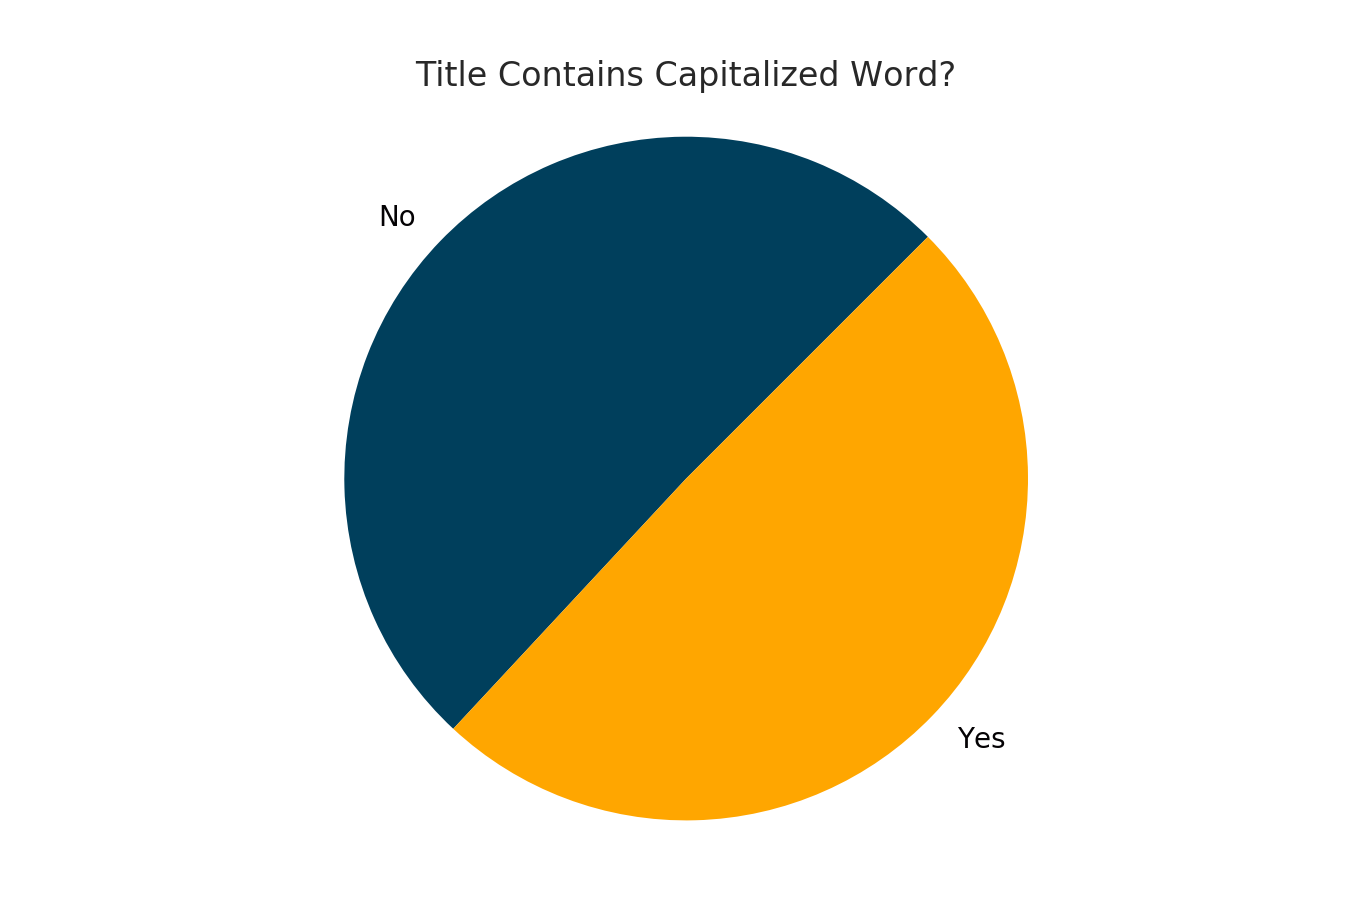

In [85]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
ax.axis('equal')
ax.set_title('Title Contains Capitalized Word?');

In [86]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.51
True    0.49
Name: contains_capitalized, dtype: float64

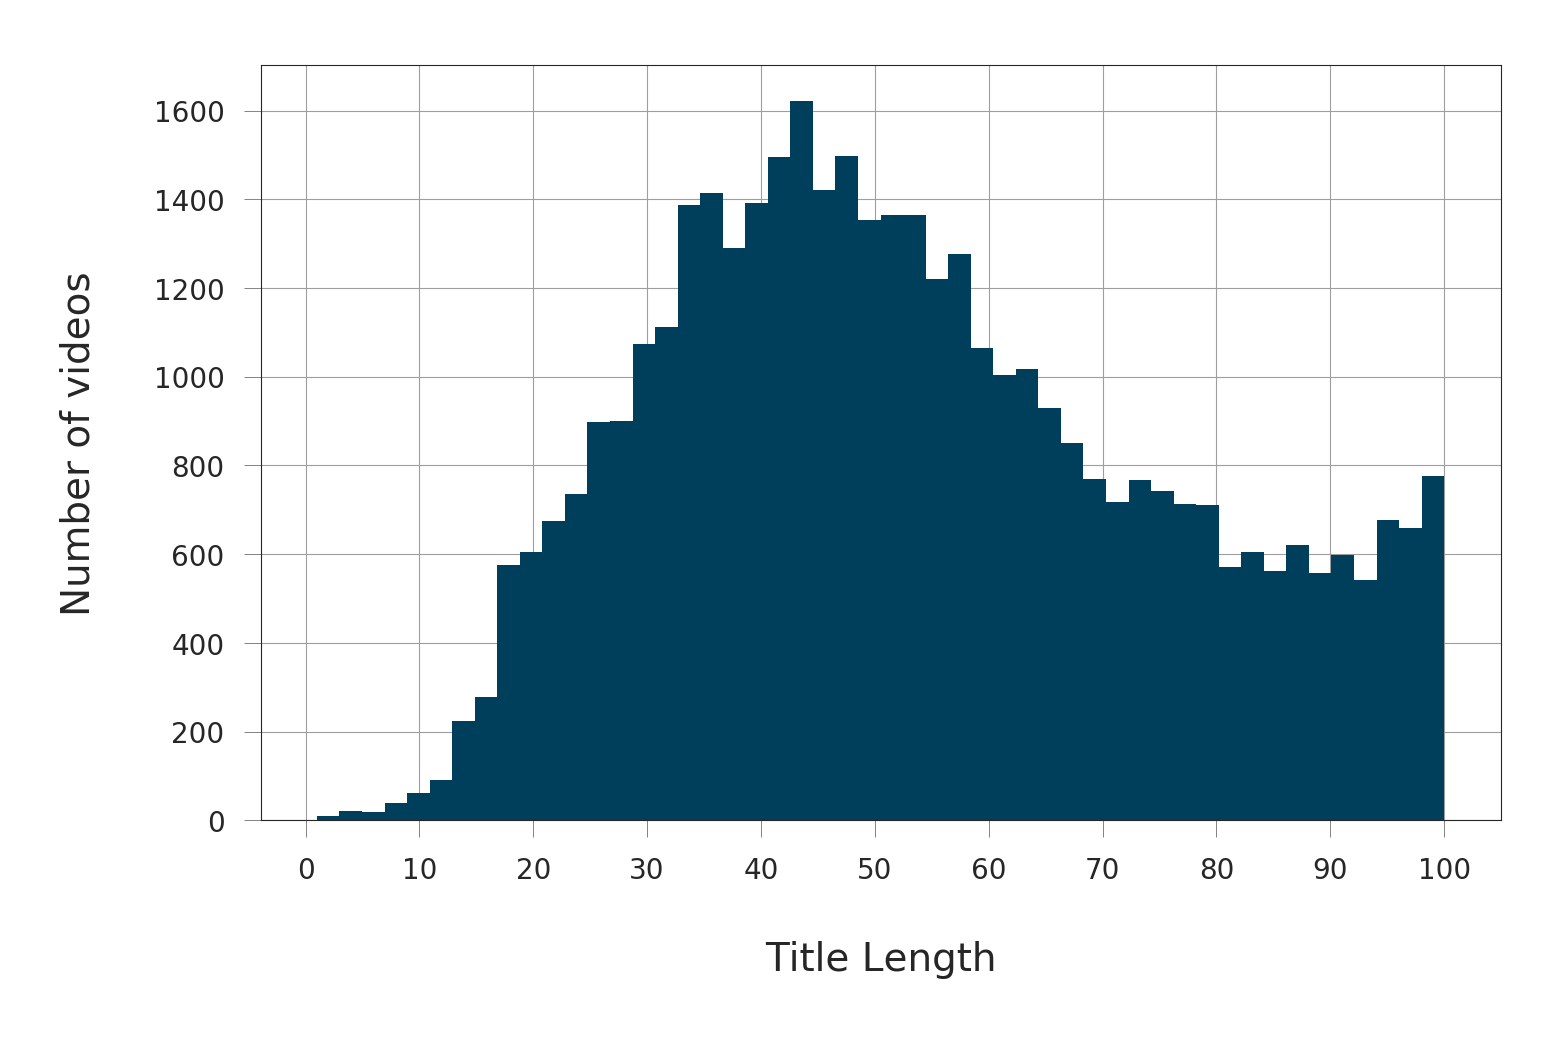

In [87]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
sns.distplot(df["title_length"], kde=False, rug=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
ax.set(xlabel="Title Length", ylabel="Number of videos", xticks=range(0, 110, 10));

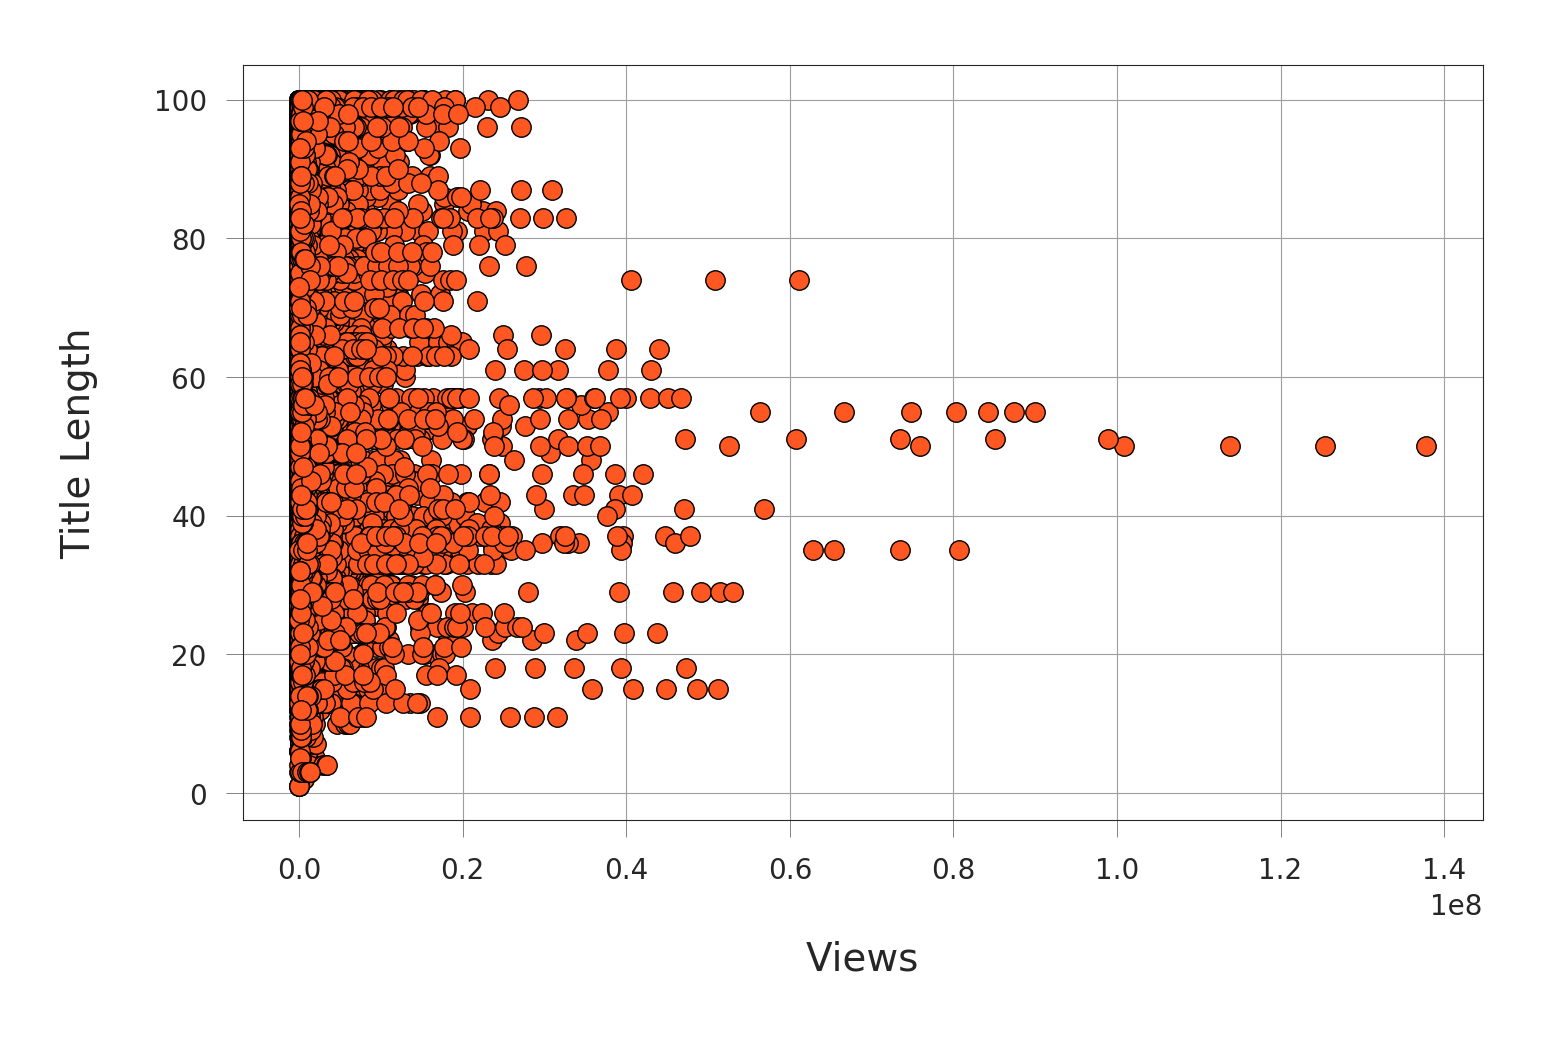

In [88]:
fig, ax = plt.subplots()
ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Title Length");

In [89]:
df['title'].value_counts()

Drake - God's Plan (Official Audio)                                                                    15
Most Popular Violin Covers of Popular Songs 2018 || Best Instrumental Violin Covers 2018               15
Bruno Mars,Charlie Puth,Ed Sheeran Best Christmas Songs,Greatest Hits Pop Playlist Christmas 2018      13
Deleted video                                                                                          11
Merry Christmas 2018 - Top Christmas Songs Playlist 2018 - Best Christmas Songs Ever                   10
Nicki Minaj - Chun-Li                                                                                   9
Maroon 5 - Wait                                                                                         9
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                            9
Post Malone - rockstar ft. 21 Savage                                                                    8
G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi 

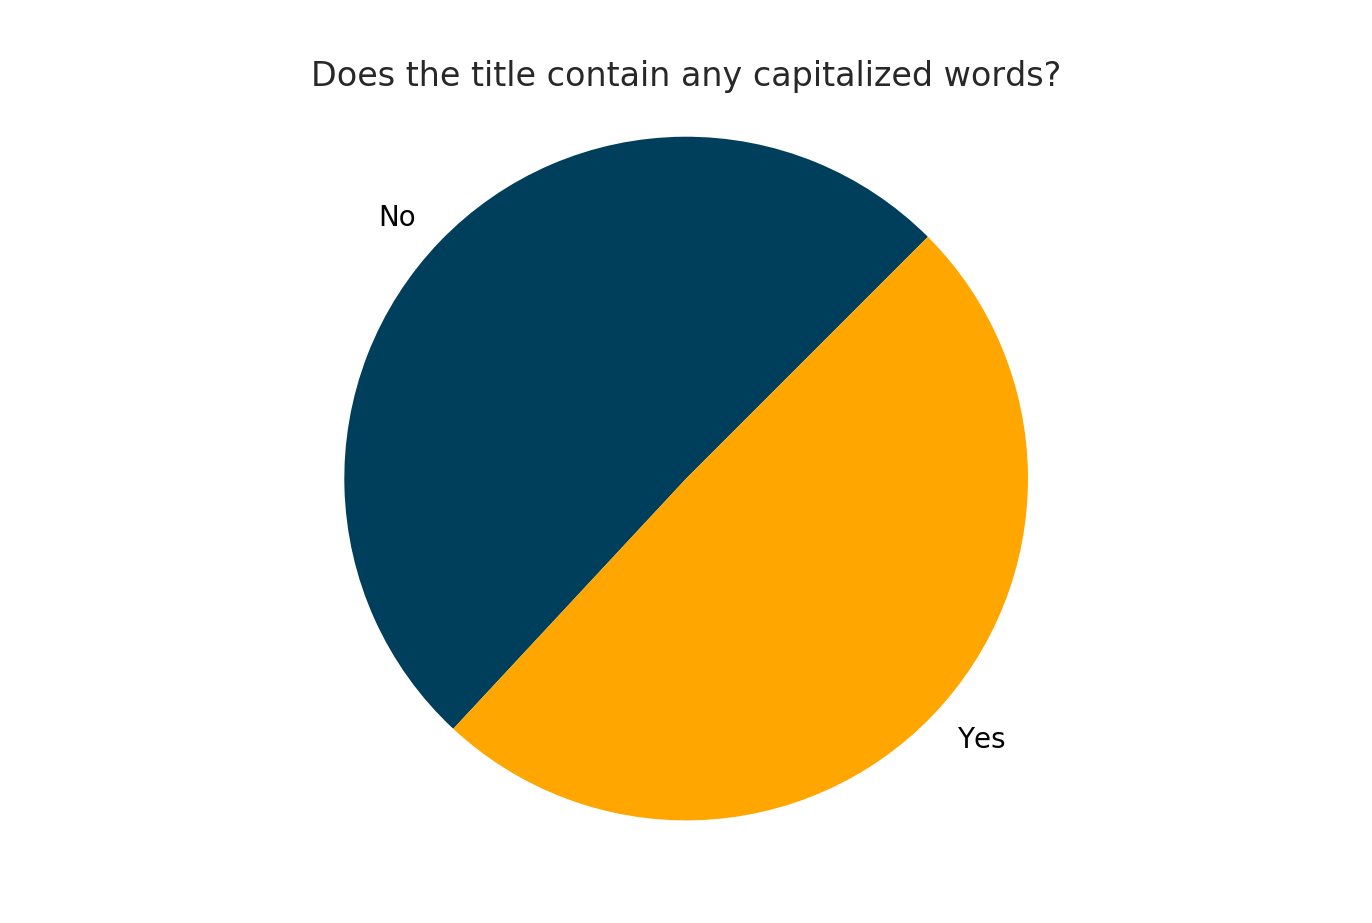

In [90]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()

ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
ax.axis('equal')

ax.set_title('Does the title contain any capitalized words?');

In [91]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.51
True    0.49
Name: contains_capitalized, dtype: float64

In [92]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(5)

[('-', 12666), ('|', 12596), ('The', 5167), ('2018', 3765), ('the', 2498)]

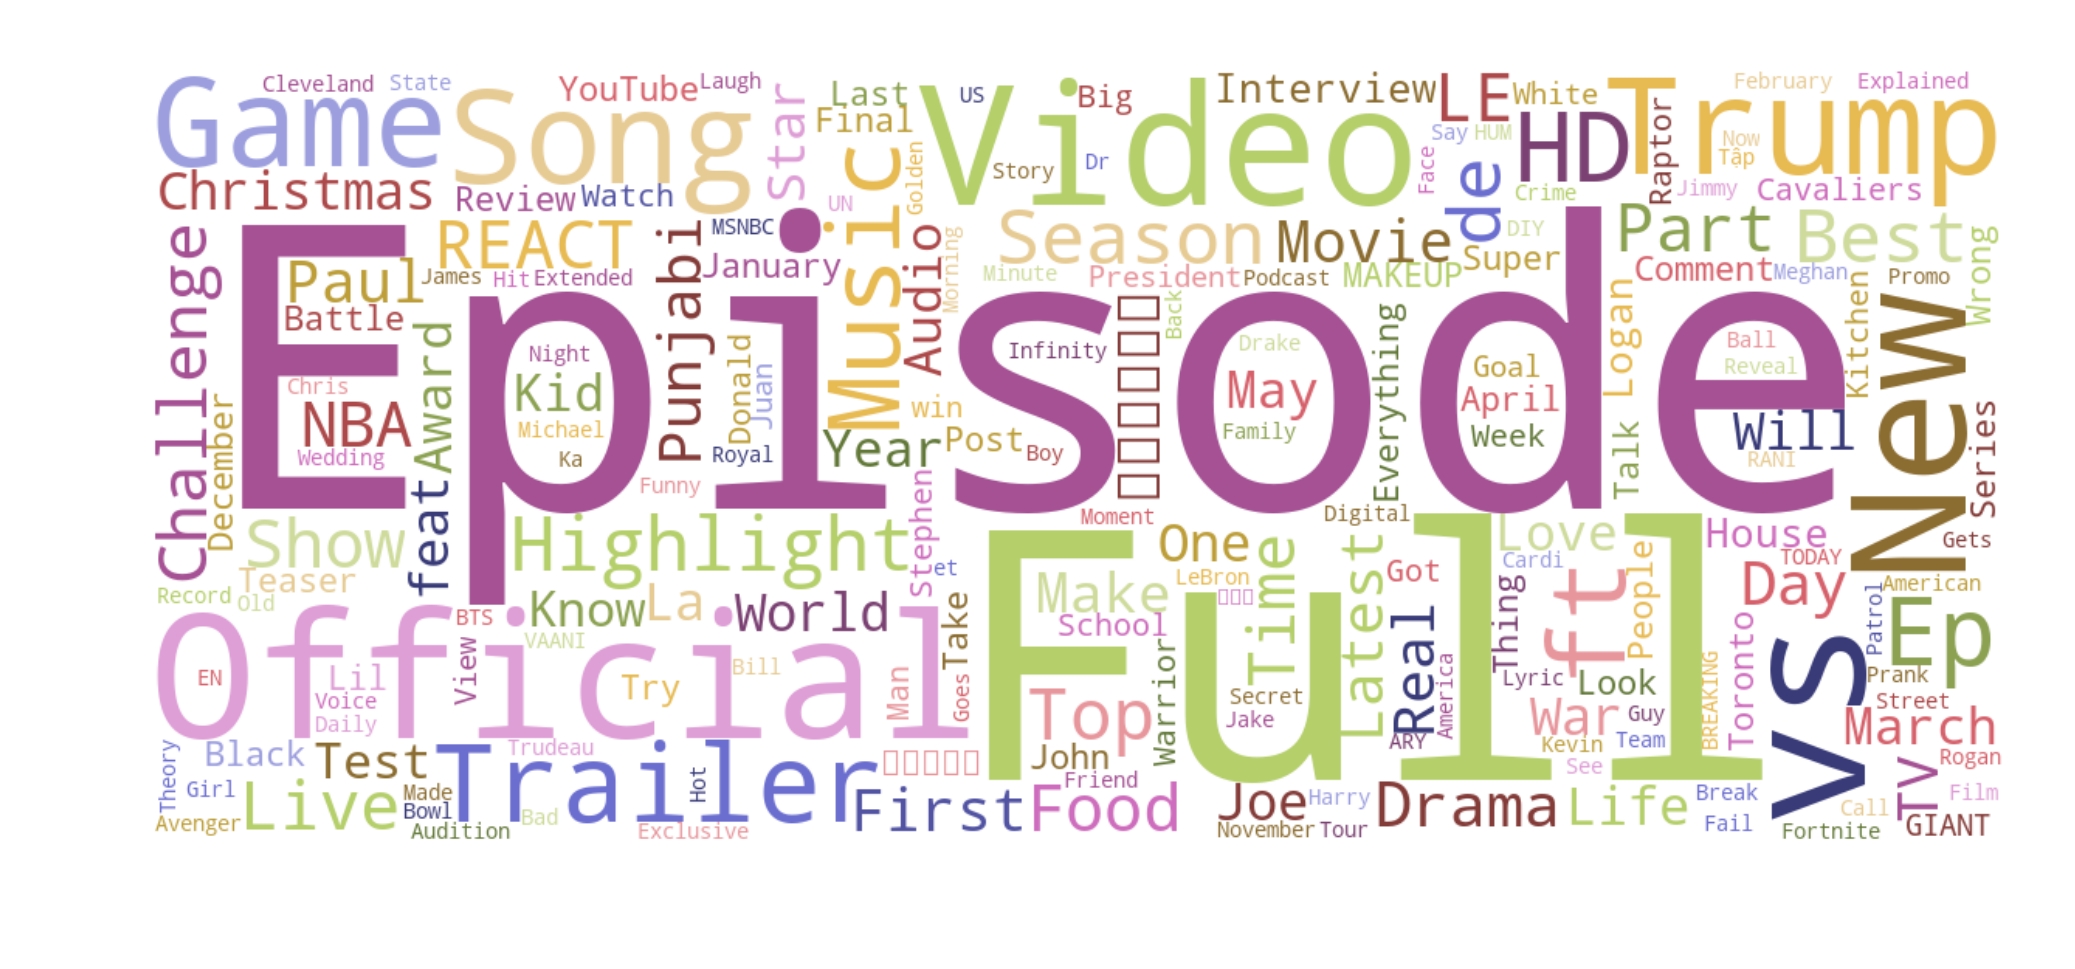

In [93]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

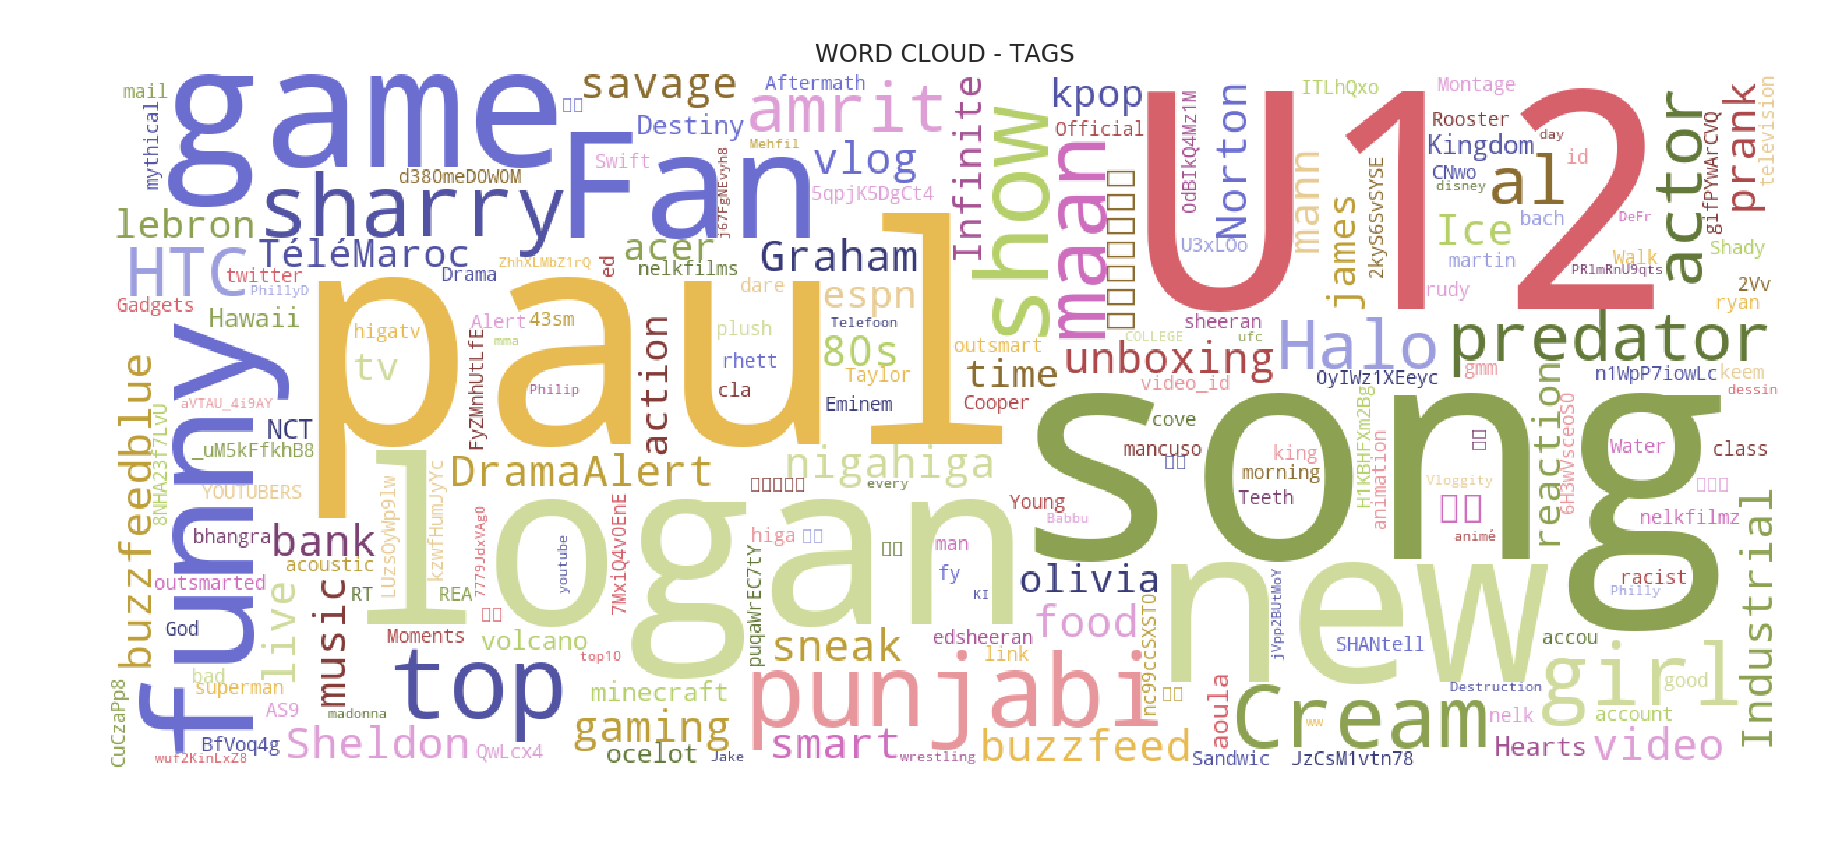

In [96]:
plt.figure(figsize = (15,15))
stopwords = set(STOPWORDS)
newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']
stopwords.update(newStopWords)

wordcloud = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(str(df['tags']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show();

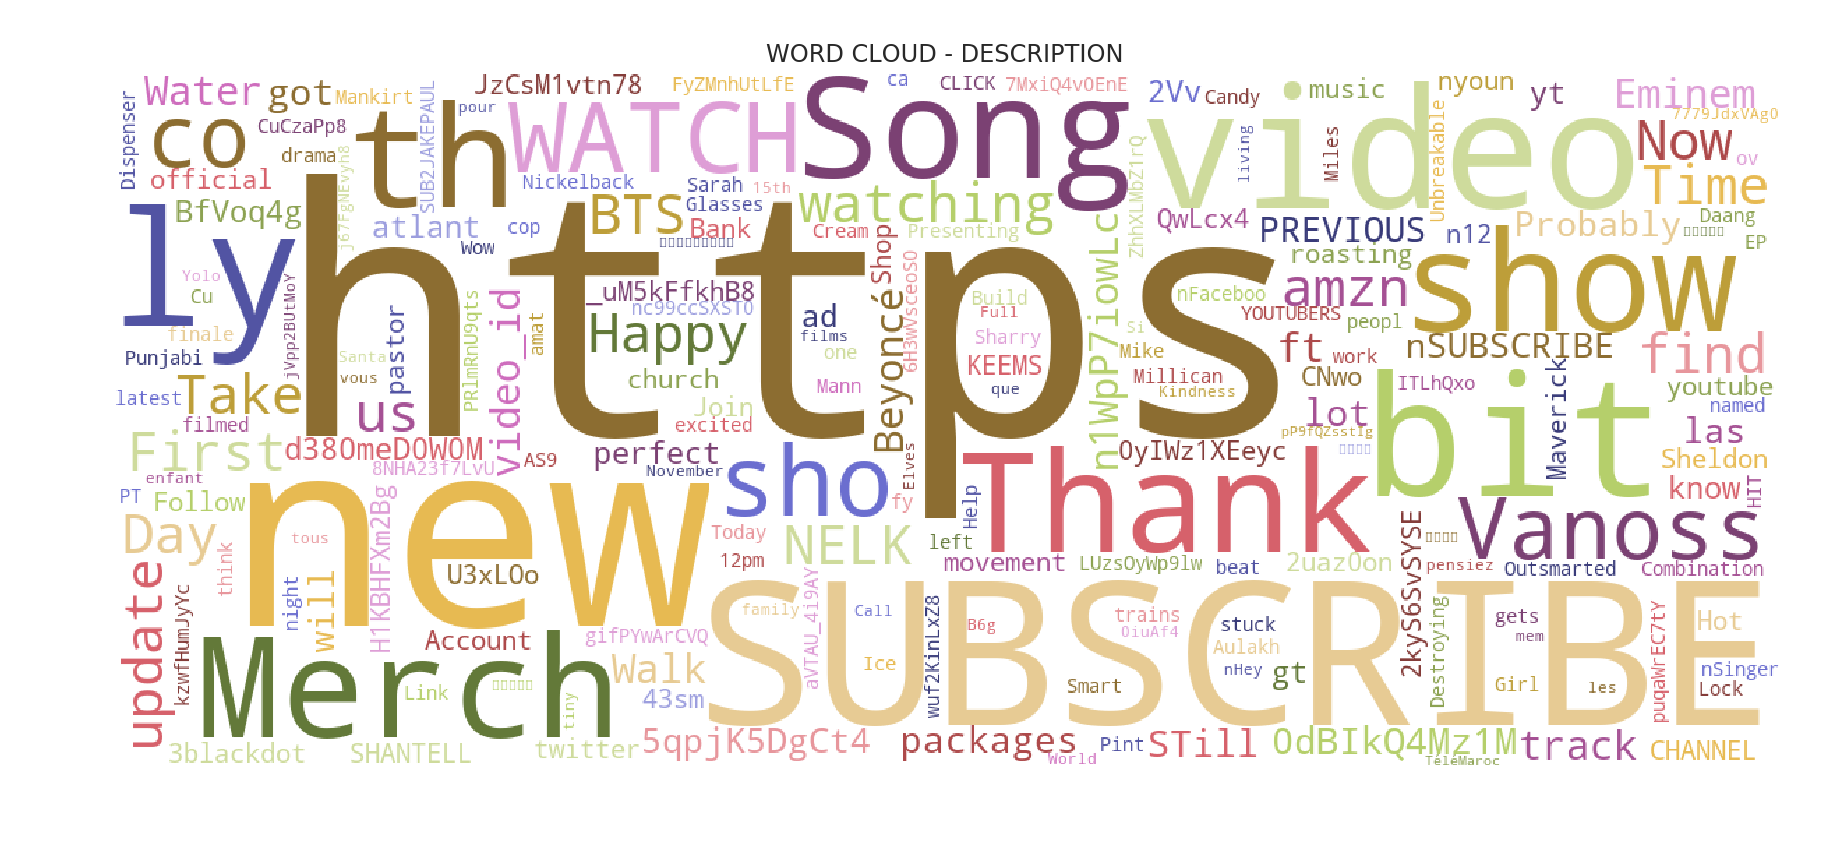

In [97]:
plt.figure(figsize = (15,15))
stopwords = set(STOPWORDS)
newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']
stopwords.update(newStopWords)

wordcloud = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(str(df['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show();

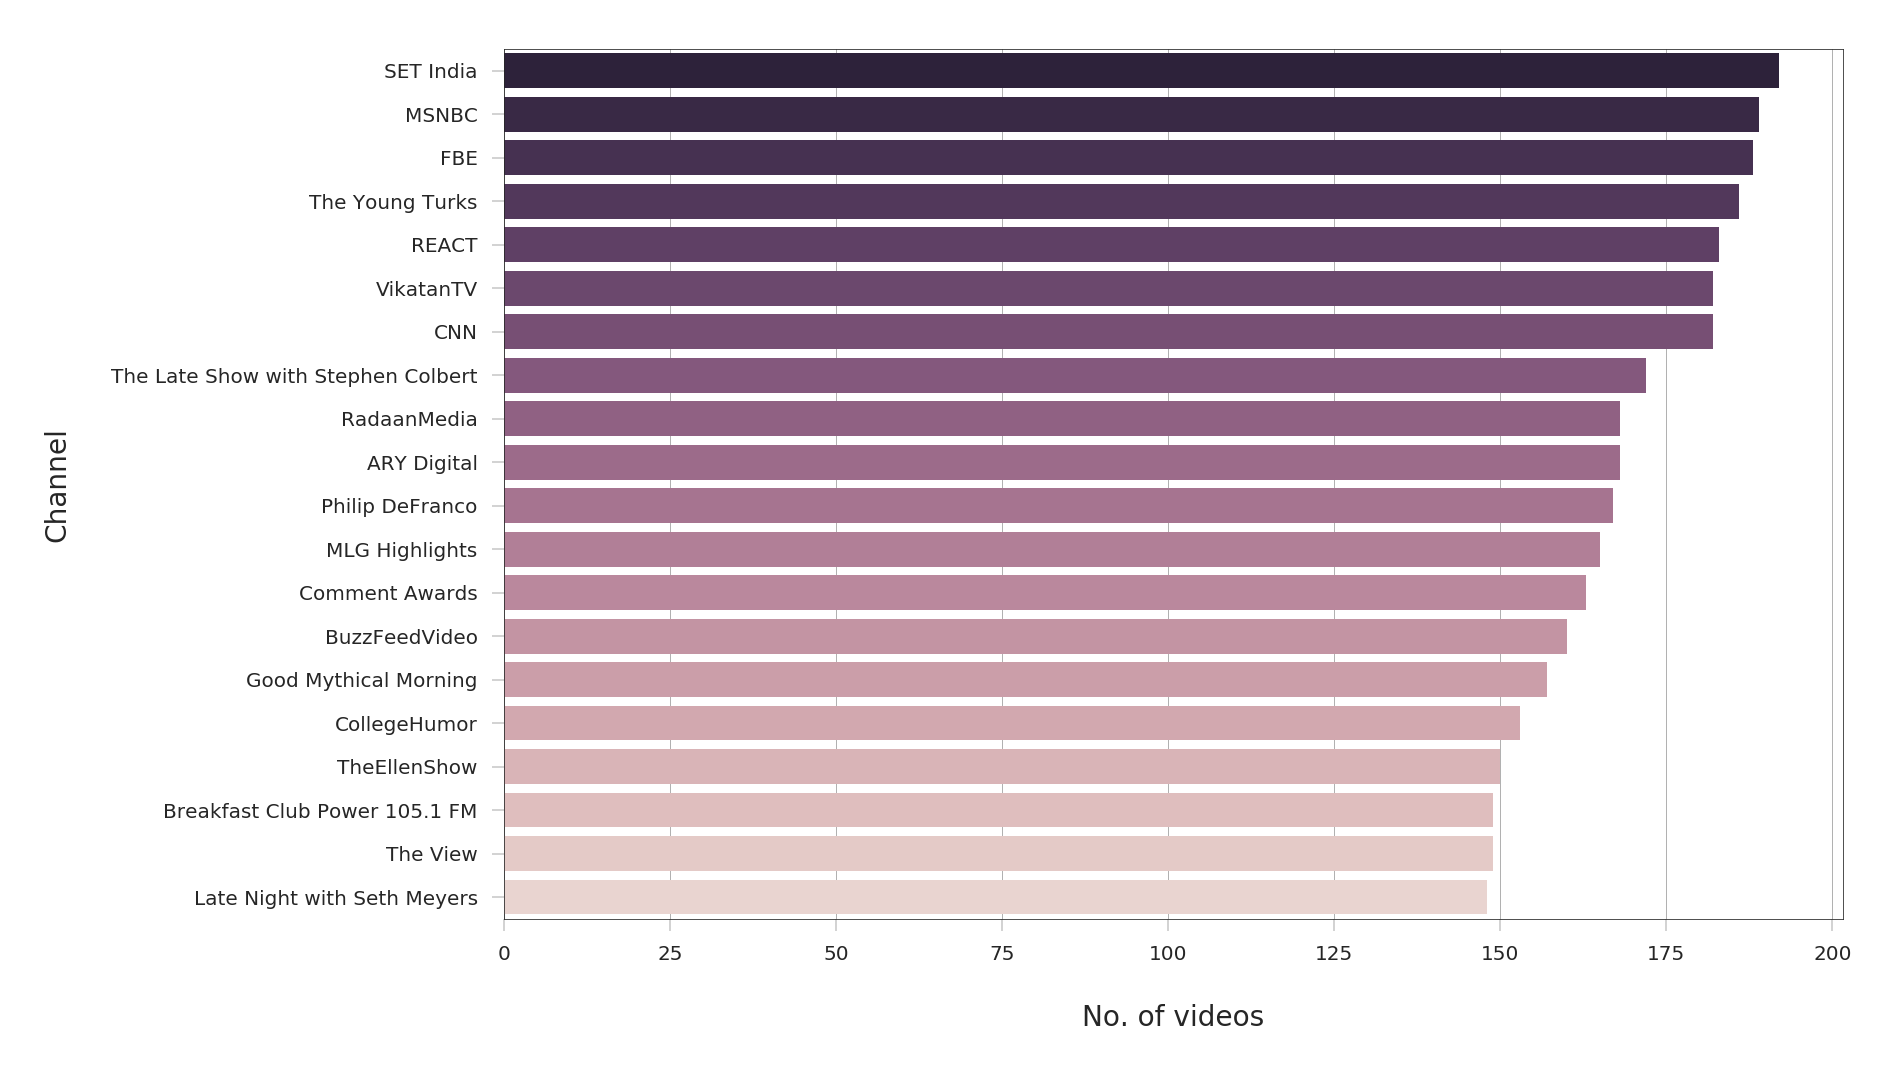

In [98]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
ax.set(xlabel="No. of videos", ylabel="Channel");

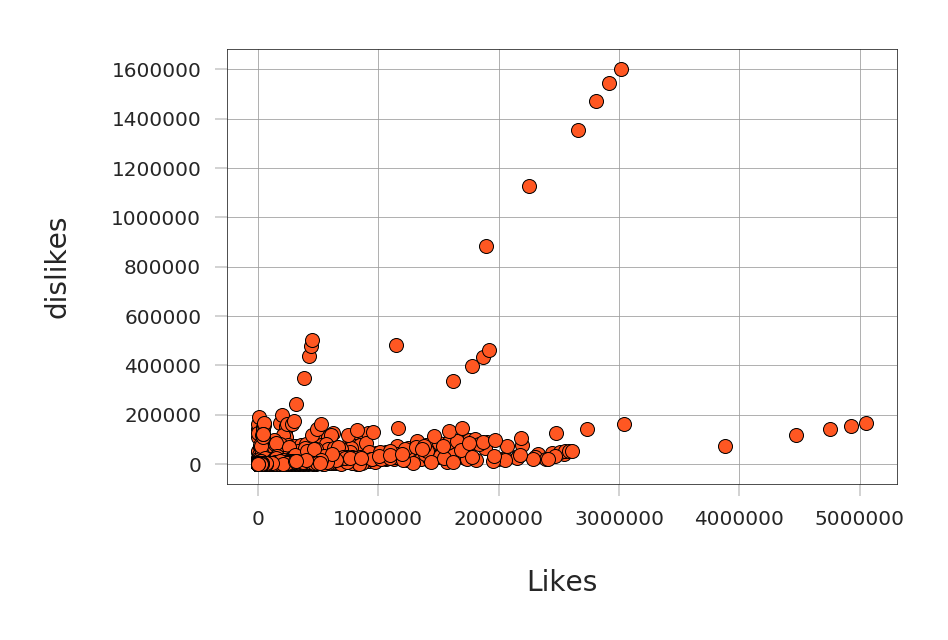

In [99]:
fig, ax = plt.subplots()
plt.scatter(x=df['likes'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Likes", ylabel="dislikes");

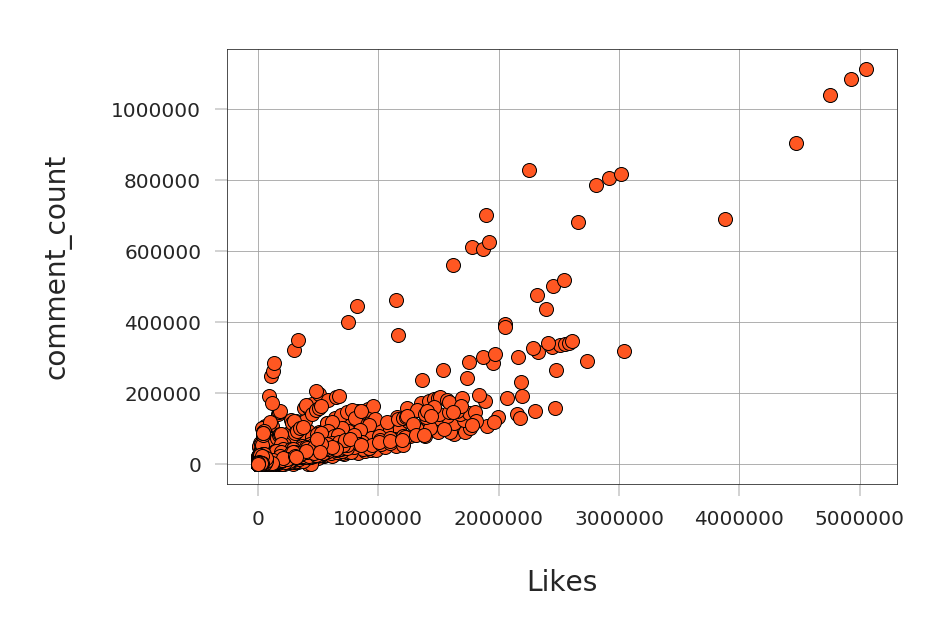

In [100]:
fig, ax = plt.subplots()
plt.scatter(x=df['likes'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Likes", ylabel="comment_count");

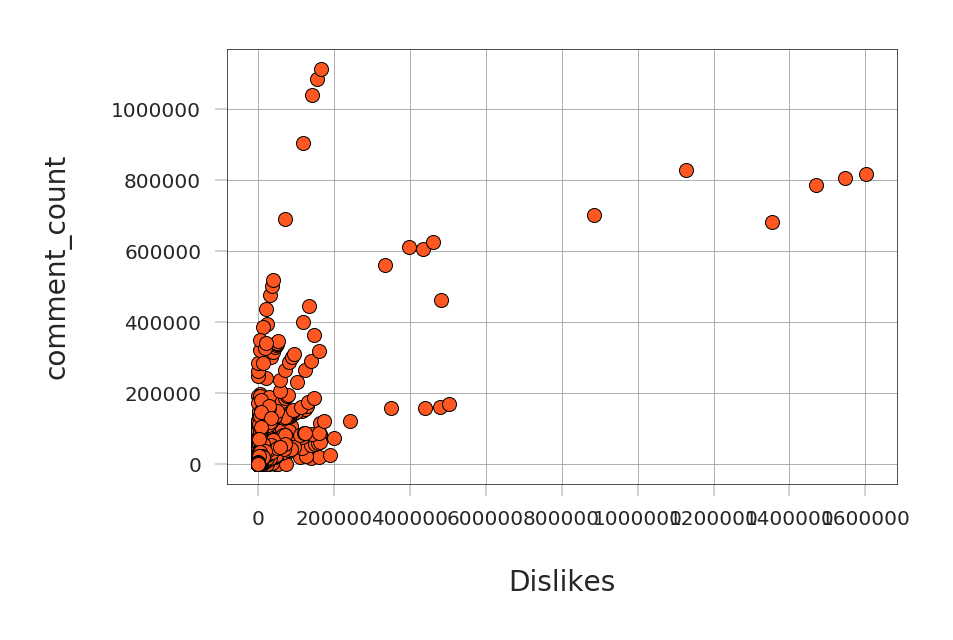

In [101]:
fig, ax = plt.subplots()
plt.scatter(x=df['dislikes'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Dislikes", ylabel="comment_count");